In [1]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Polygon

/home/duke/duke/programming/advancedpython/venv/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [2]:
capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Create a subset of the world data that is just the South American continent
south_america = world[world["continent"] == "South America"]

# Create a custom polygon
polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

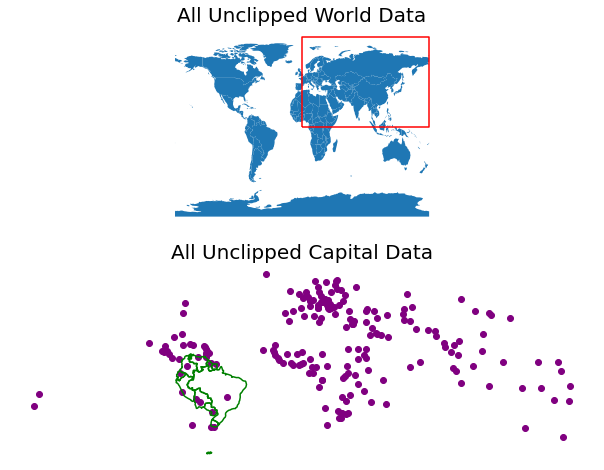

In [3]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
south_america.boundary.plot(ax=ax2, color="green")
capitals.plot(ax=ax2, color="purple")
ax1.set_title("All Unclipped World Data", fontsize=20)
ax2.set_title("All Unclipped Capital Data", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

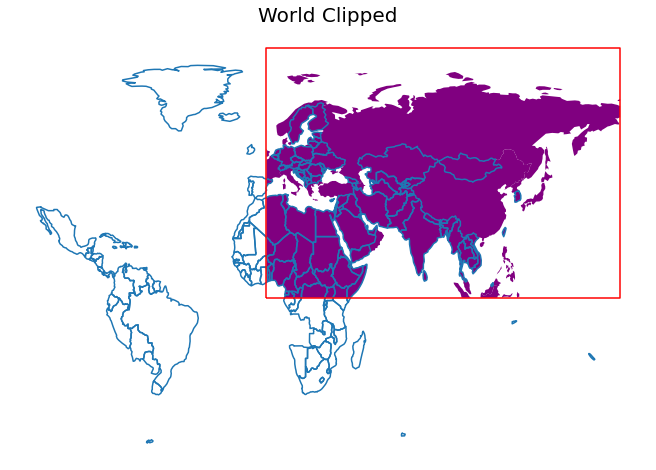

In [4]:
world_clipped = geopandas.clip(world, polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAApAAAAHWCAYAAADAXLm8AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy86wFpkAAAACXBIWXMAAAsTAAALEwEAmpwYAAEAAElEQVR4nOydd3gb15W33ztg772LgnpvluQqy3IvcI/txLGTOHHi9F6MbHZ3MrtfsnA2ZdOr4yROcVziCndbkqts9d4lUCQl9t4JzP3+uEMJotggsUm67/PMA3DqBUgOfjj3nN8RUko0Go1Go9FoNJqhYoz1ADQajUaj0Wg0pxdaQGo0Go1Go9FoIkILSI1Go9FoNBpNRGgBqdFoNBqNRqOJCC0gNRqNRqPRaDQRoQWkRqPRaDQajSYitIDUaDSnBUKIgBAiEMH+biGEFEL8aeRGBUKIFc51vttr/SohxGnvkzZa76NGozm90AJSo9EghFjsiIT3+tl+p7NdCiEm9bE9XgjRIYRoE0LEjvyIRxYhxLlCiAeFELuFEM1CiE4hRIkQ4nEhxB1CCNdYj1Gj0WjGEi0gNRoNwEagHlgshEjpY/vlQE807bI+tl8ExAJvSSk7R2aII48QIloI8WvgPeBjQBnwe+DHwBvABcA/nWUwPgrMGqGhajQazZgSNdYD0Gg0Y4+U0hZCrAJuAS4Bnu21y2XAKmC+8/zBPrYDvDZyoxwVfgl8CtgK3C6l3B2+0Yk8fhi4cbATSSkPjcgINRqNZhygI5AajaaHHvF3XIRRCOEGJjnbVwOX9nHsCQJSCJEqhPgfZxq4QwhRL4R4SQhxRe+Dw/MIneljvxCizlnnHmjQQohkIcSPhRBlznV2CSG+RoT3NyHERSjxWAdc3Vs8AkgpQ1LKh4G7h3C+E3Ige73OC4QQrwohGp1p8peEEEv6OM93nWNWCCE+JoTYKIRoF0JUCSH+KITI6+f6Gc77v9PZv1EI8ZoQ4qp+9h+W91Gj0Zwd6BuDRqPp4XXn8fJe6y8P274SyBdCzO7Z6Ex5L0FNgW9w1qUB7wBeoBH4P+AJ1BTwy0KIT/czhguAN4E44I/An4Gu/gbs5Fu+BnwVqAF+ihK5/wH8ZOCXewL3OY+/k1IeGWjHYZimPw8V0e1ERT1fQL3PbwohLu7nmK8CvwE2o97P3cDHgXeEENnhOwohJgLrUe9/tXPcP1FT6i8KIT7Va//hfB81Gs1ZgJ7C1mg0AEgpdwohjgBzhRDZUspqZ9NlQAuwFmgKW7fDeX4J4AJWSSltZ90DwGzgd8BnpJQSQAjxALAO+JkQ4iUpZaDXMK5y9v/tEIf9dWAp8C/UlLPtXMeHElCRsMx5HI1p+GuAL0opf9GzQghxE/AU8EchxIyw97KHa4HzpJQbw475CfAVwAfcG7bvn4GJwJ1SykfC9k9DCdefCSGekVJWOpuG833UaDRnAToCqdFownkNEBw/TX0p8KaUMiil3A5Ucfw093HT10KIGNQUbwvw7R7xCCCl3Av8DIhBFZn0ZlME4hFUBM4GvhUuuKSUB53rREK+81gW4XEnwz7gV+ErpJRPo6J+U4G+opAPh4tHh++iIrwf7ql+F0IsQIn6J8LFo3ONBsBERXg/ELZpON9HjUZzFqAFpEajCadnGvsyACHELJSwWhm2zypghRDCCN+XY5G7GUACsFlKWTfANRb1se39oQ5UCJGMElvlUsr9feyyaqjnGgPe7CPCCMfG3Nd7s7r3CillI7AJJQh7Kr4vcB5TnfzJ4xZUlJee/U/z91Gj0YwRegpbo9GE0yMCL+/1+HrYPquAO4BFQohDwDyU+NjlbE91HvvLI+xZn9bHtooIxtpzncp+tkdyLlDjmgwUArsG2fdUGWzMqX1sG+oxmc7jlc7SH0m9jhuu91Gj0ZwF6AikRqM5imM9sx+YKoSYgIouNqB8InvoiUZehpreFhyfN9joPPZZHcyxqeLGPrZF0rml5/jcfrb3d/3+eMt57F1ENBIMNua+3puhHtPz+GUppRhg+Xiv/YfrfdRoNGcBWkBqNJre9IjBK4AVwOpeeXG7UFGpy+jb/3E30AYscIo2etOTX7nhVAYppWxG5RIWCiGm9LHLighP+Tvn8T4hRH9iCjhatXwqLAtLAQhnhfPYO9cRVF5j73GkAguBDmCns3qN89hfNfdxjMD7qNFozgK0gNRoNL3pma7+KpDO8fmPPaxECZSefLqjAlJK2QX8DUgG/jv8IEegfAnoBh4ehrE+hLqPPRAuyJx2i1+K5ERSyrdRXWcyUVY303rvI4QwhBB3cupjnwZ8rte5b0KJxH0oK6PefEQI0Ts38ruoKeh/9FgLSSnXOcffKoT4RF8XF0LME0LkhK0atvdRo9GcHegcSI1G05vXUVPJ88J+7s1K4E6UwfhuKWV5r+1elMD8ghBiqbN/Fip3Mhn4glPhe6r8CLgZVVG8QQjxEiq38g5U68FBO8b04vNACPgMsNPpzrMZ5ddYiIq4FgGPn+K4XwR+JIS41jn/VOBWVCTxE/0U2LwAvC2EeBSVr7nMWQKo9zucD6N+bw8KIb6Eas3Y4Ix9PjAXVWxT5ew/3O+jRqM5w9ERSI1GcxyO/+NW58caYFsfu4VHJU/wTXSqry8AfoCK6H0NuB1VZX2NlPJXvY85ybF2oqbafwJkA19GRfH+HyqCGun5uqWUnwXOR3kpFgOfRvkkXobysPygs5wK76GmhmOBL6A8Hl8Hlksp+4o+gnqNn0NNWX8FmAn8CbhQSlkVvqOUsgxYDHwHJYjvQkUSLwQOOa9pa9j+w/o+ajSaMx8RZtGm0Wg0mhFECLECJb4tKeV3h3jMd1HejZdKKVeN0NA0Go0mInQEUqPRaDQajUYTEVpAajQajUaj0WgiQgtIjUaj0Wg0Gk1E6BxIjUaj0Wg0Gk1E6AikRqPRaDQajSYitIDUaDQajUaj0USEFpAajUaj0Wg0mojQAlKj0Wg0Go1GExFaQGo0Go1Go9FoIkILSI1Go9FoNBpNRGgBqdFoNBqNRqOJCC0gNRqNRqPRaDQRoQWkRqPRaDQajSYitIDUaDQajUaj0USEFpAajUaj0Wg0mojQAlKj0Wg0Go1GExFaQGo0Go1Go9FoIkILSI1Go9FoNBpNRGgBqdFoNBqNRqOJCC0gNRqNRqPRaDQRoQWkRqPRaDQajSYitIDUaDQajUaj0USEFpAajUaj0Wg0mojQAlKj0Wg0Go1GExFRYz0AjUYzzhHiPuDDYz0MjUajOcv5O1L+bqwH0YOOQGo0msH4MLBwrAeh0Wg0ZzELGWdf5HUEUqPRDIVNSLlirAeh0Wg0ZyVCrBrrIfRGRyA1Go1Go9FoNBGhBaRGo9FoNBqNJiK0gNRoNBqNRqPRRIQWkBqNRqPRaDSaiNACUqPRaDQajUYTEVpAajQajUaj0WgiQgtIjUaj0Wg0Gk1EaAGp0Wg0Go1Go4kILSA1Go1Go9FoNBGhBaRGo9FoNBqNJiK0gNRoNBqNRqPRRIQWkBqNRqPRaDSaiNACUqPRaDQajUYTEVpAajQajUaj0WgiImqsB6DRjAVur78AyALigYSwJd5ZgkA30OUskTxvCfg8HaP4cjQajUajGVW0gNScUbi9/lxgOscEYHev5+cCnwUuGcFhSLfXvxfY0mspCfg89gheV6PRaDSaUUFIKcd6DBrNSeP2+nNQYvBSYAUwawiHHQT+AOwG2oG2XksH4AJigGjnMaaPn/t7ngXMc5apYddtBrZxvKjcGvB5Gk/ipY8eQqwCQMoVYzoOjUajOVsZh/dhLSA14xa31x8d8Hm6+9l2K/BfwBxnVQvwJrAK2AwIlKiLch57npcDr49WJNDt9Sc5Y5zfa0kL220PcHnA5ykbjTFFzDi8cWk0Gs1ZxTi8D+spbM2w4vb6BSqHMBPICHtMRIm63ks58ErA5wm6vX4DWAp4nGWR2+vfD7wLrHEet6KmoZ9AiUYvSjRu6E9sDuNruwC4HqgGYp3XlBG2pAF1QD0qEhnFMQEbFbaUAcmoKGcrKhLZOpJj12g0Go1mONECUnPSuL3+Jaho2kxnmQVMQImrSCh3e/1vo6ahswEbJRb/F5XPeBXwEWdfm2PuAUmADyUmv4Oakh5J/oh6ncPFXcATAZ+ns/cGt9efABSh3s+eJQclTiuBirDHwwGfp20Yx6XRaDQazYDoKWzNSeFE495xfuxCTcPuAgJArbPUhT1vBWQfy2Lg08ACYCXgB14K+Dy1YdcSgBs4H5iNyjG8Cpjca1g/D/g8XxrWFxqG2+vPB/4dFT3siTQ2oV5bKyqfstAZ4yznMTvsFAdRwjgZuAH1/n0LFXWdzvFiMaOPITQ6x/a232oDbg74PK+c6mvsk3E4daLRaDRnFePwPqwFpGZIOCJuBnAtcCEwBViEEo6zAz5PaIzGlQl8DPgG8PGAz/PSWIyjP5zxTUVVYFc4uZtP9LFrPVA6wFIe8Hk63F6/CyWg84DlwB3AMpSAnRTweaqH/UWMwxuXRjOSWMISpjT1h6Nm/DAO78NaQGr6xe31JwKXoUTjtagoIMB+VDTtMKog5c9jMsDTELfX/1vgPlS09jFgHbA24PMcGeQ4gYpoXoKqNl8O5DqbjwAvAl8M+DzDn0s5Dm9cZyuWsGKBLi1uhg9LWNHAlcAS1ExAz3IQ+AvwD1OaFWM3Qo2GcXkf1gJScwJur38h8H3gclQxSCvwGvAC8GLA5wmM2eDOEpwcyExUtPFS1FR3j2AsRxUOrXaWvQGfZ+T+kcfhjSscS1hJqNSBElOaHc66WNTfbx2wD6gdz6LLElYUMBEV5Z+BiloXodIVXkGlL3wKVUDWiioq+zdTmhvHZMBnAJawFgD3AB9G5Rf3Rwh4Cfh3/X5rxoxxeB/WAlJzHG6v/+vAA6gPrn8BvwHe7KvQQzN8uL3+m4EnB9jlVeAfKMF4YEQFY2/G0Y3LElYq8HVUMZMbmIQS2aBycdcCO4EbOV4UNKIi57tQdk8rgT3jUVQ6YvKfwK1hq/3OUoISxAFTml1jMLzTHucLx/2omYCBhGNvbOC3KCFZNxJj02j6ZRzdh3vQAlJzHG6v/2/AnSiLHYAG4ADwq4DP8+BYjetMx+31Xws838cmH/A4yqZobP5ZR/jGZQkrAWW6vhBoM6X5cNi2aSjBGA/EAW+hCpH+A+UAEAWkOEuk/BX4jCnNcWehZAkrHhVBTUClORwcj2L3dMYSlgA+CfwuwkNrgX8DHjSlOSa535qzEC0gNacDTu7jCtT0zm3O6pcCPs81YzWmswW31z8DFW1MBW4N+DyvjvGQRuzGZQnrf1HV6NM59oUFVOS7DuWTuRxVsBVOJ/A0qhjpedRU7/+hIpHZzmNCr2O6UVHIRtQXou+b0lw1bC9Gc1riiMg/AR89icMvMKW5ZnhHpNH0wzgUkNoH8izHqeqdiormLETZ6SxE5ZT1sBf43GiP7WzD7fXnoXKtYoCLAz7P5jEe0kjzAqp6vje39rEunFhU9fkdKDH5Emp6/9meqUUnqpmJmtZuAjp0BE/TG1Oa0hLWp1ApA7cBN9G3hVZvbFRTAyxh3QlcgfKl3Yv6UrPGlKbue685o9ERyLMIx1Kmd0u9OajpQVDJ4juBTah2gJuAzSNiDaM5AbfX/yZwDnBJwOdZN9bjOcoIfvO1hPXvqJaUYrB9B6EUeAP4gSnNLac8MM1ZiVORPReY5izTnUc3qpd9tbPsMaV5vyUsL/A/fZyqAngKlde8Suerak6ZcRiB1ALyLMBpEbgGZVjdQw1KJG4JW3YEfJ6O0R+hBsDt9XcAvw74PF8d67Ecx8jnQJ4H/BrlKxoJe4Fvo6I95WHnM3Ai6KY0S4drnBpNOJawvoHqljUYl5nSXDnS49Gc4YxDAamnsM8OZqLEo0QVDvyUsSzK0PRHN+p3dFZhSvM9S1jnotIk/puhF8R8y5TmUz0/WMKah/Ltm4Wa5q60hHUZsFNPX2uGE0tYX0GJxyCqpeiRsKUi7Hm5Kc3xM5ug0QwjWkCeHRxG5fj09JT+CLDH7fVvAaoGWBq0yBxVuoF8t9cvzrb33ZRmEPiZJazfoTrrXAN8HlV53ZvDwCOoQppwElD5oz292HOB7cBqS1jfA17VQlJzqjg2S6+j/r5q+sp1dIpz0rXdj+ZMRk9hn0U4U9kLUN1lrnMeByTg85xqbppmiLi9/j+jqkH/CnxmRLrKnAyjPHViCasIVYm9tI/N+4AZ/XxoR6Fy1haiuvbsAFaa0hywy49Gc6o4gnEmqlPUcuexAFXx/yrwG21CrjklxuEUthaQZyFur//DwMMos3BQFYW1KM/HOCAZVVH4QMDn+fexGOPZgtvrL0K1UbsKJXrmO5tWBXyeS8dsYOGMwY3L8X/8FPBxjhmFA3zTlOYPR2scmoGxhGWc7dXGlrDmorwkL+hjcykqWr4WNaV9MDxfV6MZMlpAasYDbq9/Gsr77EKUL943gT8HfB5dKTiKuL3+P6IEEqg8qnVAC9AOrAn4PL8dq7EdxxjeuJyWhDegRGQryqqnYbTHcbZjCSsNuNZZ3ECes1QDN5vS3DpmgxtDnLzbDQw9Hewgqqp7Oara20blPfc8dgNvmdLcM/yj1ZzWaAGpGS+4vX4BXI0qWliCqsp+GGXdkxi2JKByymKA6LDHIMrWosV5LAFeCPg8NaP5Ok5n3F7/x1Dv/wRUdOI3wPcCPs/46m4xDm9cmuHFElYGUMzxZuw9z2egBE9fImkPcK8pzbdGaahjglPZfx7KK7IQdf8LoTooReoeUMmxvvb9sQt4xlnW6I43mvF4H9YC8izHEZJXoaYLb0SJw3A6naUL9e24Z4lCTXMncaxowUa1mnsGeDrg8+wb6fGf7jhG7tcCX0AJ+lsDPs9APbFHn3F449KcGpawYlAzEFej/v/PGcJhVcB6Z9ngPJae7oVJlrBuQxmB96TuJKO+PK8GXkO9P7ejvuiNBWuAT5jS3DlG1z9pLGFNBW4BFgOTUZ8dXWFLE7ARNcW/wZRm8xgNdfwzDu/DWkBqjuL2+jOAdNRUYSvQNpRomNvrj0F9E7/JWXry+DYAy8dNMcg4xu31x6Giub5xl3c6Dm9cmsixhFWM+v+8CrgUJZL6ow14H9V3/D2UWCw/XcWiI5ivQeUZZ6K6zWQ4zy9Etc0cz/zAlOb9Yz2ISHCitmsZ2pcTUFP4O51j1qLSVQ455xKn69/esDEO78PaxkdzlIDPU4fqQRzpcV0ci0z8p9vrnwR8B7gXuNrt9T95ttnSRILb6/8JcCfqQ2zGGA9HcwZhCWsCatr1DuD8AXbtQlW+r0ZFvLY51kqnJU5VdAwq8vUR1OsfSovC8YYEXgZ+P9YDOQnOQeV5DhWBEvizUV9yHgOwhLUMeMUSVimqKOkQyo1hj7PsM6WpgxRjgI5AakYEt9e/CGVfkYHqePPVgM+juzH0gdvr/wGqkOkIcHXA5xlfBQnj8JuvZnCcvMYjKCHVHxXAr4DfmtKsGpWBjSCWsHKBR4GLOfX2mGNFECXknwX+dTp3U7KElQd8GdUkoKdBgI0Sfi0oJxCXs4Q//5QpzVXOOXqE5Q3Ocj7HHEQk6vf9rZ5o5RnLOLwPawGpGTHcXn8C8GHAC+QA5wZ8nl1jO6rxg9vrT0KZZseg+kEvQHlAfnRcRWzH4Y1LMziWsM5B5SMX9rF5Laoj1WNnSp9mS1gLgefo+/WOd5pRfbOfA142pdk4xuMZVixhpaDSJw4Am04lYmgJy4VKtcoG2k1pBoZlkOOdcXgf1gJSM+K4vf4JqOntepSIPKNujieL2+v/BarbSjgdQFHA56kdgyH1zTi8cWn6xxLWbNQXkg/0sbkWNZ278kzLKbOElYkSYANN1Y9HSoD7UPY9bWM9GM04ZRzeh7WA1IwKbq9/Oaqi8SXgxoDPc1abDwO4vf4c1DTVuc6qyUDVuCs6Goc3Ls2JWMJKBX4M3MOxKb5wyoErT7dqXktY8aguL7NRUadwZ4hOVNV0jrO4UVW/pyMS2Aq8gSpemgakmNL8es8OlrASUNXgLUCdKc32SC7gHG+b0uwYtlGfBJawolHFS0VAKuA3pVkylmMa94zD+7AWkJpRw+31fw74JcrrcHxVGo8Cbq//QuAbqBwfAeSjimaSgScDPs+tYzi8/hmHNy5N31jCugH4C5DWa9NelHg8rT6kLWF5UF+yTtd8xuHgLlQq0CJUe8Rw2lFR5TpUccnNA3lGWsL6DPBrlBflIVRRSgfq/RWoHt8Pj6TAtIR1McrzdnbYaulc+35TmutH6tqnNePwPqyrsDWjya9RN8HvuL3+fQGf509jPJ7RJheVB2SgPPU2ozoC7USZuGs0J4XTP/wnqIrr3rwL3GRKs3qEx5AJxAOHh7G9YY+4OZv52wDb4lFRvCKUfdp/WcLaicqpDF96Gj6kOcflOkvvfvMfAv7bEtZPgf+LNMI5RN5DVVlnoszqM1H3xJ5OPJrTBC0gNaNGwOeRbq//88Ak4CG31x8X8Hl+M9bjGmkcf00TNd32/1Cm4YnANwI+z5axHJvm9MeJ0v2Tvn0dHwM+NkJCIHwMPwS+hGpE0GEJaz/KamUf8H1TmnVh+1qoHMxVQzh1/QgM90zm34bhHLnA91HV4P87DOfrzbnAx1Ci9nAfi+Y0QQtIzagS8Hm63F7/P4DLgYljPZ5R4jVgYR/rlwFaQGpOlRn0LR4fAj45jNHAPnH6QX89bFUcMMdZQFV8/zNsew7wZ0tYs3uqcZ3K2jRURC0e1UJ1L7AD1akk0naBmlPnE5awfjhcxVaWsOKAV1D3vYH26y0syzlRZB4Z6S9FmsHRAlIzqri9/otRU9mvA/85xsMZLX6BsjKaGrauC9g+NsPRnAlYwpqDyqm9vp9dSkdBPApUxXd/tKM8/3r2z0dNt2YB0hLWZag2gbeihGU4dcDvgK+h7IiSh2/kmkEIAncOZ6W+Kc0OS1gHGURAotpJTneWfrGEVY8yWPeeaY4CpwtaQGpGm9+gprl2AX90KpF/CTw7rrwPhwG315+F6nP9cMDnedDt9cejuvP4UGa62WM5Ps1pTwGq4ro/5o3kxS1h5aAE3k0D7PYxU5obLWGlAd8CvoKKMD4DzEJF5/sjA/XF65tADVpAjiZRwHcsYX2kd0GNJaxkVKHW08CjPdZDlrDSUTmV1cDWnk5GjjvALJRd0X+gbKRih2GM6ai/qThLWPePdWX52UhfVg8azUjyVeAtVGeCy1H2HE8DbzjRyTOJa1E32k6317844PO0B3yeX6Dae+0Dfub2+vX/4BjjTJ+ejrwBeIDvAs8Dvf1Vb7aE9QtHvA0rTrX3VgYWjyWoAh6A+4Fvo8QjqAi8Dbw9hMu5UHl5mtHlNuBlp6NROP8D3IxKkThsCesJS1g7UBHjl4ANQIMlrNctYf0C2I/6OziMikYP9//bl4BSS1g+S1iThvnc4wJLWBdUkDunm6iBukqNOtrGRzMmOIUlP0NVDvaOlFwX8HleGP1RDS9OdLXS+TEEfA9VRGOg2ns9ACwP+Dxvjs0Ih8g4tI+IBGea9XOonLx2VGWvCzVFNguVWrATVXDymCnN07JbkiWs21Ft3XpThYriPTwcU32WsD6Gcg8YChVAMWpK9N9Qf/+a04tWVJ/0v6CqpFeN6WgGRgIvoNpzbkdFKfta0oA2jvXWDqA65Iw7QeTYHr3xMR6ShZSviZbdF471mHrQU9iaseJulL/ZK6gk6XM4lgP1vNvrnxrwefaP1eBOFbfXPwf4g/PjI6hp+/9EdZ5J51j0fwYwvgXkaYwzffYnVMRkIOY5y39ZwtrOMTG5Y0QHOLw8iRLJKShz5vDHbNSUd/kwXCeSTlJ5wApTmq8A33Omvb80DGPQjB6JwEecZbwjgOucJVKetYT1yXHYE/5tIHkiJc+NNz8rLSA1Y8VdwDrg6p7cR7fXn4ZKsJ4MFLi9/oOnY8caZ1r6DVQOFyhvtR4yw55/iL4jRpoIcaKM84GLUVOjLaiorwVMCd/XFlBdkMShaWmUTk21oztDzF5XZbh31+OyJSixX4uKVp42ODlnoyF4n0FFbGcNcf+5wCtOF5TxaZav0cANqGn7Xw3nSS1hiVOJbDqFcC2I7w7foIYJLSA1Y0U7Kh8qimPmsTEoEfB5VLRkOadhdC7g89hur/92lN9ljLMUo6pJw3n9TCscGk0sYUWh2tZdC1yD6uwzIBJ46UPT7YriFEOEpMw/1GS0pMbab9w4mXVNXfaNf95hxLcFJwHdpjQPWsJKRImeF0xp1ozk6xkrLGFdiBLc+4bSi9mUpm0J63FUQcRQKHUev4aqwNZoxiuHhvNklrAKgA2WsDpQOcEBZylB/V+4UJZVCajCou3ABlOaXcM5jpFCC0jNWLEX+CRQ5vb6n0floZ2P+pvs6ZgRGJuhnToBn+d1ODqV/WWUca5E5RL9b8DneW8Mh3faYwlrIfAgKvWBkIBd5+RQm5vA4jfLSWzuu6HF4UkpVBSnGAvfPsyc9ytFTFcICcZrt06lfFKKEMcikN+yhLUENfWdBbRYwvoJ8CNTmpFM4Y5rLGFdB/jDfi5H/W/uBdYDz5jSPNLrGIF635tQ0+OD0fOh/MHhGLNGM4L8xhLWE8BzqCDGeai0kFjUfSEKOIL6/9iDEoGpqBSRbFRh2d/CIo4zUfcPF8r3ePkQxtBhCes9VLHpW8DbpjSbh+XVDTO6iEYzJri9/mhU1OjjwGWoKbHVwJ+BHwNLgJzTMULn9vpjUVGrz6KmVDtRFYs/Dvg8e8dybCfFOCqiccyI/xNl3+ECePXWqXbplFQDQ2UIRXWF5OLV5SKuvZvuGBeJzV3klzTTkBnHqpumyGC0IW/7zVbDma4m6BI8+rkFoZzDLY1XPLFvK1DI8Z6d4TSgUi8CHB9R2GZKs2FEXvQI4ojBLwE/pO+AgkRV0D4I/L0PS5cfoAp0BqLAlOYRS1j/iXJhSDvVcWs045hHgM/23A8sYd3LsXz4k6EV+NO3+d7SGLrbx8N9uActIDXjArfXn4KK9tyF6pP6zYDP88MxHVQEuL3+ONS3zQ+ivB6zUfYVvwUeCvg8p+/05zgRkE414h8CM9Knt6TEkNTYSXxrkOfvnknW4RZq8xKRRt9p5lFdITsUZRix7UH7kmcOGAWHjn2hr8lN4Nl7ZnPJMweYvLOuz+OHQDuqZ/EvTGluPtmTnCxOH+oPoPKHf21Ks6Sf/bJQxRA7TGm+5KwrRPkxzhjkMlUoz9Zf9/TVdgToV1COAtH9HPcYcG9PFMUS1v+iDNA1mjOVElQAYSbq/+2UOyl9jIcoouzdKBkcN1XYWkBqxhy3138ZasogHvWP9xDw/wI+T2hMB9YLt9dfgMrRNFBRlNnOMgcVsTJQBRzPorrtvHI6FgGdwBgLSKeS+n+Az3bGufjHFxeeIBQv+9c+JuxtYO1lRew8JwfpMojpCLL8mQMgBIempeEK2ix6+zCxHcf/WR2cmc6qm6aweFUZ896rYBgqHd9EdR960pRm33PpHPWf/G9Usc9OVAHM7qG2aLOElYTyYbwTuBoVkf2KKc2fOfmhd6KKtqJRebjzUDmjPV5y30f5Rz6OqpYeKh3Aw8BPTGnudPK81gATBjhmJ3Ah6n+kBNVtRKPRDJGP8RCFlL87nmx8tIDUjCnOdO821FTZx4A1423a2uko8x2Ul2C4kWsIZQi+PWx5O+DzlI36IEeSMRSQlrBuAX5RPimlYOVNk+1gtMuQhuDqf+wmtiNIS0osXXEupuyow3CmpLtiDF67dSoVxapxyTL/QaZt7z+y2JYYxaqbpsjKCckiu7xFXvhiicioGZYC7MOozku/N6VZ0c/rmw68x7FpXens/+l+9o9DicU7gRs5ZswNqlvLS6icwytQXUFGmudRBWJzB9lvO0rAulCpKuPmQ1CjOR3QAlKj6YXb6/8Oylz46oDP8/JYj6c3bq8/H5XI7Eb5Cf4J1UWjFdgb8Hk6x2pso8YYCEhLWAYq7+6ezlgXT35yjh3dZTNxd72R0NLNrA1Vg0YKyyYl88odM8gPNHHNP/cMuK8E9s3N5N2rJkqAD/9so4gKDtu9sRm4zZTmCX/flrByUQn5PW36mlCpDx8xpbnd2ScJVWn+AVTnmdMxenebKc0nACxh3QH8c4zHo9GcVoxHAamrsDVjhiPOvgM8M07FYwbwMsrgfFnA53l3kEM0w8cDOH2e160ooj0h2rjiiZ1kVQzqMnOUgoMqz1EOYU5aAIYtCUUbYurWGoZRPIISh35LWNNNaR7ste0+jonHEJAW7hnntCE8zPGRxtONL4SJx08DPx/j8Wg0mmFA9+HVjCVRqHZSl7u9/kvGejDhuL3+VJS9yXTgJi0eRw9LWF/EKbKomJDEnoXZzF1bGZF4BOfmJmW/hTXhtCdE8eZ1brIOt8gLX+yz/uRUiULZgvTmx6gpXVDTu70LWa7m9BaPXzOl+UsAp6fyz+i/2Eaj0ZxG6AikZswI+Dylbq//Q6h2hjM49kE6Zri9/jyUrcnnUJGhD/R4Og7DuaM5VnAzBTV1+WR4zqdTzR0T8Hmawo75IKqiLx7VRq4FJWpP/wKdXjg5jz8FZa/z1jVuO6mhk0VvHT7pL7tSDC4gY9uDZFS3200ZcXQkRol+fCTbUP2cq1Edky5m8Ny/Hp4GTuixbUqz1RLWd1BpEgBbLGH9CVXFv5iBC1PGO15Tmj+xhJWH+hu+m+NziDUazWmMFpCaseYyVArak2Nxcaft4CxUIcAtqEKeKOAJ4IGAz7N+mK4TA6wCLui16TW31/851DTl51Geeqlur38VsBb1oTsBVaF7AFVscT2qRd9QO4GcFljCugD4O2pGmY0XF9KcEWdc/chuooKRa2XbECAENXkJdMYaxHb2fw5DwiXPHDCe/vhsufr6yfKaR3YL48RZ7ASUkP+UKc3POWPORInJ5ShBeQ6OPyXK/3MtqpDm70CKJawfAx9FFbw8Bfwv8IOwa0QDn4r4xY4/9gOHLGEtRbXrdI/tcDQazXCjBaRmrGlGCYb/cnv9nx/pqJrb63ehokYXASuAS1GdAkDZkzyIMvzeN8yX/h5KPP4nyuYngKqk/R9U94ImZxwvAltQnphXoHpqfwZ4IeDzSLfXPwVV+X1GRR8tYU1DvS9xAIHpaWw7L48ZG6soKImsCUNgeho7z8mhuiDJBgw7yuCxzy6w56ytNGavrzzBxqeH1PpOLnj5kHjLM4ldi3KYvaGqr91mAG9YwvqZKc0vm9KsRUUXn3ZeRzLq99wCrDel2ekUBH0EJRRznfNkAvejuhTFRfQCTw+moESzRqM5Q9ECUjPW+FCtoO4HUtxe/z0Bn6df77xTwe31fwZVnNHTfq0cZUOyEtgN7A74PCftJD0IH3ce/wtlNL4LVX0+EyUuM4Af9ORaur1+L5AW8Hnqe52nCtgMfMft9VcEfJ5fj9B4Rw1LWEWoNIZMgMaMWN70TLKzjrRy3mulEU1d75uTwZueSSDZiyFeAN4GmrpjjM9sWlZw08GZ6aFbH9zu6u94V0jp8pjOQS1IP2UJ6yvhBS8Ajln20YIwS1hulMF4f5WTZ6J41Gg0ZwFaQGrGFCf/z+v2+htRxsabUNN6w4rb6/80ytz7NZRR+TtAYBQ9JxejTKPvQPVEnQiUBXyeT6IE5XE44+otHgn4PM1ur/9iVIHPr9xef3XA53l8REc+gjidUV5GvR90Rxu8dstU2xWSXPrkfsMVGvqvp3xSihKPsBJDeAI+z1EzR7fXvxfIbsyKv7AzztVnFDLkEqy7pMhOr2pj8o7awYRrPCqf76iNkyWsiUCZKc3wk9cARUN+ERqNRnOaoKuwNeOCgM/zPygD5KEWJQwZp4PMr1HRRk/A5/lbwOc5OMqG5bmoacxY5+cg8OpJnutqlCAtBTae+tDGBme69wVUDioAW87PozEr3lj2/EEjqbkrovNVFCWDECDErT3i0e31u9xe/1eRcrsRtM+fub6K6H6ii22J0bQmxxgJLd1DvS8e9WO0hHUXKu+vxBLWA5aw5gKY0mxh8F7RGo1GMxD1yTQHogiOyOzcyaIjkJrxRDkjU3Waicqz/ONYGX8HfJ733V7/CuA2VLFOIfCw2+uvG4oHptvrjweuAT6EimK+C9wS8HkqR27UI4clrHTgX8CSnnUSyDncCkB9dgLF+xqHfD4JdMYfnZnOBxrcXv9UbPknDHFR0f5GLnqphISW/u+/yU1dnPdaKe9dWcy6FUWcu3LQhkJuoNZ5/j5Qifq9fgv4liWsTagWfrcM+YVoNBqN4q+oL9ixwBOZ1D0zxuM5AS0gNeOJ9cCn3V7/pIDP09tw+VSY5DwOS3+6kyXg86wGVjsekx9BVetOcXv9k1HT6ccVxjiWPlejBOONqIhXLco78DsBn6djNMc/XDjV1v/AmbYG2Hx+HhsuKQIpQUoKAk1DPl9rcjRveCbJiokpAikfR4gDbq//i9jyf6O77ejzXznElO21Q+pxPXtDFSXT09i1KEcuXVk2mAHQOktY76K6qjyEqrL/cNj2hc6i0Wg0kXI3cNCU5n8CIL47poPpCy0gNeMJHyof8Kdur/+WgM8zaCXDYDg+iv8FHETlP44HulHFMDnAr5x1HW6vfzcqYrUHNa17DcqLsg54BGWHsjLg8wRHfcTDgFON/A1UruvRcGFnnIstF+Tb2eUtRn5JM1kVrWQfaR30fBI4MDuDd68strtjXF3AFxDij0j5U4T4YtHBRi58sYTEAaKOvemIc1FVmCQn76wbgnskoCquL0DZKum+sBqNZjj5D0tYT5rSHJepSlpAasYNAZ+n3O31fxv4P+CPbq//E6ciIt1e/yzgYWABcMd46Vsd8HnuhaOtEmf1Ws5DmS5XoiJbjwOvj1Rl+mhhCetcVNX5lb237VicSzDGZVz4YgkZNUMLEjenxvDO1RPl4UmpQthyA4a4K+Dz7HHf/9zPEeILc96vYOnKsiFFHcMJRrswbMnBmeky60irmLmxeqjnSI3wUhqNRjMU/gu4YawH0RdCSv2lWTO+cHv9/46qWH4I+GSk3pCOOfgXUJY9rcB9AZ/nX8M+0BHC7fXHAt3jptOMEKsAkHJFJIdZwnKhbnxfR5lt98nT98y2YzqCxrWP7Bn0nBLYdm4uGy8utG1DtEtDeIFfB3yekNvrvxJ4efbaSs59vTRi8dhDS0oMb1+jxGleSZO86rG9IpJqcI1GoxlmHjD57vlAxPfhkURHIDXjjoDP8//cXn8UYAIht9d/X4QV09eh2uG9DHws4PNUjMQ4R4rxEik9WRzheB/wNVTbxgERtsQVHNqvt3xyCusunQBSPocQnw/4PEcrXYQtzYSWLnvx6rIhdL/un6SmLq56dK/w3z2TmvxEaRtCC0iNRtODzeg72HzdRrxjML4iflpAasYrFqqt278BL6GmcofKZlSw6t3TTTye7jji8SFUkdCQiAraRihqaJJv39wshC3rpSFuD/g8x/n8SEFVMMqgjxaEESGBzRfmU12YxMK3yo3o7vERCNZoNGNGG6pd6V7g56h2pCNBHar6+k/O8znAbCBWIE9I/xlrtIDUjEuctn3/CXwA+He31//EUKOQAZ+n1O31v42yT/nuCA5TcyI+IhCPAK6gTUdCtJTKxbFfumJclExPk9IQf+stHgEQ4o+dCdG3lE5OZeK+hshG7RAyBO9ePZG987OYurWGBe/q7x8ajYafm9Jc79iP3THM57ZRQZI/As+a0gyfgSpB+ReD+K4WkBrNUHHy2v4H9W3sg6hK5EFxe/0xqJ7Fb47c6DT9kDX4LseTd6iZDZcUia3n5TH/vf4FW2BmOrbLEKjCqL54BaAmP+GkBGRHnIvXb5kqK4uTxcK3DrPw7cMnnUep0WjGNTaqfe1mVPezTahI34/72Hctx7qjfZThaT8qgd8CzwHrTGmeln6+WkBqxjt/B74M/M3t9Rc6P4PjHd1Hr2iA64Fs4MHRGaImjCORHjB/TQWVRclsXFYg571X0W8UsiUlpudpf5X5xQApDZGnkDZmxPLKbdPs1pQYsfzZA0zZMVIt0TUazRizCbimt2izhLUSlbfd03q0Efg28DtTmiFLWFHAp4fh+juBe01pvjsM5xpTdCtDzbjGsa+5BHgS+CFw2FmOAHVur/9XTsQxnHuc7YN2eNEMOxELSIGaxk5s7rIHivjNWVdJfHNXSNjyEceMvTczAWxDDMmQUaJ6bx+aksqzH51ld8VGcc0/dgstHjWaM5Z3gUv7iviZ0uwCfuT8+DAww5Tmrx3xuBh4j7C2qydBJyq3f9GZIB5BRyA1pwEBn6fZ7fXfDtyE6iktnGUe8Flgkdvrvz3g85S5vf4c4FrgJ6er4fZpTsQCEqAmPzGUW97iGmif2I4Qlzx70PXSh6ZPEbZ83+313xDwecK9f/YLW1a9c407Z//sTHnl43tFTwGMBBqy4iidkkbp1FTZkBVvd8e4XPJYvbZx26+3kNwUWf9tjUZz2vAacLPTn74/fg9sNKW5GsASVhLKUu5LDD3gtgZVbBOeC/4c8BVTmvsjHvU4RvtAak5r3F7/baiqXxs15ZABJAJzAz7P9rEc2xlDBD6QlrAuAt6K5PTV+Yk899FZLFlZyrz3B08FqpiQxGu3TLW7Yl1NGKI44PM092xz2j9+Cil/Wry3QWRUt1OXHU91fmKoPTnGBSBsuVka4l1UlWM90HjNP3YfyD/U/BPUlxKNRnNm8SxwhynNIbd/tYQ10zmuPyuyNuAQauajC5Wj/3NTmuuc469CFca8YErzU6cwdsVJ+vGOJDoCqTmtCfg8j7u9/m2oXBUbaAC2a/E4ZkRUttySEsOrH5hqJzZ2Mm1r7ZC+4WeXtxLbEaQ71lUle/U3d/qD/9zt9Wccmp7+3UPT0mwh2S8NsQ+V+tAqDRENbAS2oFoqtuQfak5F9RrXaDRnFq8DHzClOeRuXpawLkdZx6WFrd6AiiROd37+NtACfAL4kynNqvBzmNJ82RLWXMLatp5paAGpOe0J+Dy7gI+N9Tg0gLKdaGFwMbZWwoJVN06ODkUZXPuP3UZc+9AyDnYuzqE5Pc4AvjxAmsJ/AS8hxAeR8iZUWoNjWm7bwRjXcWK1bHKKLDrQpIuuNZrxQxdqhiAD5Qncm6eA+4FmYAqqTep/9rHfhc6yeigXtYR1H/ArThR+vzCl+VAfh/ygv3OZ0mwYyjVPV7SA1Gg0w4YpzaAlrHfpo+d1GA8Cn9u4rODH1YVJn7/ohYBIqx18Zqk+K47AzAy2Lc21kfKlwAPXv9jfvo6P6EzgK7mlzUzaVU9uWTMpdZ0YtjSa0mNpyIpn5c1TkIbAFZRaPGo0Y8MR4EXgIBBwHg8CR0xp2pawBOoLaTbKJiwLqDOluSb8HJawknudN4jKRdwOLLWE9YYpzQFz9ixh3Y/ysu3NdiJrZnFWoAWkRqMZbt6ibwFpo/pi/9SUpnR/67lXgc8X7W8c9IT1WXE8de9ckFIieQshPj+EcVQDTN1WS0FJE4nNx2awUus7acyIQxqCc18rJf9Qc78n0Wg0I8YG4AZTmof728ERfc3OcmCAc+0BPoRKo6kADjqV1UPCEpYX+J8+Nh0BrjOlqW8SvdACUqPRDDcPALXAvwN5zrqdwNdNab5wdC9D7AU4OCuDOesGLp6pzU1QT4Q4N/CAZ90Qx7Fa2HLzW55JCwBu+f1WFYF0Nsa3qdnvxGZdea3RjAFPAXeb0mwdjpM5Fc4nVeU8gHhsRYnHQ6cytjMVLSA1Gs2w4rTi+qUlrIeAFahOC1W99wv4PNsnfeu59XvmZy2ava7SGGgOuTEzHqQMIcTmwa7v9voTgNuB16QhLgTKgbQnPzkXJEzcU8/yZw+QUdmGEbRlVWGicO/uy49eo9GMED8E7jelOSaN5p1p8cnAEtRsyb397LrXlOam0RrX6YYWkBqNZkQwpdlGTx/XMJyb99XAQXn/kj80ZMf/ujYvgayKtn7P1ZAZh5AcOPiAZ8BKSrfXf5ew5U+kIbKFLbdKQ5wLvImUN6TVtNOWHEPJzAz+NjWN6K4QdpQhXN1j8hmm0ZyNhIDPmdL83RiP4zsof8fBWGAJaw2qV/X3e/WpPuvRnWg0Gs2oYAlLWMJKA/4CvAAkA49gy9Yt5+cPeGxDVnxIGmLbQPu4vf4ZSPnnzIq2rCUrS5GGmIeUf0XKqdmHW+Utf9zBnT/dxOz3K3CFJF2xqsiyPitem+FqNCNPI3DtWItHS1gxwGVD3F0A56Gqu/V9ohc6AqnRaEYcS1j5qB60Oc6q94D1TrX0D0tmpJs1/UQhm9JiaUqPdQHrB7yIlP8dFbTFFU/sFfFtQbpjXWy+sOADAPklTYD6xnzeyjLOW1kGwJvXuSmbnGpzBnu1aTTjgEOoXMIx9ed1xOM/gUsjPLQtkoKcswUdgdRoNKPBlzkmHgEmoqaxAX4sbNmw/uLCo9/wJdCcEkMwSrDrnGxQU199ebAdRdgszj3UYmxYVoj/rpnU5CVStK+B4l11HJmYwrMfmUmw1x0v60grHYnRrpqc+FN/hRqNpi/WA+eNtXh0uAW4+SSOaxjeYZwZ6AikRqMZDTL7WHcl8GLA52ma+rVnfn54cup/tCZHk9jczeYL8tm4vFDtpdqtPhrwefq1+gCQguzyKanHjhEnluU8/I3FTNjXwGX/2k97UhQHZmUA8MKHZ8oZW6rF7LWVJDUPuWGFRqMZmOeAOwfpPz2aXBLh/hI1W7JjBMZy2qMFpEajGQ3CVZlE+bW9Ywnry8Ct1+YlnP/sx2ZTWZRE4YEmtp6fZyPlmwjxCkLkAD8f9AqCrujOIOesLmfmxmq64gzaE2PojjHIqGxjzZUTOTQ9jdJp6Tz89XOwXQKEIKorRHp1m9i+NI/tS/OI7gjaE/c2GDM3VpN9ZFgcRjSas5FfAV82pTm0FlOjw/II919lSnOo+ZJnHVpAajRnCW6vPyPg89SN0eXDbXweNKW52qnG/g6QnVHZhgjZne9c7Y4BpNNq8EsBn2fLkK8gxKvRXfZtk3bXuwwgrsMmruNYh5tlL5Vgv1TCi3dOp7I4hZj2IOe9doip29VbcnBmOnvnZRHbHjQCM9Ltssmp3PmLzTrNZwC6YlysW1HIkeKUUFptuyu9pp206naK9zUQFdQ1B2cx3wB+PFjnl9HEElYmMCfCwx4eibGcKWgBqdGc4bi9foHqGfs/bq//toDP88Roj+GFD01/N761O5RZ2e6qLEq65SGvf01Amg9awroGeMyQlEpDPNoda1yIqtZ8s7d4dF7HRShz8nfCp7QtYSUX3zKl69D0dNcjX1xIWk27fc4b5cbEvQ3HjaOyKImGbJXvWHSg4ah4BJi0q55Ju5Qf5LpLCo2t5+cTjBJaCIUhgaaMWKrzE6nJSyQwM91uT4g2CgNNroas+FDp1DSXNASLV5Ux/72KsR6uZvTpRJmDj8e2fyeTm6KTowdAC0iN5gzG7fXHAL8EPumsugUYdQFZMTHlXMB1cDYAmUhpur3+APcvWf3xB9ads/Xc3HMQoi7g8/yq97Furz8X+ISw5SelISYfXX//cxsR4quXPLP/+qJY1xcve3J/bHVBIpVFSay7dIKx5opie+LehuMiiCtvmUJnXBTFe+q56MWSfsdbWZQEgNDaEYDqvAQ2LC+kqiDJDsa6DABXd0jmlLeKy1fvI1tVz7tCLsGT986xqwoTDQmEBhHgXTEujkxMZsK+Bgz9Xp8JfA/YagkrwfGBHTeY0myyhFWCKuAbClVA2siN6PRHSKn/azWaMxFHeD2Bitp9D9WHuh6YF/B5aod8IiFWASDlilMYyxeAn3se3kllUTIblxXYoWjDAALAP5Dy6wgRg5QrEeI/Aj7P226v/wKk/AJwB0JE5R5qltO21oi02g7ev2wCVY7I6yGqK2QLWyINQTDKMDAEhQcaueqxvQQNeP/yYnYvyiazso0b/7xzwPGWTk7l1dunMXttJee+XspAXXLOBCTQmhxNS1oszamxNKcdXWRzWqzdkRjtim/psifuaTCyKlrJOtJKam1Hn6LvDY+bkunpMr6lWzanxxoFgSamba1l4p56XCF1QMgQ7F6YzXtXFgNw84PbSK/pOPFkmtOZG01pPtvzgyUs0d+UtiUstynNwEgPyBLWM8ANg+y2A2Uy/q9xZd0zDPfh4UYLSI3mDMTt9RegqgczgXtQnRQanM1dqNZdfwv4PIPfAE7hxuX2+ucBbmAW8MDS10uZu7aSYJTB83fNoDYvEaSkeF8DOWUtbDs3L9SREGUA6xBiaVRXyJ62pcaYtbGK1LpjTSCCLkFtXiIhl6ArPorm1Bhak2NAqKhhZ4zBoenpdMdFYXTbSJdAGgIjaHPVP/eQXzZ4Ueg7VxWze1EOBQcbufKxvWdshMwW8Mb1kzg4O6xQ3pYktHSHUuo7XMmNnaTUdTJjUzWxnaFBz3dgVgZvXD+JvEPNMqOqTQRmptutKbHG7HWVLH29lIOzMli/vNBuTY09Gh2+5Jn9TN6p20meYewGlpvSrLKEdSPwCOoL7FPAF3vaGDrejO8C55vSHFELBEtY3wP+bZDd7jGl+eeRHMdJMQ4FpJ7C1mjOTNKAIuA/Aj7PowBur38xyovxN6jk8HeB/UM5mY0QQ6kmcabM70B9y5+I6uIAQEJTl+3eVWcARAVtlvkDNKfHklfaTGyHEiazNlS7HvvMPDoSo5fOWlvB4jcPG9F9tBqMCklyywcWgUe21vLiXTNBQFxbN1O217J4VfmQzW8vePkQZVNS5eFJqeLpj8+2r//rLiO668xre3hgdiYHZ2cybUs1k3fUkdTYRVJTF4YtT8pcffLOOty76jCkCtwuXVlm/OXr58jA9HRROiXVbk6PMzIq27joxT1kVrTy+q1T5eobp4jmtHIWvHtkeF+cZiyZARyxhPUWcC4Qh8op/BzQaQnr605EUqDuQ+cDb47wmLYOYZ/3RngMZwy6wlCjOQMJ+Dw7gC2ETdcEfJ4NAZ/nReBOZ9WQKxJbSMp2qqb7xe31f0XYsgx4OL6l6wM44vH8l0uYtKOW6/6+ywj3WMyoaWfi3oaj4hGUsJz7viq+EBL6Eo9DJftwC0hJdFeID/1yC0sjEI8AR4qTSa3tEAAN2QlGybS0kx7LeKagpInYtqBdXZBk55S3kNLQiWGfWri1d7S2oKRJxnYE7ZT6TuOSp/dz4592GIWBJuI6Qlz9zz1i8vZaNiwv5FCPj6dmuNgIrEaJok3ANpSx92rgwChc30BZ58T1Wv9V4N8sYWU5Y7udyLvDnAyDuTrUAntGYRxnBFpAajRnLo8A57q9/uJe669zHocc7ukmOhH4miWsnL62u73+JcBPcsuas696dA8f/OUWV/EeNSWZU9bCimcPktw4tHSikunpACQ3dA6y58BE2ZBe1U5n/MlNtOxelM3hSakkNnbaMzZW4d59Zk6xVkxIIqo7JBqy4o3SqWnDfn4BXPn4PuPmh3YYVz22l8m76o/LKXWFJMueD5Ba026/e9VEuztafywNA0HgbWARyjz7PGAhMBdY7KybjBKUu8dmiPw/YAWwwPl5NATkHqC917pWlEvFMqCoZ2pdMzj6P1WjOQNxLG8uR32jrg9bPxX4FvD3gM+zNsLT/hCotIT1jxO2SPl5V7dtX/7EfgoPNiGA+qx4kJL06t7364FZ9GY5SMmOpbkRDu94Xr95MvU58apC5CSYvqUGgMWry4wp2+uoKkhi35xM2hPOnMwfCay+cQqtqbHi/JdLmLinYUzG4bIlF71YYrSlxBibLioYkzGcYdQAyUPYby4wlQi+TA4zWWHPI/VojBjH1HxDr9VrTGn+wJTm26Y0dSVXBJw5d0KNRhPO1SgB+ZWAz9Ps9vpzUP2oP4/yavvmKZz7OEXo9vozgQ9P21pjxHSp6eim1BhaUmOJbQ9G/C21sKSZ5PpOmtNjCRoqkngydMW4QAiWrCylOjee+pwEANKr20mvahvwvHvnZLBpmWql+Ob1k5HGsZhZSm2HfcNfdhgxp3k+ZFeMi9U3TAJg8vZaOWtj9ZgWm+eWtzB9czXbl+YyZXstGRF+8RhpbAFbLsgno7KNCfsbx3tlfh7K4WAouFCRufwRG03/xIQ9H7xCa3hYi3KmCP9ZcxJoAanRnJl8w3n8kNvrvxjwALHAv4D/Gqyv9ADsAr7ba919CBEzc6NqNvPWNRPZuyAbgMk7Tq7xTUJLN83psdhRBpykUFv8RjnPTUpl3YpCEEXH98aWkoSWbvJLmohv7SanvIX67Hjmv1NBe1IUb3kmHd01ub5Dunc3iPySJrriXKy8Zarx/uUTWPZC/z6SI0nZ5BT2z87EdglCLkFMp830zdXklrVEJGqOTEymbGoaMe1B5qytHBd6aMmqMkqmpdlvXzNReP66S4ynyvct5+ez8WL1pSLrcIucsalaZFa2kV7dPl4r9COxoFmA+mI4msbZrwB7w34erSb074c9b0dVhWtOAi0gNZozkx+hIhAzUPlP/wB+EPB5dp3ieVNQ0+K4vf5FwG+BpQDPfGw20hCkVSv/4OLd9Zz7WulJXSSxsROKk9k3N5PZG6pP6hypdR0gJRgGSQ2dTN1agzQEzakx1OYl0pgRx/65Wccds/GiQnCijXPer+DclWXAMV3WkqwCJoemplGfVTmq3oW2IVh3SSHbz80jtq3bjmsPSiMkRUtKDPvnZhqZFa32nPcrjUm764dUBFO8t4Fl/oOsvbTIfvajs4yZG6s577VDYyqGYjtCnPdaqfHGDZPZuTiH2twE0mo7mLO28qiH5FhQnZ/IpmUFTNpRS0FJMxuXFci3r5skAGLag3bxvgZj1oYqsirGjXf2G0TW9zkNVVhzyYiM5kQkahZkB1AOFAL5lrBSTWk2jvC1X0dFO5sAjylNXXV9kmgBqdGcgQR8nheAF0bg1G1Axnl3PXIJE5L94RuigjbdMS7qcxMBVHeRCE/eFWPw/uUTODBXeRKuW1HEhH2NJDdF7ucb02UT1xakIzGaGx/aTmyvSKYNVBQn05YUzYE5mdTkJiANgStk0xUbhXvXiUUzcW3dxLYHZWdCtHjq43O48c87yKwa+anW5pQYVt00WdYUJImZG6pY+nqpEeUIqmCUwb45GWw/N483bpzM2pYue957lcb0zdV0xkex4eICqguSQrYhsA1BcmOnWLy63Mg60kpyYyfL/QeNDRcXsmtxDrPXV5Jaf2rFS6fK5B117J2XJd+/vPiocN+9INte9NZhozU5uud3Zs/aUG3M2FR90lPJnXEuojtDQxLMb1w/yY5v7eaClw8ZsZ0hpm6tMZrTYqnNS6R0SqoRmJEuG7LiueEvO8dDJHcvqiAkUs5HtREdjVL4V0xpbgawhPUblHF3FHAFI9wpy5RmpSWs3wK/MqW5fSSvdaajBaRGoxmUaLpbgT+iogZXXvLsgb8/+jlVPLlkZSmz1lUSZUNFUSIvfHgmCEF9dmSzYXvnZPDWdZOORgCFLQlFu3j8s/Nxddtc+EKA7CMtpDYMXUzOWVvJ+hVFbL6ooCeaeBQDKDjUDMDUIU61R4Ukd/xqi2hOi8F/9yy5+sbJ4oY/7zwlu6H+6Ix14Qra1OYl8srtU22JYMVT+8WkXtXgUUGbmZtrmLG5xiibnMq283LF+5dPYNOF+XYw2hACKNrf6HIFbYQtOTwpxX7+7pknXC+tut1Oqe8c88JKAVzwcol45p7ZctqWGjFhfyNrrijmzetVWkFadbvtCtri3asnEtMRZHIfQr8/JHB4Ugrbl+RSPjmV1Np2e+77lUZ8Szdxbd1kVbSdIEgl0BXrIq22XfQYqRsSUus7Sa3vZPLOOt67bILYvShbBl2CqD4ipf2tHyE6OLkC2ViUpU4kkcuTpSrs+SsoAQkq1WY0Wq1+ob+uOJqhozvRaDSagenVAcES1sPA3UcmJLN9aQ6lU9NY/txBpjgi7K2ritm7KIfzXgowe1PNoKdvS4ziqY/PoTMxGmFLFr1Rzpy1FUTZsGduJm9f6z4qKgHSK9u4+U87Bj1v+cRkXrl9OtIlWPhmOYveGd5C09XXT+LAnEyiukJ2QaDJqC5IsrMqWsWlT+4XrlP0UQy6BP+6b64tbEho6TIaMuPtG/6y00gZorVRZWEi25fmEdMRZOHbhwn33+yONth2Xh7blubKee9ViKyKVoLRLjIrWodstTQadMcYRHXZCFTrw+qCRNJqO4hrD2ILePZjs+22pGjOebPcmLq1lsHe84qiJN69eqLdkBVvxLV221O31RqlU1Ltxqz4o2Jr/rtHOOeN8hNE5BvXudk/L4vbfrOlz/eoZGoar39gKrHtQXv6pmojq6KVIxNTqMlLkE0ZcbIrLsqIb+kKZR9udS168zAZNZFFrQPT06jOT6SgpJnCQNNAu+4HpkR08uPZiLL+GWl+bUrzcwCWsC4C3nLWNwMFpjQHbxV1tjEOO9FoAanRaAbGuXFZfPdSVHTicRz7jWCUwSu3TZUVxckirabDzj7SYuydlwVCMO+dwyx5c/BandrsOJ75xFyQklt/v+2EKdTG9FheuX0azWmxuEKSUJQBtmTJ6jLmvV/Z5znb46N49HPzsV2CKdtrWeYPDLtnmQQqi5LYMz+LIxNTQuk17a7yyalkVLaR3NBJ4cFGivc2EN8WjPjc2xfn8P4VxcR0BGVXXJTIPdTMdf8YXru+nhYgpyu1OfGsvmGy3ZgVb0zZVsOMTTU0ZcSSXN9JXlirys5YF+tWFLFnYTaJjZ32OW+WG5N21uOyJRKoz44nFGWwZ34WexZmE90ZsqM7QzKjqs2VV9pMMNrFpmUFuHfWseKZA/2+Z4cnJrPznBwOTU0DQ+DqDsnsw60ita6DhJZumtLjKJuSanfHGGLx6nIxZ23loO9/R3wU715ZTGBWhsrnFYLpm6uJb+2mK9bFnPcre6d3RJr72JsuVHZHb+Pv4eYBU5peAEtYl6LyEnv4lCnNP4zw9U8/xqGA1FPYGo1mUNqJS0YZE18Qvj4qaHPl43vFe5cX05Qea+ydm3W02rkuN2FI586s7iCqK4QUENt+YiFman0nt/1uGwAVhYlsvqiAw5NSWXfpBLYuzeOS5w5Qk5dIal0Hh90ppFe3s31pLrZLcM4b5SxYU3FqL74fBJBX1tIjVlwAuxZksXdBtqzJT5QlM9KNd66WuHfXy0ufPjBkrdYdbbDlgnw7r6RJXPLsQfHO1RNlfknTsGu901k8AmRWtXPLg9uNDRcXsuXC/KMFUa7ukLzl99uEHWVwZGIKG5cV2B3xUcac9ytY9NbxrTEFHLULyjrSSmZlGw2ZcUZXXBTVBYl22dQ0A8C9q45Lnu1fPAIUlDRTUNJMS3IMrSkxZB1pPSES3REfZbx9zUTWXjYB2xDMf+/Ev82GzDhq8hKoz05g39xMuzMuSpyzukzMXl/F2kuL2L3omJd/1pG2bcnba3NQ09a1nPr0cwxKhOagCvBG6s8kfAohtte2TwNaQJ4G6AikRqMZGCFW1ZIx6Rd8qXdHmxMon5jMq7dNw44yiGnvtqdurzPSq9rILW8hta7/6dfXb5pMycwMXN02t/xhG8lNXbQlRFFRnIx7V/1x0cPXbp7CoRnpx1Y4kZkThh20uedHvT2DRweJMlJ/6UPT6Y51yY/+aMOQP4gPzExn9U1TWPD2Yc5562Tdls4ebAEHZ2UQ2xEkutPm+btnMmFvfVvptPQEgPSqNnvZCwHjZCqk2xKjaUqPJedw6ym3d+xBAqtvmMTB2Zm4um0ppJRptR0ivbpN1OQl2vU5CQaAEbJl1uFWecErh4xwT8zOWBev3jZVtqTGytt/s9UwbNmNihr2FmKnSgOwEyUkM4b53HN7ClgsYX0B+DmqgMcFJAGLTWmOzT/veEVHIDUazZlMYUkzH/nJRioLEthwSZHYvSBbhqINIWzJXT/dSHQ/no6XPX2AjdXtbFpWwBP3zWX2ukq2n5sHQvD2tSEyK9roijXojIuiLTUWpOS6h3fQnBbP+hWFTNxdT3tSNBP2N7J+eRFtKTFI19jF2AQQ39ZNd4whJ+xriGggPXmOtnG6xwhHB0NyNP+2bFIKAI0Z8QkAt/xhG6m1HSf9Tia0dpPQOrz2hAJY9kKA9JoOOuNcwjaEqM+Op2Raup3U1MV5rxyioKSJlPpOYdjyhKE3ZMVTVZQszn2tVDiiNnpYB3iMNNSMwyGU5Y17mM7bhvKT7eE85/HXgIVqgNBny1TN+EILSI1GM6wYtiS/rBXP33aL7hiDRz87X2ZUtRPVZQ/4OZ7r5K1Jl8H28/LBluSXNHGkOJnK4mNd2WLbu1n+zAFyj7STWd1BfFs3r9w+DWkIKopT6Ip1gZSseHJfv9eqzY5n/YoimlNjmLW+itkbT85rciCa0uMIRbvEpAiqhAG2npeHqzsk56wbH+bepwMHZmWwZ0EWVQVJMr26TU7eXmesX1FEQ2YcabXjrztdVFCy4N0TirqGlKa7cVmBjG3rljM2VY9WxXwxSkDWA+mD7DsUNprSDO8603POZ51Wgv4+jtGMQ7SA1Gg0I0bplDS64qLEordOrGztzcsfnA5CsHhlKYcnpTL/3SMUHGomaEBrcjT/+swC4po7+eCvtlKbl8ATn5xDU3qcqtCWktTaDhoz4o5WbL95w2S2V7WTdaSVhJZuZq+vpHRKKu9eNZHOhGNBm/eumsiGSwqZuqWG818v6294EZNZ2YqwJdX5ibh3D11E1uQl2jGdIaToY15e0yfbl+bK5tRYMXlnrVj41hER0xni0PQ0e+XNU4yFbx9hxqYqElojL2Yab1TnJXDEnSKWvl4qooIqmt+UFsuB2RlM21pDYvOINXNJQeVAX9Rr/RFU5bcBBBlaDubvev1ci+rdrQ29TzO0gNRoNCOCbQhqc5QX5LtXFtOcFkd+SRNTt9WQU95CQ2Y8cW3dBGZmcKQ4BWkIYjqCzH+/kvm9qqvfvdoNQEdyLA9/4xxslwq+RHcGyahsZ/6awxQdVGLzjRsmUTIzk1C0i+qCRKoLkwBYv6JInUxK4lq76UiMJrGxk6TGLqoLEtm5NI+E1mCfhQ2RUFmYyNvXuO2mjDhDGoKU+sgiYJc+vd94/sMz5At3zpBZFa1i6vZaCg8OaN1y1hOMMmRuabMIby95zT/2GG9cP4lNywrYfGE+hQcbWby6fNz12I6Enp7sW8/PkzsW59hZFW2ussmpMhRtiC0X5MvFq8rEnPVVg5zlpIlCTT+DyrlcD1zIsR7agSGc42FTmn/pta4WeLVXVFJzGqAFpEajGXYk8M/Pz5cdCdECoCFbVWSXTU2jbGpaHweoAoXu6BNn5YIxBkcmqeYYKTXtdCRGE9feRfHeepauKj9u3+b0OEpmZCBCNpN31LF0ZRnVBYnsm5vJYXcKk3bWM2lXHQWHmnnu7plUFyZxzhvlzF9zmFfumMG283JPSUB2xrp46UMzZHxLN/PeqyCpsZOp22ojOkdWRRuXPblfvHvVxFDZlFSjZHoatzy4XYwnj8axpGxyCq3JMeSWtZBa24HtEnTER5EROj6/Nipoc9lT+2nIiGP/3Ex2L8y2X7t1Krf8YZsxiqbew0r24VYm7aiVXXFRIror5KoqSArllzQZ89ccYev5+eL9K4pxhSQzNw1/SgbHchV7CG97uBanpekA7AU+18d6A7jWElaRKc3hmwLQjDhaQGo0mmFn77xMesTj+S+XENsepHhPPf+6bx6tqceKRWPau+mKjyalrsNOr243CvowSW5KU5Z0OYea8QzihfjWdW4ArnhiL0UHVZeZ4v2NFO8/sb3uJc8c4PFPz+Pta93c/qvNJDZ20poaS0VhInnlrRG9XlvAjiW5lExPJxRliJkbq96a935lEidpylx0sInbf7vV1ZIcw5OfnGOvubKYKx/fJ0C14Nu2NI/OeBfTttYS39JFMNpFSn3HmPaxHg1sQ7Dyxil2MFaFoGPag3ZCS5fRkRRtTOwnTSCtroPFb5STX9JkvPShGWw7L4+Fw2wqP1oIYMWzB8NTG1w9TzKf2s/rt0zl3auKSanrONplaRRoY/ACmy7gjn4MwrNQ7RN/bwnrOt0h5vRBC0iNRjOsVBUk8vY1bgoONsorHt93nBferA1VrFtRdNR2pys+mtSadrsxK94QEpnU1CUOzEgnoaWLQ9PSODgrg/ZEla94Yj3q8ZROSqEmP5Gkhs6j4nEgkpu6WPj2YTZdXMiaK4uZvLOOrefns/KWqVz25H4OzkynMTOORW8dJufwiYIyGGWwfWkutbnxNGTGy8aseIGUm5IaOsvdu+qbgZuG/q71TVJzF/klzUZTRqzdmB4rDs7KYNu5eXZ3jCGAzt2Lco4aPl/wUslIRZ7GDVWFiQRjXcZ5rx4iuitEZVGSUVWQZC9ZWWq49zQMeGxBSTMFgSZ2L8y2F75zZMxbNp4qtiHYtTCLkunpNKfHhtqSYlw9U9z1OfGjKSD3AAsH2ec3pjQ39bMtAzUlfg1wO/DosI1MM6JoAanRaIaVmrwEMASVRckiGG3g6gzRnBpDe2I0Gy8ulIlNXbI1NdbIPdTE5B11zNxcY+yZl8m+uVnsWJwj5blhriu2PFoUU12UxKrrJ7HiuYNHNx8uTqY2N56WlFj2LsgG4Ion+q++7s2id46waVkBJTMzjorajsRonr97JtiyA0PEdce6mL5Z5W02ZsSRWtdBd4yLlTdPsVtTYgxhy31ScBj4zUd/uGGby5ZvA8kDXjgCbEPQmBlv/Ou+eWqFlC8gxLdR9io3AzHClt+vLErKOtMFZNnkVIQtmbq1hpgum2lbayGCvs/tiVF2Wk37aS8eu2IMXvjwTLsuN8FIr2qTuaUtrqTGTkLRBk1psUwcREwPMyeG90/k7wNsOwz8CAhxLJ9ScxqgBaRGoxlWMqraSatplw1Z8WLNlcVkVbTy/uXKg9wI2qTXtBuFgSYWry4nrl1Vxk7fWsv0rbUiMD2NlbdMJae0mbSadrriXARmZRLnTNMenJNJ5YQkJu2sY9+8rOOqqZGSOe9XkB6BbUtzSsxxJuTRnUG6Y53boiEWI+UnavIS760uSErr43ADuOTgD65/4+ganwdLWE8BHxnyIAbh0mf2s/Gigje2n5v3OPB04IHrD4Vt/jOA+/7nPtqaHLNsuK45XimdkmbnljWLmEEsofqiK8ZFfVa84Y7QVmm8IYE3PZOoz443Vjy1H/fu+rEu108aZPtjwPsDbH8NeA5oASYN16A0I48WkBqNZljJK2vhlge3i3WXFLZsPT8/6cCcTETIpnhfAxP3NIge0+c+CEZ3hrYCi6omJFOfHU93XNTRHtmuoM1LH5pBVVGS8okEsCXz3z3M1gsKkALmr4ksty18WjypvoN571Xw7tUTAX4feOD6HcA33F7/N4Hp6VVtn0lu6PxEZmVbysaLC3sOezP8fJawrmEYxSOwJ7rLXn3uyrJ/979+7wnltW6vPwuQQjIpqWngIpvanHi2nJ9HQ2Y8S1eWUhQYtSnOYaEhI46G7HhjycrIipJ6qMuJByFIHYe+kEOhLSmaA7My2Dc3067PSTDOfa2USRHYQ40Q+4HFA2zfCNwzSF7jI2HbDwzbyDQjjhaQGo1mRFiyujxp4p76vUIyLbOibTAfyBLghpc/NOMWnMKT7jh1e4rqDPHUJ+eChPjWbua8X0FdTgIVxclIQ1B0oImooGTDJUU8/pn5XPu3XWRWD00kpDR24eoKEYpx0ZIex7vXuMGWBzDEV3r2Cfg80hLWDcDRdVO219KUFltdWNL8beuBdWnAT4B5wENDfX+GwGrgMlOaJ7TvcXv9i4QtH8IQC0DZuyQ3ntgqsrIgkW3n5XF4YgrBGONotPWVO6ZTtL+RS5/cR1TfzYHGBa3J0ZRNTqV8UiplU1KlqzvExD31JxVwy6hqI7at2157WZGomJAsMitbSavtIKWug7iO8eMg0x1jUJ2fSGZlG7EdIWxDsH55IduW5oIhyDrSyoUvBpi+uWashliD6lITBVQBU/rZrwq4yZTmYD0k77aE9VddPHP6oQWkRqMZKQ5nH2mbMMR9y01pbn3I658fvjK9spX63ESCcYCUtCVHU5ufeNyBDRlxzFtTQX1WPAfnZLL2smLOeaOcrCOtQ0qOu+UPW3n+7tm0pcSoFYb4fcDn6f2h9xNgK/AzYHpyYxfJjV1xqFZvb6Dayf0KyBvi6x2MFuDjfYlHh2ukIRYserMcw5bU5ibQuwp583l5bHC8L13dNvklzcxeV0liUxev3DGNsqlp/P0ri1j+7EHcexuGadjDQ3e0wQt3zrBr8xMNgITmLnvq1hpj/poKBou09kdMl82KZw4Ymy4sYN+8TLlrcc5RIZpW024vf/aAkVk19h6R71w9kQOzM0FKMivabASiNi9RTN9czdz3Kkit7xyrHM4g8A7KTDwE7ADO72ffLuAWU5qlA53QElYMqoVhJvB/wzZSzaigBaRGoxkpkoDYQfdS9EzPPipseZ8UvCskn2jKiFOVMVJy5882AoKDMzPoinOx4RIljpKauzCAFc8dpGRGOkfcKfjdKaTUdfCB328b9MLJzUHS6jqUgJTyQYT4We99TGmGLGG9zLF8rz8A3zaleTQMZAlrOfA4SlSeKv9mSvNg75Vur/8KbPlYTzh3wTtH+o3sNmWqAu0LXgwws1e06o5fbuH9y4rYuSSXlbdMIe9QM1c/smfo1SijQH12vMg63MKyFwKk1Zx8P+twCkqaKSjZjQTRlB5LU0YcjRlxbDs3j+c+OksuWVkmZmyuoafLy2hTVZDIgdmZTN9UTWJzF2WTU0VLaoy85Jn9YvLOMZ+udqGmq13OMnuAfe8zpfnOEM65CEgEfmgJa7MpzZWnPkzNaDGe7hcajebMIgXYHPbzo/TfrmyhJayogM/TLQ2xIvDA9V5piCdD0Y7NnRCUTM8griPErE3VLFhTQUptO0ip2hc6XP/wTmLaVTu3pvS+tWt9ZhxvX1XMY/fNxX/XTDriDBoy40LA3wIPXP/JPqKPADhTbDcBF5jS/FS4eHS2H0ZFZy5DRWpOhRWWsPrSTBMwRBpCpE3bWjNgWoBwzNnT++i8YgDnv17Grb/fRmJTFxUTU3jljmmnOOThI7rbxr2nXjRlxNkp9Z2DtsGMFAGk1ncyYX8jc9dWcvMftxsFB5vE+1cU87evLJSHpqQO8xWHRs/fcvG+Bha+c4Tr/7pLfOiXW4xxIB5BvW17h7Dfj0xp/nmI55zpPLqAZyxhfdkSlgvAEtZ5Pc814xMdgdRoznDcXn808CkgBtUxYjeqmNMA6gI+z0gmgC0EtqNamD1gCcsAbgO+xfHJ927gJ5awvhaQZk9D3/8F7kts7JStKTHi3auKySttJrVe5fpd+dhenvj0PLaen8fsjcq+JrOqnWUvBHj91mkgBA99azEJLd0kNXQS3WXTHWNQVZSkcgGlpCU9jke+sBDpMlzO+zIgpjTXDbJdAistYV0K/M15rSfDrcCdnGh/8ihS3oAQt0zc3TDwGZwgmhwgTJBa38ltv9nK45+Zx2F3CtsXZ5NT3srhiSm0JUfTkRBFZ1wUhQebmLe2sv8TjQBTttVyYHamUTY5lYkjPMUe1x7kiif2cdidwjvXTJTbzs2jeH/jqBc3T95Zx4blhfb2JbliwhhcfwgM5rD/EnB/BOebHvY8CTWN/SVLWE+jutbMQOVHa8YhWkBqNGcwbq9/MkrI9Jer1Oz2+tcADag8pBDQifqg+FHA51l7ikPYBHweeBfAyel71BJWB/B0r32/ACy2hHWNKc2mgM+zz+3139KaGvsktkS6DJ68dw43PbSD1NoOXvrgdBACV7dNl1N4UFjSTEblsYhbYkMnbamxtCVFHy0giWvtZulrpco4PCxPEOVHNyyY0uyyhPWhzRfkv7ZheeElxXvqySlvJaWug7S6dlLqhhRV+xG9BGTA52l1e/0fErasPDAnI23Cgf4t+HoikLYx8ESTgYrcPvrZ+bx/xcQ+9zniTqFyQhKX/Wv/SU9bNaXGUDEhmanbaod0joJAE3Gt3fa+uZnGSAtIUOG1wkAT07bUGBuXFdCaHE1ic/egxw0XEli/vJC25BgjqaHTdoY03hgoJeUQcFeEPa2n97FuMvBV5/lUtIAct2gBqdGcobi9/muBf6JiUR9EWc4sRXmt9VQ8zkTl7E1EVVcKVGuxicByt9f/yQMMaDMngbeBp5zHqcA5qNymRuAjpjT78otZ08/5LgDuQRWrEPB5nnJ7/Z8S8D8SsqTL4MU7Z5B5pJWWdDXd15wZz9++eg4ARfsauPKJfWRUtFKXl8j0bTUsfKcCG+iMj6Ir1iC5oeuogMk9fLSz2g8CPs+DA7zOiDGlGXLf/9yvgUsOTU/n0PT0o9vSqtvtRW8fNiburh9IJfRZ0RHwebrcXv8/A9PT78ta0iambq0htvPEz2zh/IYH6+ADkNAa5LIn97Ph4kJS69rJKW8hta6DxKZuorptnr97JqXT0nn2nlnc9Kedg58QCBocrfDedGEeG5cVghC8c42bgkAjcW1BumNdGCEbV1AS2xEkub6TtNoOcsqa6UyMJqGl2yidkkrQJRit/tWTd9Sx8aICNi4rYNkLo6NdJLDmimJ2Lc5h5oYqlq4sG6/pZYmo1oVrUKkaPaxC5T0O6rFkCSsO+Cuq4Ky/Vp8hlHfkYBXcmjFEC0iN5szFg+qI4gn4PM87654ZyoFur38B8ArgX184K5jY3tHx/NUzZHxbt1iyqozkRlUJK8H3XWn+W9iha1AfDn1iCete4CFTmlWWsN5G5Qz25ouWsH7ZE8kI+Dx/cHv9fwW+CfxXR2I05VPTQEpmratk59Jjhc9lU9N48uOzacyKR4RspmxTnpMGEN8eJL6XJNs3NxNs2YYhrKG8LxEjxFPAr4UtPywNkbpkZSnRXTbbluay8uYpJDR3ybxDzSK+tZvivQ3klrWEC8oES1hJ/fQP9klDLHj/8gnnr19eaF/9zz1Gbvnxu/VEIMOnsKtz43n1tmnkHG7l4mcPEhNWLNJfz3CA23+1hSc+PY+63ERak6JIbAn2+5IPFyfz+i1THHEoyahqoyErHiRM3VZDyfQ0yqekDfi2RXWFSK9qoyErTs5fUyFcoyQeAVIaOpm/poItF+bTlB6HbQgZ0xESqXUdpNa2k1qnUiiaMmJpSYklpaGD7PJW0uqGZh0lge4YF8Fog1CU4MjEFHYsybHrsxOMue9VsGRV2XgLPe5EtRvcDSQA5znP/4iaYv4FKkVlqL+kjwIfGGD7t4DfmtJsOukRa0YFIaW2XtJozkTcXn82UIayn3k14PN4Izw+Frj6hT9+4fdNsYnZd93+faQQSAOyy1tFY2ZcqDvG1RKKNooCPk9fIuc4LGF9HPWhM8GUZpklrAJUTmZBH7v/HvhMbxsbt9d/A/2I4Ev+tZfVtx4rBEmrauOWh3b0O55glODpe+bYTRmxbwUeuP6SwcZ/Kri9/kJs+U7O4ZYJnr/tFraAA7MzePsat5SGEEJKabsMMWdtBee+XhZ+6M9NaX5pgPMuFLZcmV/SlJZZ2UbFhGQm7G1gwXsVrLm8iJ1L8rj88b0U72+kKj+R5++aqQSlEIiQZN6aIyx+a2gz9y/eMY0jk1K560cbjhOe4QQNeOyzC+hIiiajopWW1Fi64lwgBEkNndz+260AlExNpTMuivxDzQSjDbpjDNqSYmjMiKOmIJFD09JACIygLT/2ow2jrqdChuDdq4ppSo/DFbJpT4y2m9LjRCi6VzG4lEdTIybsa2Dp66VHc3R7n6+iOJlDU9M4ND3NbkuOOS7CmF7dZs9ZW2lM3Vo73sSjDWxBFbmUoKaoT0nYWcJ6l2MpNX9DBbI+6Pz8OnCF9oTsAyFWASDlijEdRxhaQGo0ZzBurz/8H/wHqIjBbsAb8HmG9s8vxKpqkTn5p1FfntAV62LjsgIasuOlsKWoKkoGmBXweXYNdhpLWI+gPiguMKW5xlk3F1iJmjbvzS+BL/b+MHF7/THAb1FT3RCywdX3jN+dP914gkl0Q0Yc28/NZd+cTGlHGQIpbYQoCPg8g1aJOFWh0c5im9IcrKggfNw+EZLfuuunG0V0txJgzSkxxHSFMGzJu1cWc2B2ppy35ohY9PYRDFuCClgtN6X5Vj/nLADKe69PrWmn8GAjO5bmcclT+zg4O1OJMuDCFwN0JESz6aICbJfgtt9sJXkI3orPfmQmNQVJR9MEerNvTgZvXetGOr+L6/+0nezKdlqSotm9KJvivQ1kVww+I9kdY/DybdOompBMQnOX/OCvtowLTSWB1uQYGh17pNTaDhJaumhKj+PQ9DQ2X5Bvh1yGmLmpSiQ2dSEkFO9toDktlrevmWi3psYarqAtCw80ipzyFqK7bFxBm5T6DnLKW8ebcCwH9qHuF3nA94F/mtLccqontoT1OnCp8+N5pjTft4R1NfBj4FZTmoMWs52VjEMBqaewNZozFLfXL1Cfez2fTd8K21yKmnoaEoaUMrrbJrrbZtmLJQSjDPHqB6ZKJwIz1DyltSgbnKMfQqY0t1nCugwVeegtIj8PXGsJqxm4vCe/KuDzdAEfd3v9CcAdMzdVs+ucHBCCJStLmbaxmvWXTmDPomxKpqdTEGji0PR0JuxrIKWhk+fvmmEHY1xM3VZruII2VYVJpbX5if3OyVrCigXuAj4EXM4x+7MuS1g/Bb5nSrP/apZj1EqXEGsvLSKtpp2Zm2qOE25LV5axf26W2HJhAVkVbWUT9zYUoX5333cKi/p6n5NPWFHfQWNWvIqOAbsX5lDhTiGmPcjyZw8w4aAKILUnRrNzSS712fFDEpBF+xupKUiibErqcfmNNrDq5smUTE8/Go1LaO4i0ylmSmrpZvGbQ4tybl+Sy8aL8u3uuCij4ECjPO/10nGjqwTKczSp+fj3Kq2ug7Q1FUzdWmOsv6SInc7fIsDGiwtkMNolkus6uOxf+yg82CiiguM2aHMQKEZFG0NAT1T+YVOa3xnG6/T0G92PuidgSvMlS1hzdeTx9EILSI3mDCXg80i3118KbEPlM85G3bz/E/gsEQjIHtoSo6gqTGLHklxZqexw7gn4PIeGePjDqKjdcULIlOZWS1jnoaqy5/Y6ZjJQjyr2ebvXtq8Bd8S3dqsexzXtzHu/kpq8BBqzVJRow/JC+92rJxrSEGy4uMAuPNhkdMZHGdM315Rd9FJJT/l1NvAl64F1P+4tBC1huYHHgCV9vJ4YVF7mPZaw/h2V29lv2W5OWcu8qqIkdi/MBiHYNzdLFu+tF/XZ8dTkJdKWEkNaTTsNWfHU5iakTdzbUIOqiJ+GsjT6fB+n3RP2/HykfCu+tdvVmhwjGrMTAKhwpwAwY1P1UfEIHO0J/fY1E1nbZSNsycXPHSC7su9uLIveOUJbUgx7FmWz6uYppNR3MmFvA5uWFVAxMYW41m664lzYLgNXt82fv7mYpKYurnh8L+kD9J9uT4iiMSOOqsIk1q8oovBAo7HozXKyK9rGjXgcCgmtQS5+PsAFL5cghaAlNYY3r5tEQaCJhW8fNkarCOgkaUH9PW9H/b+Fl+P/YZiv9Z/Az1F/20lAMxy1wNKcRugpbI3mDMbt9f8U+HTA54lzfi4FioCvBnye/xvSSYRYVUvGpI8vf6B4ywX5ap2U7QhxX8Dn6bdgJhzH/zEO+BLwQF8fFpaw4oE5wBdRifa9+SfwzZ72aG6v/wLgnSsf28Nrt0xFGoIJ+xqOVjvHtAfJPtxCWm0Hk3bVs+mifLsxI06m1na45r1XsS2vrGUuqlJ8O8rG6EGUSDuMEtrNKJGaNpTXCFSiRPKfUYG5hUAqcAD4uIQPdscYRHfZBGam88b1k7DDp95tqcJcQpB7qJnr/rG7FFWJ3WN1srQvH0q31/8ycCWqKvZC4P9lHW6hPjsBw5a4gmqqdPmzB8grPzbjbgPPfmwWdbkJCKmqtV1Bm4/+eGO/L7DMncwrd0w/GmHrGXNUV4jivQ2UTEsnFOsCKYnpCKn8R2DhW4dZ9M6RE85Xlx3Pcx+dJUNRKrcw80ir7fnrLsNl68+lUaQDZbfVn9XXVaY0Xxmui1nCSkGlrSwCPm9K89fDde4zGj2FrdFoRpkuwOX2+oWT85gINA1ZPDrYwhD75mbaSLkBIb6IEBucqeShchvwJyAeNXX1WO8dTGm2A+ssYX0aJejuQXWz6eGDwA2WsO4xpfkYqjKUmI4Qi94sZ/2lE6goTrZnras0pm2tIb2moyeP8M/AX658fN97KIF6CSoftAq4zJTmdgBLWL/geGuSSMkFvuEsJyBQ/ZgBJu2qpzklhvWXTuDSf+0jri3IC3fPJKOilQVrKsgtbQbo3Uf8u8D1fZz6CZSAfB3ACNr2tC01Ru/2hb0xgJv+fMyS57Wbp3BoRjqlk1KOi1SGUxRo5rbfbKU5LZbdC7MIzMoEIBgbxYG5xzIQbvzjdlIbOnniU/NoS4mhZHo6i945ggQOu1PYPzuDqKCtOq9IuPLRPaTUd5LU2GkYWjsOF53AD4GXgVdRebu92Yn6YtefeHwEWD/M4/oMyuoL4GpUL2zNaYgWkBrNmc0FwHpnOlugcub68mXsFwlUZKZlOmbc3wz4PP15OA7E6yjxCPBJ+hCQPZjS7AC+bAnrPVSVZg/PoqJ8v7CElcn9S9YCVOcnUp+rpmuv+ucewynUkChhdRvK9/JtU5qdwPuWsA6hxOm9wOcsYSWg7EmuO4nXddL0CKWu+CgKS5pIbOy06/ISjdTaduLb+kzJ9FjCOoLKBw0vL59rBG153quHREdiNNO31BgJLZEbYC985zCHpqex/dy8fgUkQHJTF8lNXeSUNWO7DI4UJ9MdF6W8N7PjwWXg/+gsAELRLjKPtHLdX3fSlhjNW9e5ZfnkVBHdEbQRgu5YlzFzfZUoGuB6mpOiEri+J2JtCes14Jpe+2xCfaHqS1iCcju4O0Jj8KEQng5yuSWsGFOakXwZ1YwTtIDUaM5QHMG4AHjIWXUD6n++v37UfdISk5DYGh+XgBBmwOdZdZLDaejn+UD8ExWB/DUqqf9LpjQDlrD+DzXV/KCw5bvvX1F8AcCknXXhVb4CFQlsQwXbClBFApjSrLCEdT6q7doFJ/l6Tpn8kiZSa9vtt691GzsW55BV0Wa0psbSFdvvbXkLqmq1d0JhgR1liA2XFMk7f7ZpQNf3gcisaiemI8SRiclsvDC/zynncKJsuOiFAI98cSEAdXmJR7fZhgAhmLm+kgteLaUtMZqn7p1jd8ZHGee9eogZm6oNIyRpT4wmrr1/T0nNSbELuNaUZgDAEtZnOVE8rkelRvQlHrcAJvD8CIhHUNZiPSShBOWp9o7XjAFaQGo0Zy6fRt2ge6agnnQe343kJDWJaTnO09+cwlhCHKsIH7RbBahOLpawfouKFM5B9c4OmNLcbgnriwGfJ+T2+q/CiaguXlXW+xQeU5of673SEpZAdboZM/EISrBd9HzAeOlD02V9ToKoz1FR1JU3T7Yvf3yfUVWUxNbz8+0J+xqMi14qAdjWh3gE+DRSToruDM0XqoL2pLnmkd34757FpmUFNGTFcekzB/vc78DMdFbfOFn90IdkTa3rYMamaoLRLt68diINWfF0xkcZ0zdVM3t91dH9ElpHr1XgWUI7cGOYeHQB33O27Qd+AvhRbQe/jorEz+51juVDdBU4WXrbTsWN4LU0I8h4bZek0WhOnS+jvtk/7Pzc46XyUN+7901LTHxKTKi7Hag+2YE4RTOdqIKSIfu8Ocf9L2r6+3FLWNOc9T1dalqAOdf+fdfbfVjRPOBUUffGoG/fyVGnZEY6oWjXcQqsPSnGePvaibx/RTHtSdHGnoXZtCRHg2N50puAz1MjJDnBaMM4PPEEV5+IyKxq57bfbCGuNUhgViav3jq1z/02XqzaEsZ0hijeU8/M9ZWk1LWTU9pMYmMnDVnxvHflRNavKGLf/GxqCpIAmLdm4Kim5qTZj8pz/Iwpzb1h6w3U//17KP/VX5rSDJjStE1p/i/KRSCcOmCk8wlSe/08tBY+mnGHFpAazZlLHrAx4PP0tA152nm8MpKTpLc313S5ouOBZac4ng8DS0xp/jTC415EFQO9jYqcHEfA59mRV9pyL0qghlNBHybbjvj8cB/7jzrp1coyZ+FbzjAdV4z63ETmrK0go6LVTmrstBNaurdw7IvACUhD3N0ZHxV46Y7pdEef2m09oS3I7b/eTEJTJ6XT0vjXvXNoTTp+siqtuh2kpCvWxbw1FVzwaikf+P12PH/fzR2/2cptv9nKvHeOcO6rJVz7t52seFIZj5dPTkXXyAw7m4H5pjSvNKX5l17b5qNmIi4wpdnXF8Deeb8ZgH/2559c6vb6h32G0on+3xW2agOq57XmNEQLSI3mzKUGuNjt9S90fu6pMP7nUE/g9vqN5tiEnojBKU01mdJ80pRm/UkcehdKOC53CmH6OvduwNdr9VTgu86HVm+uA2JPYizDSmalytlMretk+TMHSKtuJ6orxHkvl3Du62UkN3YZLSkxxiu3T2t76P4l/RY/BXyeVdIQ/xBAVHffbQYjIcqGD/x+G1mHW2nMjOOxzy7gzWsn0uV04Lv8qf0s8x90/Cwzjx63b1YGf/7GOay+cTLz3zvCnPXV5JW10tOne81VE/HfPVO2J+jsqWFkXT8m85jSXG9K8+1+bLNigKU9P3fFuDgwK4P3LptwbVtyzPuoCu7h5kKUtytAEPiEKU2dBHuaov+LNZozl/9AWdg8AUwBehLObmWAaFYvLmqMS8rOb645GPB5hs0Lri8sYU1Cid4WVPR0Bsqz8hLgp737YvfBA8C3UYbIPfwbKv/yP3vte+twjPlUcYXUS2pPiGLO+iqm7Kw7bvvFzx+kNm+OPDwp9XzgTtTvsz/yY9uDIQGuzhiDd66ZSFdcFBUTkhESMqrauOxf+0jou8L7BKKCkhse3snu+Zm8d8VE9s3PZt/cLNy767j0mYNM3N3AWx5JbZ7K3Qwa8Nb1k5CGoLowiddvnsI1j6rZ1ITWICue2s+RicnsXpQjavMSKDqgK6+HiY9bwvpJjx1VBNwKnAvQmhzNK7dNk/U5CeFftr7s9vr/O+DzDClneTCcL3JfDFv1M1Oam4fj3JqxQUcgNZozlIDP8wjwI6DY7fW7gJ7cqLyhHO/2+jOATwDkN9UMrRfdSeIYjW9B5V91ovK2VqJ8D3+KMvkeEMdHclvYKgn8A9XFpjdfQeWNjSmtyUrr9leJHN1lc8sftouorpBEyrvcXn/6AKdLju4KYQNP3TuXwKxMDk9SwWNX0Ka6IJFHP7+AdZcUnjAlPRAzttRy5083EtvaDYYgMDMDgF2LVcu+7MOt7J6fydOfmIM0BBkVyqzc6ZOODVQUJpJ3qJlpW5Q3Zaif3uWak8IA1lrCet6JKgJgCWtxPznAPfiBf9Vnxf/p0c8toD4nQZz/cgkf/r+N3Pzgtp50it45kieF8//9C5SXaw9j/v+nOTV0BFKjObMJoT5g4oEPoATa/w12kNvrn4Yq2khN7WipjrGDEU0zub3+FFShigEEAj5P0O31ZwLfRMr5CPGmM44Ox+DcBfwKFaGIDzuV35RmJFXjb3LMpNhGRexe772TKc0jlrA+wijZh3RHG9iGoC47nt2LsqnJTbATW7qN1NoOEpq67E0XFYjJO+r6tOCJCtrMXlcptlxYcCVS1rjvf+5BhPhcwOfp/TvZ3Zwa6/r7VxbRHetiwt4Gznv1EIlNXRjAzoXZvH/FBLaen8/W8/NJr2rjxod2DBpFqM6N5/3Li+lMPOb48rcvLcR2an8Ozspg55JcAIQtWf7cQZ7++GyiOx0x+4nZ9LRVPNqfe0EWE/c2RPo2avonHrgWZc2zzRKWB+W1Ki1h/QjYaErzyfADTGk2W8K6/al75+QB97i6Q8zcWI0AYjtDTN5Rx4HZGV9xe/3fD/g8Jx0udirBfw98vNemU3IM0Iw9upWhRnMG4/b6n0BNVf0Z6LG0eQH4QsDnOdDPMQZKdC0Ergg8cL3KherVQsvt9Sej8gyzUcn3GcA+4Fyk/A5CxAEIW+6QhqjClucjiEtq7JItabHC2bZZGmKRIyKxhJUHfAs1XZsH/Lspze8xRCxhLUOJSIB7TGn2O+XrTKmtRdkDnRI1uQmk1nVQm5dAVUES7t31JDZ3UVGczNbz8uSRiSnHacOU2nZiO0OyPiueYIxSYktfL2Xu2so+zy+BmvxE9s3NZNc5OSDl4wjxICriGgQuBv4dmG+EbCbsa2DFUwdOEIddMQY7luSwf3YmTZnx5JQ24/l7/0XxLUnRPPa5+SAERtAmvkX1uw5GG8heUcRzVpcx5/0Komz40zcXI4XKxwzGuIht7UYK6EpwRKgtueaRPeSXRuRprxmcblSx3C0cL9AkkGpK84Q33PGL/RtS3nnzH7eTXqOKoismJPHCh2cC3BzweZ7ufdxAWMIqQt1vfoC699zZx26fMaX520jOe1ajWxlqNJpRpsJ5vIVj08K3At8B7nV7/UWoG/wc1NSxQBWX5AD3BnyedTygTuD2+hOAjyLlh4RkFobIoR/cu+uZsK+R7hiDzRcWzGxPip4d3RXC87dddMW6xPN3q04l0hALwo8zpVkBfM0S1reB/ybyNmrvoDpo3IiKyPQrIE1pSktYP3au042K3vQIvUaUpUkqTsvEXryJ6pE9ryPOFXr2ntnHRVPWryg6+jy+pUsueOewaEyPJTAzAyMkuelPO4gKStGSHMO6Swo4OCeLnefk9CsgBZB9pJXsI60kNnexfnnhbaguO0dxBW174u56ufy5g/2aicd02Sx8p4L571Tw1L1zqJqQzJOfmE3WkVbOe630aKvFHg5NSwMhmLWukvNfKz263gbWXVJIbX4iS1aW0hUXRWHJMW2SW9pMxcQUgjHqbTkavZSS7PJW2hOj7Jc/OE14Ht4lsir7rP/QnBzRHP93UQ48hzLN76/by0dwBF5bUsxRAZld3ooRsqXtMi7imIPDULkPlYN9J+re0hcvRnhOzThDC0iN5gwm4PN83u31fwElCo2Az9Pm9vr/Atzu9vr/APwLZTb+COrDx0ZFtHYR5hdZG5+aLmxZKg2RkVbTLrOPtImUug5S6juIbw0S2xEkpjNEVUEi8a3Bo1W3APklTcaTn5pHXmkL6TUdSKDwQCPlk1MBbuyJPobjVFt/K9LXa0rTtoR1M8q6pF+BG7b/34G/A1jCuhbVOjEd+KopzYec6bff4eSCOmxAidM2oLgxM+4toMjVbXPRCwGyj7RyaFoaIZcgqakL9656oyU1hn99ai4A575WSlRQveSk5i5WPBegPieBhqx4mlNi6MPP8jjmr6lg+qZqGrLiqc+OJxRlkFvWQmZlm+H0/h4UA7jxoe08+al5NGQn0JCdQHxrkCVvHHM9ChqoaCcwZXvtCcefu/oEhyRA/QG1JR6LNGZUtZF9uJXMylaK9zYS3x6kIz7KeOTzC+TBmeloATliNKFssyoG2a8eYMXTBygMHJupdtkSV1BK2xWZW4GTh3mf82N/4nGDKc2SSM6rGX9oAanRnOE4Ai3crPe/UVHId5z15wV8ni29j3N7/elur/+6VzInTKtNSM1Pq22X5798iNyyln4jXO49DSesS2rqOuoZCCqaVhBo6hGQe07hpfWJY1kScdccU5ovWMJagMon2+usC1nC+iQqgtMKlHfER+37x5cW2gGfR15z1UOth90p2dGdIfvmB7cbSc1K/PWOJPa09iveXc+sTSfa8c17t4I3b5zMCx+ewbV/3z2oiIzrCJFX1kJeWcuA+w1ElA23/3YrFYWJvHD3LFpTlOgLRgmeu3sW9dnxYAhSa9rJrBi6yDswK4OmrHhSa9q59cG+C4Pj2oPkljdzYHamzKxsE8X7GokKnrr9kOYo7cC9QxCPAK8hZWdlUVLspN29XbZkT/eoSLgFyB1kn3Fh5K85NbSA1GjOPio4lh8VB9zs9vonoOxvVgd8njq3178Y1fpwQn18SiixvaP92r/tTojtjLw1blRQgoT2pGNFGBP2N7Dh4gI7FO0yUabeI4IlrGjA3as7R7+Y0iztY510e/2vAitQBTobwSkUOifnLiD2qkf30CMe+yK5Xun3zn78DyfvrGPPwmwqJyTx/N0z+eCvTtDzI0Zyo7LWDMzIIPNIG3W5CdTnJhDX0s3U7TUsXlUekV1H8d4GkJLgIIbm89dUiDevm2SvvmmKACjc38BlTx3QQvLU2Ql8wJTmzqHsHPB52tz3P/dmRXHyZYQ5s9iGwDaMAcWjJawk1P/Euage96+g+tQPRrslLGMI1lyacYwWkBrN2cetKOF4CypHyQrbFnJ7/XtRZr8VwIqlZdutOjImxRIqPpWL2mEfRal1ncR2hGRbtGukmyFPA/5pCesNVLFPFcoSaEd/puS9cXv9tyPlZxDisrDV+wI+T7Pb678ipa7DLjzYNKBaqnBaDCY39H1JA7juH7v55+fm0xE/urfl0ilpANguwdor1K9Y2JIP/H7rCTmRQyEmaBPXGjzuC0NfFB5s4o5fbTYCM9JZfdMUyqeksXFZAUtP7GmuiYx7hioeexCSnISW7qN/w52xLnYszSUUbRio6PtxOJH6vwBzOTk7wP/Q4vH0RwtIjeYswqm4/BJq6vhpVIL9b1H5fAaqQ8t3nN1/HvB5VvcU0ZwstTlqKjSjqv3ous5YF+2J0QYwomrBlOYOS1jzgYnA91D3vOuBTUM+iZTfQIhze62d7jy2NKfFGm0JUQMadAdmqDqc4j39N+LZPT+LtqRook8iynsqlE5NA+Cav+1i34Js4tq6mbmh+qTEI6huNB2JUcT1ej8qihLZsLyInPIWpmyrJbW2g+r8RN67vBikJL2qjW1Lc5m0q46sCKbMNcfxhinNiFsDSsGMtNp2QoZgw/JCti/NldIQQtjyDWmI58P3tYSVAjyOcmCIlBLUF9YnTuJYzThDC0iN5uxiBWrK6dNObmSQ430S33F7/T9FReo+wzC0M1tz5URATVuDyrF75fZpUgqCqIrpEcXJiQxwfA/eoSPEb3A6djgcK/yRcrY0BI9/Zj4f/fGGPg8PGlA+KRWkZMK+xn4vs2lZAUi49u+7TmqYJ0ttXgIiZJNf3kp+eespn6+n8Cb8dbQlRvHSB2dgRxlUTkhm6/n5Kr3OyaaduLuOZc+X8K9PzbHfvG4SN/5ph+EaYkGQ5jiWW8L6JfANx1h/SAhJfcm09LzSKWmyKSNOIOVDwB+kId4PL3Jz7Hn+wfHiUaJMwUuAy8PWN6MK8ZpQ3aXKgceGGvnXjH+0gNRozhIc38b/hxKHf+lvv4DPU+32+utRU76nxLYlOVQVJZFS2870raqStyYvkerCJAF8LeDzvHeq1xhpAj7PQ26vfxPgBp4L+DzdAG6vfzpqCo9QtEFtdhyZ1R3HHVvmTmbVzVPpjnWRXtk24Fxfe2I0ic1dJ5xjJAka6rop9af+mb5+WQGVxcnU5ygf+JS6Y+fctSgHO8pg2uZqsg+3Ujo1jZbUGNKq2yne18DkXSoyu3h1ufGWZxK1eQnkHD51MXuW8jlUxP36oR4g4YnWlJgbpWAP8MvAA9c/2XsfS1iXoiKPPbZWq1HRxMuBHcBbKBEJ6ovpraY0Xz3pV6EZ92gBqdGcBbi9/kUoi5rpwCcCPs9gKqUFyD/V61YUq9y/y5481rUsrcYJjNjyP9xef23A5/nHqV5npAn4PBtximfC+BJCGACJjZ2khwm/oAGrbp5ydHp4+sYqLnj5UL/ntwEZaa3rMBCYlQFCkDBAAdBQ2bkkh+5Y9ZFStK/hOLE8cU89my8qoC0phhlbSpjhtDTsTU9v8JhRnsY/A7nKElaSKc0hlekHfnD9F4Av9LfdElYi8AdUd5sWlFi8GtXq8Fpnt0Wo6u94VAW4Fo9nOLohqUZzBuP2+qPdXv//oDquZABXBnyefqOPYWwBotxe/+xTuX58i6qRaco4ZiUX1xFi6eulJDV3ZQtbWk5k9LTC7fUbSHkvALbk1t9tPXozrcxP5K9fO4fSaenEtQW58U87uOjlQwPebA0gs6KN1pQYyiaN3tthhNTsZI/QPxV6rH7Oe7mEK5/Yd/y2qnZc3TZVRYkDnqMrRne3GyaigcsG3WsIWMKajpqxmIyy5/k2qunAZzgWfXwX2ApcBHzRlOZQ7jGa0xwdgdRozmz+A/ACfwS+EfB5+q/iOJ5nAA+qS8VJM3FPPXsWZrP6xinc/IdtpDQe80lMbO4Sq26aMg0p69xe/88AP8rw/K2AzxNxjzu31+8C5qNyr/b3ZVA+jNza06oxvrWbKKfeZPP5eWxYXghCENvaxQd/sWXI39Iv9h/kqXvnsPqGKdzw5x1H36uRpCfymFp7atPmGy/MVyJUShJa+i6szylv4Yg7har8RHKO9D09PeFAI+8Fbbn1vDxx8fOBUxqThns4xRxjS1gTUU0FeuLjNwM/41jx2/XAe0C2Kc0QKkrfO1KvOUMZdxFIt9d/vdvr/77b63/I7fW/7vb6251+vhqNJgLcXv85wL8Bfwn4PPdGIB5BJcqDijKcNEWBZs5ZXU7IJXj+rpnHbZu0q56ozhBCEiVs+VXgNeB5pKxz3//co860+5Bwe/03CFtWorrE7BW2rHPf/9zjbq+/rzaEw8E1PU/ak2Oozo3n+TtnsGF5IUZI4uoKEYyNiugGm17bwaQddXTFuXji0/NYc/mEERj28dTlJABQ5BQ4nQw2sOWCfIQtue03W3Hv7ftcC99WnWtW3jyZrpgT3xkJ7FqYTWJzl6jJT9QWL6fOLZawZp3KCZxuMW/1Wt2Bikg+CLxuSrPJlOb+Ew7WnPGMKwHp9vonA8+iQuRXorzq4oBbHTF5ndvrH1dj1mjGMfeh7Hm+MtQD3F6/cHv9nwJ+j9IGpzy3ueC9CpIau2hPjmHjhcfSKmuz4whFG8S2B7nj11vEZU/s4+pHdjNnXWVUVLf9AWCD+/7nnnV7/QPOe7q9/juQ8qn06raM5c8e4MIXA0zdVpMGfAB4zu31zz3V13ACUt4T/uNzH5tNZXEySQ2d3PGrzWQdaSUUZVDmTonotCueO8iKp/YT1W2zc0nuce/XSDB1ay1ISZnjBXkylE1JxY4ycO+qH7CDTl5ZK4X7G2lLieWxz8ynt0LsjnGx5cICmtPjSGjuGoOM0DOS7wy+y6B8EtW1qoeXTGmWmtL8pBN11JyljLcp7J6Gqz8O+DxfB3B7/fNRvnXXoKa4djo2Iw8HfJ4+zcLcXn8RKl+jh5KAz6P7bmrONhYBG4YaeXR7/bHAeo71r5WoPtGnHAq78rE9PHPPHDYtK2DWhioMW/LcR2cjBcxeW0lCSzcT9zUAUFDSzMK3jhjbz81l00UF16PMzv/Qz5jjhC1/lVnRKq755x4R7XgXzthcQ2x7iG3n5V2AlJsmfeu5ndIQb6Om8U++/x9OBxohjibrLXtmP9suyCfrSCuz1lXyztVu/j975x0exXX27fvMqveChIQoQ+8dGzeMexvcux07tlOcOHbamzLJm3wbpbwZpzhO7HT33vu4YNwwxgZTTO8wIIQAdaFeZr4/zqy0EioraYUkPPd1iVlNOXMW7c4885Tfc3h4AgDvXjuBiLomJqwr5IQP9of0xD56exkjdn/BEz+Yw8b5WcxcXtBnT/pRjTYx1Y0cSelWu+Nm6qOU5haVoXSQGbannPwxSTRGKdgKKEGHRNU3EVvZ0JR2qNq38PXdngEZHm7MFbn/9Tv+j3o6gN/xb88Vuf8ETkHmPi4N2+w8BjUDyoC0DK1c1c23gctV3fyxZWg2MpQ2BSkZsB6ZxPsv4Peqbv4H6UYvR+ZoBK6zH9HagKxXdfMUy9BWH6O34uHRr6i6ORQ4AfhViPv/CPij++taZOj6c8vQHO7mw97OJ6WkjklrD7PpxCy2zRrChvnZ2BEKsz7OZ+aKo9v1RtU3MWvZAXZPTrMrUqJvVXXzwQ5yGhc4ikif8elBItsIX5/w4X4mrz7E1tmZvpLMuGn5Y5OnAeeoP33jAGAjhIkM7zc3rlZ1MwLpcZkBJCOLAx60DC1YU69VXuhw6whRDTafXKiyc/oQEAJfg01GXgUCODQ8gc0nZmFNTuO8Z7eTGkK+YUSjw4gdZeybmEreuGRGdaIf2VuiaxqpjYtg9WnDmLn8QHM+Z2fURyi8/I2pVCdGSS1HxyEzv3O7vDbGx+dnj0Bpclj02JZ2z5N2uNpXmRxlR9U1eZGm8PEPWh4Ke0ognWSp3/F7Ku8ewAAzIF2eBB4HzlJ18yOk8QjyA5wE3A18DxmW+zHw0w7GeQn4O/I9Pgi8qeqmZhnaqr6buofHgOFi5EPVKyHuf6a7/CvwP5ahhT00lbXvCJtOzGLNguEgYOKaw8xeXtDh/gKYsK5IWXXm8FOE7eSpuvks8C/L0IL7Wu8CqIlv/1KWcKSBeUvz2T0plfyxyURXNYxNLaoZWx/tc0qy4hfiOL9Xf/rG8whxP7ATx/k3QlwaVdvY5Gu0qUmIugG4T/3pGw8hxCNAIY7z54AAtrAdYmsa2TU1nbq4SKKrGzjtTYuRu1oMvkYF3r9iPPljknjla1OZ/XE+sz492mhui2JLC6ujopRwMXJnGRvSs1h/6jCOpERzxht7OtzXBp67YwY1iVEARFc1kFheR7Z1pFnnsyNq4yJACEbsLCW9sH2N6+G7yllx7kjl44tUTnt7L4onJh4ORodhjGiktuP9YRjL4zhhIBqQLwD3At+2DG2JqpvbkG3XrkDeDL9lGZoOLFN1U0VqUCm4UmpBP6ZlaPkAqm6eC7wFLFF18yzL0NpvGeHhcfyQ4y63d7WjqpsLgZPcX/vEeAQYtrdCdh9RpMfqlHc71kUMMPXzg0TXNLBvfGrO/rHJP3AU8UP1p28sRojfWIa2DCjDcZrK02M71X/ZMX0IIEPpGYdqAERZegzbZmb4dswYck1DtO86HKdROPhOeH8fU1cd9gG8cdMkCoclgBC3AbcBIARKQxN2hILPDdueZlrsH5tCXWwE8W3yACNsOO+FHewbm8yHl45l7YIcEDBreedGZFWiDCuvO2UY57y0s9N9e8O8j/KZ8UkBT/5wNpVdhLI/uHwsNYlRJJXUkFRSx5mv7iKiMTQjr3SIFBgXTsf7T15zmPoYH2sX5FCTEMnpb+whtpMWkR4hURaGMX4MPOt3/B+HYSyP44QBZ0Bahlar6ubDwPdV3cxGakxNsAytUdXNVcCFqm4OsQytyDI0C/hnCGNudW+SHwOvqro51jK0vtfI8PDoPwJVkaOBLR3tpOrmMqR2G8DKvjIeQYZlsR3wCUSIjiXFgQkbipmwoZjq+EixfeYQtszJPKc2PvI89adv3A9MEjbK2M2de79Simo4MCaZ0sy4gAFJSnEt89/PY87H+cqO6emUDYmNmLrqEMlBHVQWvrqbAjWJUdtKOTgykZr4SNaflEVVkvTAJZTLfaMabc54dRfvXTWeJVeP59p/rD9qDiN3lXP5Axt5+evTWHtaDjh06ok8efFeXrttKlVJkVSkRJNQUd9nHrl9E1MA6VHtjLyxyUTWNnL5fzd1Ky+zUYFl2mhwHGZ08p4FMGt5AXGVDXx67kjn5a9NdU55a69SmRpN9t4K0g+H3J3PQ2LR8nDYY9y2iJ7x6NGKgZpn8h+kcXsbcBDIcTXeXkXO+dLuDmgZ2j7gdmA4cG34purhMSAJuKzGdbSDqpvfQhqPecA8y9Dm9/Wkot0OI6O2lnT72LiqBmYtL+Cqf29QJq86BHCncDj71HcsMeRg52lZh0ZIjcLhu47OJYxssJmyppBTFu9rZTwCJFbUM2F9EdF1TYzaUcakLwoZu7FY5v0JwdA8mfdXH6Gwa6pUDIqp6jjknFhRz2UPbsTX6LB2QQ7r5me1u19FchSfnzkcgJKh8bx4+3TevHGivVRT2T5jSKfvtbvUxEaw7EIV4cDpnYSvARwhiK1q6PaNY8nVE2iM8jF51aEOw9fBTFhfxCWPbhbR1Y18cOU4Pj9rBK/dOpWPL1JpjPDqa7pBDlJ2x8Mj7AxIA9LNcXoPafB9AKQA3wa+AHYA31Z1sydXkXeQnpmvBFaounm2qptvqrq5RNXNm3s5dQ+PgUKkuxwavFLVzUtU3XxS1c18pPfeBk49VgVmw6wKQFZJ95TIBpuT3svj4ke3cMkjm8X4LnLvAGoSIhEOxPUgHLppbibvXDO+OfA6ee3h5m3qtlJK02N48gezsSanI5pstMc7dPgCkFRez6UPSSNyzcIcNpw49Kh9llw1noLRyS0rHKe+MCu+Zte0IXx+5nC7yRc+I+qNmybh+BTSD1YR3eb/pzougqqECAqHxvLGVyaBAF+IIesAxRkxFIxKJK6ijpPe39/1AS5xFfVUJUUpOA4zPjnAtM8K2DktncXXTHC8jjUhEwmYuSK3/ScVD49eMOBC2EHcD7wMXI1Uuv8j0oVuIItiFiE1I0PGMjRH1c0XgB+73penkTIlNjJP5FFVN6dbhvbjcL0JD49jjaub+ACyW8RL7roxyAeogEfSRlYY324ZWt6xmtu4jUXsmZLOjunpDNvX7WYzrRhyKPRi0CEFVeybkMrh7DgyC7pXRPr5mcNxfIo4nBPP0Pwq4qpajKy8scnsm5AKAiavPsT0zwpCqmJOLqvn0oc38cptU1l1xnBsRTB11SEiGh32j06kPD2GlMJqGiMVKpOi81DEiQjKgfPqYyJe2Ts+hTFbu6ML3zEJ5fVUpsZQNCyBJ38wm5TiGqoTomiMVLAjXB+Daz7HHannxPe793FZcc4oEIJT37K6ddyG+dk0RfmYuOYwc5cdACD9cDVLtTG8eusUe/qKg8rELwoJlyldF+OjdEgsmQeq2DktnX3jU1j42m4iGwa9pvmpwCRkNM/DI2wMZAPyVeAXgB/YhDTwngfmAr9GtmnqlgHp8n/ATKT35bdAOjAf2cHin8CPVN181qvW9hiMqLqZADwKjAfOtgytRNXNPwE/QEYcliOVCz7p41Z/7TJszxFwHCrSYo/peUdtK2XfhFSsSWndNiDnLs1n1ZkjWHtaDhc8u52qxEhpUAnB5hOlY2foviOctKR7hlVyaR2XPryJV2+dypqFw1mzcHizoYYQ1MVEENFoI6Buj6EdBFB183VhO/u3z8zIGbO1NCy20/nPbuep782iISaCyLomyobE4mt0iKxvos4nSCytI7aqgblL95O1v/0WhB1RF6VwaEQCMVUNDLe698Cwb0IKOA7zPmjxWo7ZUkpM1Xax6ozhfHr+KJJKanv9IAJQmB3P+5ePtasTo5SomkanPlbGyTfPG8rMTztWChhE7O7vCXgcfwxYA9K9uf1O1c3DyJzIZcBpSF27ZcBFqm6O6q5AuGVoFapuLgKuQ7Z5e84ytJUAqm7+D3A58BtkdbeHx6DBFQJ/B5k0/yPL0D5QdfOrwP8gO9LcZhnas/05xwDhDMGGQkyNzEu0e3De0VtLWXXmCArUJGwBB4cnghBk7q1gwoYiGqJ9TFpT2KN5pZTUcfkDG1m9MIe62Ejqo31UJ0TSEOWjJiESVy5onKqbYyxD220Zmq3q5n8L1KTc8rToo3I2e4ICzP0on8/OH0VieR0X3b+FyDA53RZfOwGEYHoPjLCK1GhwYO/EFMZvasmZHbbvCBc9uVW88K3p9pKrxotR20vFvI/2E3+kZ3JHO6al88kFqhNXWc+pb1nsG5ciUopqODgykW0zh9gzPy0YkKle3aCClt7VHh5hYzB8MR4A3kDqQb4J/BAZlhPAE6puRnZybLtYhtZkGdqTlqFNtQztjqD1FcA9wAWqbvaqh6iHx7FE1c1UpAf9FOAGy9DucTeNd5ffGgjGY2lGDAhBUungyetPCJLlsSalUjgsHhyHjIIqxm8qYcqawl5dSJPK6znztT1c8Ox2LnlsC9f9Yz033buW1NYVx3cGvf4XtlO77uRhvThrayZ/UUhSSQ0lWfE8/f05FA7tvYd449xMirLjSS6qYdrqw10f0IYJ64pAwLJFY3j51inUBfXPjmhyuOCZ7cq4jUVi74QU59Vbptp7JqXSGNH+X+Lg8ARWn55DyZDW72vfuGSWXaSSlXeESx/ZrExYX8Q5L+1k+oqDFGXHUx8Tobx75Tjeu3ws+8Yltzv2IOAzv+Mf9HF4j4HHgPVABjENWUlWhQxnX4Q0Jm9Hio6/oOrmXyxD+zBM5/uve55cVTev7Y8wn4dHqLhaqCYtgvu/bWMoBm4cA+JhsThLtrVODqEby0Di1LcsPrlQ5aNLxqI02SAEm07KZsy2UrqqAO8pFz61lbzxKaw9LceuTI6aFVhvGdphVTf/vmtq2v9MWnuYzAPdCyt3xJX/3cSKM4ez+cQs1i7I4bwXuq89uXrBMLbOziSiwaY6IRJhO1z41LYezeeUd/cx89MDLLlyPCVZ8Tx75yxOe3NPc+5nSnEtpyzex5RVh8X7l491Prx0LEqj7WTmV4rEsjoaIxX2TkxF3VrK7qnpAKw/OZvIuiZ77MYiJaWols/PGuGkH6x2zn5ppxKc6xjZYDNz+QEOjEpi/7gUAMqGxNojdpYrg6wG/CXgD/09CY/jkwFxU+kIVTdnIdsXzkb2x16FrMS+EXnTzAXOBl52ZX56jWVohcgcy6uBr4ZjTA+PvkDVzVhgMZAN6MC5wP9rs9sidzkgylYDItu1cd0OHPQrYze1VHrbPgXgKWE7JasWDu+zB8zoeptxm0oYs7lYARaqunld0OY/Cocy86bJvHn9RKeih72s2zL3IxnpbOrAk9cZ+8Yms/7kbBqifdTGR6A4Dqe9aRFb03Mh8PjKRi59dAuzPs6nKULw0SVjeOWWKVQmtHx+UkpqufThzcp5z25n0tpC0Rjlc3bMzGDPlHRsn8KeyWlk761wrvnHOk58bx/ZeyuUrXOH8tn5o4g/Uu+c+8IOpW2hjGI7zP6kgNhqGRaPL6+jIi1GWbMgh0FEOXCb3/Gv6O+JeByfDGgDEinZE8iQft5dfh9ZSXqXZWi/Ar6JlPmZTfgwgNXAd8M4podHuLkJGaK+3jK0uy1DWxLsMVd1czYt34tv98cE21KZLA2dwI15sOBrcpjW0rP798BXHEX8pkBNEgdGJfbpuaesPsyQgioBPK3q5kQAy9AOOYoYD/z08PCEsrevn2hXJR5tlJelxbBrShqhyt5E2IDjcGh4AgdGhv6+amN8fHDZWAAufmQzX/3TGr76pzWM29x9vc/2mL28gKv+tYGUohpKM2N5/o4ZPPLjuTz53Vl8cUoWPtshx6pg/vt5XPzYFjHno5aUP0fAqW9ZIv5IA1NXHeasl3eRWCI94AvMPUp7nW6qEiJ45ZYp7BuXCsCV/9mIuqWE9adkUxM3GAJ3ANzvd/x910Td40vPgDYgLUOrQnoY64Dtqm4+CHyOzIn8haqbpyH1ImuAv7kemXCctwnZ+nCGW9Xq4TGgcHVQvw+sRXohUXXzj6puVqm66ai6WYZ8CAowT9XNj3qonxo2ytOkAZlSNPg6ioze0mwM7XQN9X8J28lftXB4n3Zsjq1u5OyXdwmlyXaE7Tyv6mYOgNuN6w+OIs6pSoiseefaCXZhdjwOUJ4ajXnDROflb0xj6cVjePH2aXZtbGiGz9TPD+EogrWnhZ5jueSq8dgRCjM+LQhJKLwnJFbUc/lDm1nw+h4y91cSX1FPQ5SPtadJLc3gHMnU4DkIwfuXjeX1mybz/O3TeeOmSdTHSIPa13B046U9E1N4/lszKM2MxVEAx8FRYPhuaYs1Rg7o22aAWmRfew+PPmPAfxMsQ/scmQe5B9mZZimykGYvsm92EVIY/CRkf+yxYTr1e8iw3xVhGs/DIyy4RuDPgcnAvUFexzuBaGTrwhigEqn1CFAInA5s6knhWbgIFKQcSQ5PyPVYkn6omoSyOhvHuR5k21VHEb8ozo5X9o1P6dNzx1U2cM6LO4WvyZ6K4/w3eJtlaGtQhFaeGlPzxs2TefnrU+1Xb5tqF+YkVCCvlTfUxkUqB9SkLs+zaW6G7HQjRLcq1occrALHYdusDPq6WmPclhK0p7Zx9b83cPGjm8CBVWeO4Knvz+aJ78/i7WsnNPc+j6hrIr6slpKhcRRlx1GVFEVRdjx1sRH46puOysXdMzGFDy8diyME85fs47r71rHosS1ENDrNbSTtwZEF+Zjf8fdMGsDDI0QGvAEJYBnaTmAhsmhmOvAKUtpnKDDLMrSXgBuAOUh5nnDwEbAR+I+qm4aqm5lhGtfDo7f81v15HimGj6qbP0EajR8gw9axlqElIXUfAb7hvp4MWKpu9ktJ6Za5meA4pB3um8KTvkRAIB/xLFU3A+1jHhe2k79tVkafnz9nTwXDd5UrwmGiqptnqrr5nYBH2TK0j1DEMOCbFakxnzb5xMuOIqZE1TZuuvShTfuE7VQdHNF5MMW8cRIrzxlFQ5SPUVtLOP/Z7SHP7aQleWTvPUJdXCSHc+J79T67Q3phLVc8sJEpKw+ScaAKWxEUqEnsmyhDz43RPqoToxi/rpCLH9nMLX9cza1/kD83/2XtUaLv+WoyCMEZr+1iyppCYmsayXCLpAJ5ob6mQVFX6XkfPfqcQWFAAliGVmwZ2leACwAVOM/ddKa7DFztwiKY6np1LgCeQwovH1J1c6+bV+bh0S+4KRV3IY3Hay1Da3D1H+92dzkHGb6yVd10kBqQALZlaKciqzKHAXtV3RxxbGcvPY+K7ZC9t+JYnzosjN1UAkIowHdAprs4ingkX01qDs/3JdUJUTiCEuB9ZLeuawPbLEOrsAztv3v+sOg06+5FVwGX1sdEvLPsQvVHjmDp/rEp9u5JqZQOiaE9E6hwWDzR1Q1cf99aznp1N1H13fMlBv6mpRlxPX5/PSG5tI75H+xn0RNbufmetVz5r/Vc9PgWRKONaHJwhGDHrEzev6LDtvDN1Ln5jTFVR+dFlqfKv2/EwO9Ms9jv+Df39yQ8jn8GjQEZwDK0D5Dh5ZHICu2b3afwg0A98JNwaThahpZvGdrNSK/NQfecx+7x2sPjaM4FEoG/B4Wubwza/hby+7EU+AzZYekj4G0Ay9CuBP4OJCPzimceo3kDMOmLQmyfwqfnjzqWpw0bKSW1jNxWirCd76m6GbCU/i2g9KNFY/rcskguqQHZSSvAGe3tp+rmdBznXoCSoXEqQjxblRjJR5eO5ZWvTePZ78xs+uT8UeyenEZlUhSHs+NxFEHWviNE1jvUxEVQlRjJkaQoSjJisSaksH5+Fp9cMIq8se07r7P3yi5D607N7vMwdmckldcz9EAVigOOArOX5SNsh9q4SBo7ueM1KpA3LoWI+iaG7q9stS1fTWLjiVmoW0qI6UVV+THCCLxQdTNJ1c3xne3s4dFTBk05WRsOAvOQ0iWPAudZhvaOqpvXIoXH16q6udAytLDIF1iGtlXVzQ+Q3p1Pu9rfw6MPSXGX+4LWBdI2qixDuyiEMVYAZyEfjNa4eqcvhG+KHXPikjy2zcwgb1wKMo158DF19SH2TUxNQv6/P2QZWp6qm/7i7Pi/lQyJJa0PC4RmfHqQndOGRDqOQ3RtY1NdXORR5dWqbg4RtvNGZH1TBEB9tG+CZWiPqrr5LDABmFcTH3HRjhlDLtg+KyMewNdgO4DIH51kP/Y/cxQ6yvNznLpdU9IjL3tok5JU1roLTmZBFaO2l7J3Yhorzx7BSe8dsxbr7bLgjd18eNlY1p0yjKTiGsoz4nj8R3MRNiAgtrKBkxfvZeQuWRzzxWk5OIpg8urDrTwr1fGRfHDpGDuluJbT3rIGutPlTb/j/wBA1c0oYTvvO4JZqm5e46Z6eXiEjYH+ZeiIWCAS6W05DHwNwDK0V5AFN6XAX8JccXoW8LZboe3h0V/MR4rqF0CzFuSp7rZQtXEeQRqPIK8Bz7XRGOwzFCCqtpH6mAh2T0qlMWJQFCS0YmheJSmFNbawnf/npg8ArAOoSI/p03MnldWRVFILisA1HjcEb1d104ftPCccZ0TOngqlPiYC4eBTdVNYhlZrGdp6y9Aesu5edJWjiBRk3vidTZHKOzhOYWN0xLMo4tfIEP03gVuBa4C5QBJCjLd94siHl46x7Xb+dGe8shsch8PD+1e8wgaWXTQagMmrD3HuCzuZsPYwqYdriKusJ+5IPdVJUaw4uyWLo2SodChPW3mw1ViHc+JpiIlQTnnHOkovcoBhAz8J+v1uRxFzlSbHh+Pc0dFBHh49ZbB6IF8HrkcWBRQCV6u6Oc8ytFWWoR1UdfOXyI4yPwP+r7cnU3UzA1mws7a3Y3l49BRVNzWk9uMblqHVug9I64FAKDVUa6wJ+b25DJgK/BupMZhlGdq9YZ10O4zdVMym+dl8dOlYImsbufixLSSX9r6n87FCACe+n6csvnbCKOB7yE4fa7Gd6j2TUuNGbi9F6cM6i5Pf2cvbN04K/DpO1c3RyIfqI8BXUcSZJ79pUZIpPxaXPbTpi78U/fSoGVmG1oi8pq1FpjWEwhFVN79bnBX/6MGRiWTmV/LmjZOoSohqtVNlUlQHhx8bDo5MpDHaR2RdI5PXFJJYUc+pi1uc9mtPyeaLBTmM3lbavK44Mw5sh5ja1j6C+hh5m4wPamk5QLnX7/g3Aai6ORf4/qQ1h9kxY4iDEFv7eW4exyGD0gNpGdpzyNyfIcgbIMD7AX004CFkxfbvVN38WhhOOdpd7gjDWB4e3UbVzTTgYeRn8Afu6k+RovofIL3uoRqQdUCEZWifWYb2IFICqx7ptTc6P7T3zFmaT3JhNWkHq2iI9vHKbVOp70Hnk/4kx6ogZ1c52I5f1c2hlqEdQRH3W5PSeP3myXaowt09IXt/JRc+0WwP3IUsHNyETGv4jbqlhPEbitkyTxaKR9U2zc8VudeEcQov4jj1O6em8841EyjOiqchxkdDtPzxNTqk91F7x1DJ2neEIQeqaIiOYOVZrWvFPjlvFF+cNgwch1mfHOC5b013nr5zJrXxEWQUHN0Wss41ID/WRvP2dROcASrj81fgx82/Oc5dvgbbHrWtlKYIRQAf99vMPI5bBtdVOwjL0JYhjcgypN5dIvBnd5uN1Ix8BynDc0ovTxconKnsdC8Pj77j/wFpwFctQzug6ua/keHsjUixfYfQDchqWryWuC1CpyI/3z9VdfORMM77KCJsuOKhzVz66Bamf3oQO0JhmdZxUU1nhQ/9SUpxDSgiDtkNCGRO9vUlQ+OcjzW1T7VesvIrwZGnmP/uXha+uotT37I4+W2L096yKHdD6ePXFxFb1QDwdK7IvS9X5F6UK3J7FXlyGzw8uWv6EA6PSCShrJab/7yGm+9p+Tn/+f591laAMZuLAEg/3GIU2sCOmVLn0tfoUBMXSVVSlKiNl9Kosz7JP2qsqLpGcBzK02OcglFJoqyP0xR6wG+BH/gdvw3NEbPrx28oUoqym2s+P+ynuXkcxwzQS3NoWIa2DhnKDtwMr1V1c4a7rR7ZzzofaUT2JqYS6HBzTB+rVd2MVHVzkqqbt6q6ea6qm6equhl6ewiP4wJX+Psm4Hn3Mw9wEdCI9LSXIY3LUDkCtPo+uFqrY5DC/F9VdfPtY9G1Ju5IPTgOeyem8eR3Z/HZ2SNadRRZduEoHv/RXJ6/fTpH+jks2paIxuZ8uE9ASn9ZhvYMQvxu34RU0ddh3Kx9suo5Z3c5Y7aWMmF9EZPWFRHZYDeHr8dsLg48VShIoXkT2JErclN7dXIhvgbcjOPUNET6mgISNwMJ4f556qJb7OUjKVE4rgexKVJh3SnZAKQXVKE9vpXhe44cNc7EdUXc/Kc1XPDMdgFQnBW6TNGuyWm8dvNkp3RInxidNvBdv+P/pd/xBz+wzEWIqFHbSjmgJiFsZ5NlaIf6YgIeX24GtQEJYBna27it3FycoG1HkMngU2nRw+sJgSvGMTEgVd08UdXNJe75tiBD8ouBZUj9vn97huSXigVIA/GZoHWZSGNPR3rfdxAk39EFJcguS62wDK0QqbFqAecDq1Td7JNYrA28f+kYVpw3EmyHdDecvWXeUJ7+7iyKM2N54RvT2DEjA1+jQ2VyFC/cPp0vTs7qi+n0iKiWXLnz22x6GGDX1PQ+Pf+YzSUgBK/dOpU3b5jI+vlZVLs6htunp5NQWmtn7TvaIEL+jX/Rm3O7xvLjCDGvPjai/K0bJjYdSR5YBv6EdYXuw4m0leujfBRnx7dqX1gwKgmEIKLBJrOd8HUAn+2QVFJLdHWD/cn5qrPhxKFH7eMA1QmRVCVGcnhYPKsX5LD0kjEUZ8WJt26YZH929giKumF8dkEVcInf8d/XzraDADUJkRwakeA4iljczj4eHr1m0BuQLk+6S79laK2qEi1Dex0pnvxLVTeH9HD8bHdZ1MPjQ0bVzbuQuW1n07rI6R9IYfN/Iysjl6q6+U1VN/2eMXncE7jrlAGouhmP9CDuQeo5fm4Z2gTL0EItGCtyxzmqfYobnhwHfIGs0N3RJJSwXidqY3y8ePt09k5KI6a6kav+s5FLHtvKzX9czfRPC3AUaRQdSYsh9kg9N9y7hgVv7EGxHdaePpyXvjaV6vj+r/+bsK6I1MPVNrbzsqqbJwXWW4ZmYTtLd05L79OS3fHri8i2KnCE4NDwBFafMZxn75zJYz+cTcHoZOwIRemkmOeuXJHbaw1Qy9A2O4o4ozYusmbFOSN7O1xYibAhobye6kRp2O6clsZHl4ylyVU+UhptKlOk53TM5uIux1McuPixLYpiOxRntcgBO8C+scm8cttU59nvzOS5O2Zi3jSZ9adkM2ZTMZc8spkhBVXKttkZTi+1QquBF5EPiqf4Hb/ZwX4WjmNvPDEL26cI4N1enNPDo0P6/yocBixDe0LVzZfdm197/ALZ0/rbwG96cIqAK6FP22eouqkiLw4K8iYfiTQQAGYgb+r/QnqiPkAakyBDjgstQ+tf4TWPvuJGpMchEL6+xV2uAU6mTTg6BALhrPHIauxWWIbWpOrmHGQO8blrhk0aPrKg8FA41KEPjEhgyTUTaPIJsq0Kznt2e/NTrALMW5pPeVoMeeNTcBRBbFUDETaM21zCiJ1lLL52AkXZ8Tx3x0zmvZ/HtNWHu3X+ysQoDoxM7P0bcZmxvED56LKxMcCnqm5Osgxtm3wz4vOqxKjTwnaidlCAC9x2g1UJEeycNoT9Y5IpzYilKRKqE6MoHRJDalFte4dHIiMa4fjP2OtAQcHIxHG2QPRlBXp3SSivozIlmrK06OZqaiAX8PuaHGx3VVA6Qqc4QtAUqYiheS2e3c3zMll59kgAMWZTMVl5R4itbCC1qIbEclm5fd7zO3jpa1Od+CP1PXkYewcZFXg2oPHYGZahlak/feO5kqFx1wnbKXEUsaQH5/Tw6JLjwoCEZs9JR9u2qLq5DhkK7AkB+Z4T6aNkZNertCdolUCGxgqQIeyTgdOQD7y/RepS5gMZyPD2+6punm4ZWkFfzM+jf1B18xtIwerfW4ZW5uYl/hEZBb4bqdXXnfxHgAPucjQtvbJb4Xa5OU/VzceaFOUma1hmTsWRKJLKey5lsvaUbFn9iuwOMmv5wXb3O/uVXQA8+qM5BIobAKLrbS5+fCtbZmWw4pwRfH7OSHZNT+f8Z7YfJb3SloYI6XXKm5BK3oTepf91wh+AS93X8b4m+5iZUvGVjcz87CAzP5P/p7WxETx910x2T0ln7tKjC0NcXg/T6U9DEeMnrivsU/mi7tAQpVCYHY/i/gle/sZ0ucF2DqCIX2M7WkO0bx6Ar6Ep5NaaDVEKOA6b5g210w7XKEXZcewbmyI3Og4HRySw8I097R6bWlgj9k5MZfOcTMZuLia6i8+sy2vALX7HX9rlnsEI8RfgOkcRT1iGFqo+rIdHtzhuDMgQeBvZ5nCqZWibunnsB0jv4+300IBUdXMcUndvIbL4IRLIAW52w+6NwBPAV4B7gJ+6Om0A56i6qSBzl+4Gfgn83N32K+BCWozIhZahdc8t4zGQCQh8/1DVzZ/Qkru4B1lY4wBJ3Rwz0AKmy36ClqHdvPu/t59xOD51xMtfn8ZFT24lowcSLe9fNoa9E1LxNTqc+9x2svd3LWgQWd9EffTRKZiTvyhE3VbKO9dNoGRoPM/cOZOTF+9l4vqOw5CRjfJmnVJYzdC88IspHByRSEV6zAlBqwrro3w+WxHNRsyxpD7aB0IQX96pvub9YTrd2zjO21vmZJ4/ZnOJGBL0+ahKjKQhykdKcbte0LBTlh7D0kWj7eLMuJZuOrZzEMEmYDyK+JFlaLaqm28ju5kx85MC4itDa0+YfriGC57eztKLR/PmVya12pZ2qJqSrHjyRyWSs/fo3NNT394rqpKj7BXnjlQ+P2u4M39J3nOTviiMRBbEBVfZNCC9jrl+x7+qu/8HAJahrVR18xLcAi8Pj77gy2RA3g/8FJlb2C0D0jK0ClU3nwRuUXXT151uNKpuDgfuBa50V21FXiAEsmuODtxoGVod0iC4qYM52Ei9t6tV3ZyADGteDdwM/A7QkJ15Dqm6uRj4sWVo67vzPj0GJGe5y7ZlrqORf3eQuo7dwXKXw0PZeUxJ/u6mxogE2ydSzZsmc84L29utVu2Id64Zz4HRycQeqeeyhzZ16S0MEFPZQPmQWLZPT2fChtbGYWxNI5c9vJkNJw5l9cLhLL9AZcf0DM57fjtR9R2HI7P3HeGkJeHP9Ng8N5MV54zMVnVzpGVo+4A9KIKSjFiGHDr2moiH3E4wQ/M7NJafIkxtWV2D7CuOYP37l43NuvThzYqvyWHD/CzWn5TlRDbYzvV/++KYqCcWZsdTnBWvIHUR3wRKUEReO1XIzR+CpLLuGbfZeUe4/IGNyicXqFiTW5z/U1YfZtlFKhtOym7XgIyqb+KUt/cqb94w0WmM8lV8ev6oXz+99o7NuSI3EdkQQEU6GFb4HX+vlfXd/H8Pjz7jeCmiCYXT3aXVw+NXIuV8xnXzuIeQHsJfA2MsQ5tsGdoMZIHCQYKqxkPFMrTtlqH5kZ7K8UjP5TDgTGRHifOAdapu3ulKwHgMXgLtM36JbNn5NeDr7s833Z953Rxzp7vM7nSvINIqjhxZ+NpuHAHvXj2BnVO7jprbgHnDRA6MTiahrI6r/rU+ZOMRYOHrMhS47pSOa8SmrzzE1f9cR1JJLYXDE3j6rlnsntRnIeoOqU5o/pqluMtXsJ2qDSf1T9X4oeEJRNY22int5z+WAl9rI/3SKyxDK3YUcWVVUpT94jenNT1/+3T7i9OGYfvE7rrYCKU27tj4KiLrmz9fD1uGttjtTtaehE1z6sbobWXdPk9dTISs7nYchu6tYNKaw4zeWkpkXRMFoxJ5+s6ZPHvHDPJGtwQHDuUkYH5lkt0Y5TvoKOIUy9A2B6aNNB63+x3/0nAYjx4ex4IvkwH5V3fZ03aEK93ljaEe4OarnQn80zI0v2VowckxPwCykFV1PeUhZFHNIqRH4SLL0O4EHgdqgPuA91TdzOzFOTz6lwuAYuA8y9Aecn8edH/+6/5s7+aYgRD2UVXYnTFmaynnP7Md4cg+w52VHdjA61+dzOERiSQV13D5fzcQ0c0inPTCGuIqG6hMjurUKIyvbOTKBzYx6+N8bEXw0SVjePvaCce0z3ZDpA8cpzbg9bcMrRRF3GtNTOVgP/SFPjgy0c7Kq2zP61cCPOR3/GGPKVuG9hlCaHVxkU/Xxke8A5yOEHcBVKT2vfi2A+yalg6OU4crZdPJXDfiOA2+Btupj+rebbA2RuG1W6bgKIL5S/Zx0TPbOfndfUQ02kxbeZCIBpuGKIXqhEhWnSGd/A2RCh9eOsZuilAsRxHzg4xH/I6/BNhFB/nIHh4DlS+TARm4oHSYUd4Z7hf+SUBXdXNyiIclItMEWl3MXFHzXwCvWYb2ck/m487Jtgzt28Ad7qqLVd38LvAyMnduN7Jw6EZVN09XdfN8VTeHqbo5RtXNs1XdnHMsxKI9eo5laFuQlfkL3DzacIzZhLTxuu2qG7bvCOPXFeIogjdvnER7N18beOVrUynJiif1UDWXP7Cp28ZjgCmfHwIhOJzTtRE2e3kBV/5nAwnl9RSoSTz13VmsPzGTV26ZwvLz1Z5NIETiKutBiBhVN2ODVv9FOBx668ZJx9QrWpgVx5HUGGVo+3mmJ/gd/4/66tyu1+8m6+5FF1mG9jFulX9dTN+1dgRojFBYefYI9o1PBSH+X0jC2UKc2hQhWLMgJ+QwUGVCJM/dMZP6WOlR3Tqr9TPYrE8PctNf1nLzPWuJrWqgbEgsNrD2tGFUJ0YpjiJu6kAt4zbg/lyR+2W6J3sMcr5MH9an3OUJne7VOT9EyqmEKsIbyDFrK5VyCtK4fKIXcwGavZz3ur/ORnpaXwJeRXYWWYkMWX6ELCTKR+ZhLgFWAx+ounlDb+fh0acEwtjxne7VPRpokYjqFie8v5+EsjoKhyfw1Pdms2dCSvO2srRoXrx9OuVDYsnYX8klj2zu1UUmf4yc4rQVnTqUmkkqr+fqf29g6sqDNEUorD5zJKVD46hKikLYDpkhFO/0hLjK5kLX5rxSN6w7AdtZsfwC1e7rzjQHhyew+KrxvPHVKUTUNTkjdxxVuLvb7/h39+kkjkY0/9NHHByewCu3TbE3zxsKjvMPZGpPl1iG9jnwzy3zhvLSN6Y11XQSZi/OiOHJ783i+Ttm0BShMP3TAqKrGziSGkNFOwLqO6emURsbCYogb1wym+Tc/m0ZWisvY67IHZYrcu9DXrNXITureXgMCr5MBuT9SP27+1Td7NGN061ufhW4MMTWiIvcZdtG9oGEqR7No82cHGTO4xnARGSHkvlIyaEhlqHNRxoLAd53z78G+AkyafshVTcfVHWzu9W8HseGFHdZFsYxa4EexVajGm2u/vcGZiw/gKMIts3OZMMJmbz49am8/PVpVKZEk72nnEVPbu31BaYyKQpsh4TK7imRnPjBfi57cFNzv+gr/r2BW/64mjFbu6eGEiqphTWBl3OC11uGVoEibmiMVGpXn54T9vM6QN7YZMwbJzlv3TiJomHx9pyl+Vzzz/UiufSoVLrQSo37gj4qRC8Ykchb10+kMjl6P3CWdfei7wSpV3SNED8EHq9Ii/E1Rnb8af3i1BzqYyKIr6hnzkf5zFuaT0x1I3aEwou3T+dwdkuHmUYFll2o4giY9XE+VUlRoAgQ4vfBY+aK3EhkCtOdSK1hm5b0Eg+PAc+XxoB02xrehbzAr1F1s7uFBwGeRob+fuhK6xyFqptxbkeZ3wEfW4bW0VN/WC4WlqGttQztI7e4ptAytJWWoX1uGVqxu/1tpJEJLe3wjliG9kek1zIaGUJZqepmSjjm5BFWtrnLiWEcs5LW0iHdZuJa6VgvUJNYddZIKtJiSC6u5ewXdnDBczvCMUdq4yKIbAi98CaY1OJaRm1zDcY+TtRIK6xBabQd5MNbKyxD2+0o4uUDo5OaemtHVSVEsGVWBh9cMoYXvz6Vp++a6Sy5ajyVSVHO/Hf3cs0/1iszPy0guq7d/7PhuSL3WKes1AE0djPPMBQaIhU+1lRbwB5HEdMsQ+tSZLstrvrFc0CnaRIHRyaiNNpc868NzHS94ec+v4OE0loQguiaFpu1Ni5S9tsWUJ0QRXFWPMJ2ymmJJATIBE4K+v1pv+Nf1t334OHRX3yZZHywDO15VTf3A88Cy1TdnNsDTcjFSI2u3wPfUnXzr5ah/UXVzYnIi8HZSDHhJKS37/Lgg1Xd/CnyiRPgs56/m+bxJiKrvA8AKy1Ds4K2zUEW2mwFAi0e/+Mut6m6OQKpJ3g68GekMfmKqptnIouFhgP7gc8sQwtU7nocewJ5u0c34O055XSjCrs9EiobGLOxiMZIH/smpBBfVscVD3b369Q5DVE+EjvXMuwU4XognT4WkVFshyEHqzick3COqptRlqG1VVz/qDYu8sayjjvDdEhNbATvXj2eksw4HF/Q+3AcEEIM3XeEC57drnSiN+kAPwIeD2fldYjsxHGc8rSYsP8BPj9zOFVJUQIhbnYdBD3lTWE7m9edkj1pzOaSoz4p22akUx/jY0ibXtmJFfVS49NxSC5r+XMnVDZw0RNbefea8WyfnYHSaOMoIhk4F3n/CND2M/JqL96Dh8cx50vjgQxgGdqnyDzISuAFVTevVHUz5AxvN2R8BVJ/0QLuUXXzc6SR9ghwMTIscSZwrmVozS0OVN38FrIgYrg7Vm8ueqi6GQesAP6CNIr3qLr5jyDpnnOBmcC1yO41wZyFfCIuA5Yi/08ikF1NzkFWcv/eXW52DVWP/iHQg72nvdzbowRQuvPZb4+FpsXZr+xCOIS9C0ldlAKKIL6i591vhFu8Yx8DFcIJ64sEQkzHcV5tU0wD8DqO07B1VvcEEfZMTOHZ78ygODue6JoGsveUM+vjfBY9somv/mE1YzcWUTI0tiup8mf9jv8ev+M/qm1lX2MZWrVwyCtLD28Vdt6YZLbNzgQh/mIZWq+8dpah2Y4iflueHqvsG59y1Pbl56sgBHPa6ehTEx9JZH0ThVlx7BubzKfnjODRH83hvSvHceKSfSSU1mJHyNussJ3ftSlaLAceRKaT3AW80Jv30ZZckXtZrsh9IVfkLswVuT2NuHl4dMiXzoAEcCv0bkSG8F4AClXdfF7VzZCucpahVVuG9jjSQPsE6cn5KTAZmXd4m2VoHyJzC5e7PwXAP4OGubPtuD0gAgioFL/jLr+NNBhBJmbv7+DYQEXvTmThzf8ge21/nZYczQDBPbk9jj2Byo9w5qgGjNIRYRwzrARCism96GJyrDyQAOM3FHPS2xYIcQGOsyJ4m2VoB4End8wYYndWrBGMDXysjcERghOW7OP6v6/ngud2MHt5ARmHalCA0VtLaYiOUA6onX40+jUs6gjWl2bEhaGTuqR0SAwfXjrGFrazntALGrviOWE7ZXljj77MJZTXgeOQdrjm6KMENEb6eOPmybx31Xi2zsnEEYK62AiWXzCakxbvlZ5ix8FRxDxkwwcA/I6/3u/4vw5k+B3//X3gHb4R2cDiQ8Af5rE9PL6cBiSAZWjvII2oK5Chg6uAp1TdDLmwwO0xuhAYaRnaHyxD2xroUqPqZirwVWQP65ORmo8BSoF/hOE9VACnIrUtzweOIPPl8tztO4C5yBC3DymEHuzFmm4Z2njL0L5vGdo9lqHNtgxtJdIjeS/wJ2TrxCvd9R79Q7q7LOp0r+4R6Ic9IYxjhpUqt2o5/kgvPJDuLflYeCCr4yPYPTXwp2KSqpuJrScj/tgUIRrevn6iXZUQwdPfmcnLt03hw0Wjee+ysXxy3qjmil4bWHdKNk2RCuM3FDFtdfvdSYdZFUTWNdlW+zJBtyIf/P7Z3sZjhhBbK9KihR2GP0FZegzvXDvBbopQihxFaJahtWPVdR/L0Jocwcby9JijjLiprpTU52cd3bhJOPLhRDgQW1lPcnEtp725h/lL9uH4BKvPGEFKkZyisB2E7fymrXSa3/GHXRrAzXU9I2hVaDIGHh7d4EuVA9kW19h7GXhZ1c31SIPpU1U3v24Z2orOj241RnsECmfesAztYlU3H0f2uf4MGO2GwnuNZWh7VN2ci2yLuM8ytPI22w8j5XtAhkpqVd08CZhmGdrGDsasRAqdewwMArmK4bwJBOJxahjHDCuBqlhfQ8+dV80eSNG3BuTmORmsOGckCEFkXRMN0b5IZP7zY4F9LEPbrOrm9WVDYl/68NKx1CZEUpsQSVlGSwXv9tkZgdxGkAYHJy1pW3vRgq/JYeT2UmXvhFT7lLf3Kr7WwexX/Y6/oqNjjyHbbJ8iqpKiSCzv+cNAUVYc71wzwW6I9pU4ijjHMrSOois9Q4jt5WkxJ9PSbx6ASWsLWX3GcHZNTWf2xwdIDEqpGJpXSUVqNBc9ufWoLkub5g2lNDMW7fEtmDdJ6WBHEbOAS+j7fMcYWjsLLskVud/2O/7+q8T3OO74UhuQwbiFMJuAR4HPVN18DFlwstL1NHaXAqT8SsDzGAgLxyA9hWHDNUY3dLljy/4rkLmTHoODC93lOlU3hwJjgRXd6cneDgEFgJG9mhnSW+ZA2CudA5W7kb0xIJtzIMMxo45ZdcYIhA0nvr+XCV8U8tI3p9tVSVE3EmRAuizGdqoPD0+MA5i+vICRO0uJqW7EmpTGoeEJlGbEUpUcDYpg4upDRDR2/qw5elspu6YPUQ6oSYzYXb4UqfG6xe/4+0azqPtsByhPi+mVAbnyzBFOQ7TvsKOIBX1S1Oc4OXGVDa0+xevnZ7F5XqYzZ2m+WHn2CN67YhyXPdLcRIZzXup4GgkV9VSmxpB2qJqUohrKhsQimmwQ4jeqbr7Ry+9vV7SNpGUiO08V9OE5Pb5kfGlD2O1hGdpiZEjPQHZyWQbsUHVzYUfHdNLJ5QSk7uQ8VTe/T8sXOgfZtsrDI1TOd5fvIr2QnwBlqm5O78WYgbaaR8flusnnZw0HRdBB55MeYQO7J8l+23G9CmH3vQfSBpoiBOmHqpmyppAIG0buKFNwOF3VzVYP6ZahVaGI3wR+n7T2MJkF1SSV1zNjxUHOfXEn1/xrA6e+uYfzntnGyUvaa1rSQl20j20zZTeUTScOfRY4y+/4f+N3/GEtyOgl2wAq0npeSFOUFUdZRqzjKGJFXxiPqm4K4XDikINVzffEzXMyWX3GcGoSokRThEJSSS2lmbGUp4QmCB9ZL59eahKiOO1NCwDHp+AoYjqO80jbz0aYaWtA7vc7fs949AgrngeyDW5l9M9U3fwjshr5d8huLU8ADyMTkgVwO1IaY7iqm88Bvw/0N1V186vAr5H6iiCTmQPFLhlIqZwUZBVeDFKD0UJWQC9r0zPbwyOQpzgK6UFYg0zGX6/q5uOWod3cgzEDejvn9HZyW+Zk4muwOfltq7dDNfPmjZMoz4gj/WAVI/b0PArbnAPp6zsDsjw9BoRoZehmFFSxRRExwBRgfZtDNgEM31nWoUD6hA3FIZ1765xM8mTl8C8LRiXd43f8fenV6imHhe0cKU+LSex61xZsAYXDEtgxYwg7pqcjHAqRD/d9wXBHEalJpXU4wJrTc1h/cjY4zms4ZO2cnj5v7kf5ygdXjGP1GcM565WuG/oMs8rJG5/C0kWj0Z7axsgdZeybkIqvwaYpUvkKjqMg7w19wXltfh9IDxQexwmeAdkBlqGVAM+puvkmUgLnNuAmZMP7CGSnl2VIrcfrgStV3bzGMrQ3kLI6qUidrzrgNWTFdoB/uj+BzPhW2h6qbv4LuLOPQxwegwDXw92I9FqPD+TOqrp5AbI9502qbr5gGdpr7Rwbi3woUZB5XYr7E+EuHY7WousWlQmROD6FzH3lPe533ZZ3rxxH4fAEkotqWPTolh6NYQPvXTmOoiyZX+j0YazFmigLWLL3tRi6mfmuN9ZxvoN82AymFGD8xtCMxM44OCIBbGe99YdFbWW6BgyWoTnqT95Yu39M8mm2QAlV7mnTCUNZdeYIcJwGhLjXEfyfZWhlfTRNG9upWH16TtKO6UOcirQYgeP8FyHuQPDz8vTYE2vd6vnYELsiTVlTyOa5Qzk8PIGdk9M48+VdPH/HDKoTIhm/rpAdMzNuUHXzEcvQ3u2D9/PnoNcPIdvweniEFc+A7AK3oOT7qm7+DFlV/ROkN/EbwIOWoTmqbv4CMJEG58+RxuPblqEFctdwi2iWIPPXQH6pY5A38deQeZENyMT7O4BMVTe/1ocXTI/BwQKk1M7twYVXlqG9rermicj8sodV3ZyFlGGykQ8nlwGhhLi7JWa/e1IqaxbkUB/jozHSR1OE9Owll/RcaicYG9g/Npno6gYue3BTj3NsNs/NZP+4FPmL4xBf0ZM05tAoGJUEjoMa1CYxsbyeaZ8VsPGk7G+qurnZMrS/Bh2igqza7Sm1sRGsPj2HA2oSCPFFjwc6Vijib5Up0afvnZDK6G2hpWbmjUtxsJ3NKOJsV3qtz7AMLV/VzTHAdytSoxcAbyLEn93rez7AphOzwHFkVXaInP/sdl741nTWLhjGuC0lzFhewGfnjyKyvon48jq7OjHqD25Di7DJHLkEOx/e6wcBeY8vAZ4BGSKuXMS/3J+22w6purkIWIf0PoLMVwvmEqTxWAtMDu4YE0DVzanAz5FVt1cgQ5aeAOyXFLffei4yl/bxttstQ9up6ubzwDXAB0hvI8Avg3b7AikYb9NS7+K4r6uRaRgdnf8W4A/PjJiWEdHY1PiiNpWK1BgQ4Gu0iaxvIrWwjpE7ypj+WXgKxA+MTgQhGL6rvFcJ2htPkjf7a/6xDmFDXHXfFZ+Wp8egNDnEVTfyxclZKDbMWHGQuUvzqUiLYd+E1HtV3VQsQwtcG2YA1MV0//JbmBXH1jmZ7J6c5tg+4SDEvcjPyEDnFWE7O9efnD1G3VbapahSkyI4nJMgUMSbfW08BnBbv7anl1gAMoczsq6RpG4UAiVW1DenUQCM3VjMZ+ePoigrnhmfFiifXqDOAqbSjSLIENmGzMMHmR7l4RF2PAMyTFiGdlDVzRtpMRzbJnoHcl3mdmA8fhXZySaYXoUXPQY9zyO13L7bid7dDcgim4BneyrSO/4IsL0nOnmqbkYjq/RnIg1NGiN8ERXpsop04au7Gb29rLvDhsQet3BGDdFL1R4VyVHUxEcypKCK+Mq+Vy2pjY0gtrKBRgXWLsgBZPi1LiaCkTvLiK2spyYh6h63xeHdyOjDj8uGxDJyV3mnYwdojFB474qxzoHRyQLbqUERjwJ/swytZzH+Y4xlaE2qbholQ+MeOKAmkWN1nteqSAkjx1H6WH8pNJrlgjLyqzrbrxkbqI9RiKi3cdwHrk/PGUFiqfTUx1Y1kNky1nTCb0A+jJR2i2UANwvwGNx4BmQYsQxtiaqbLyBFyU9QdfN1NwRyNTJnEne5Ofg4N8/t1+6vDcAqYAzSW+nx5WUF0nPdYZsR98b8E+DfwFq3kKu3Gp4PII3HTcD58/M2Prlq2JTTRJPju+VPa3o5dOcUZceD45CV13Olq81zM0GIViHlvsTXaFOTFMVT35st9Rsdh9p4qdq1d2IrgW9D1c3tlqG9PPonb+wqyo4f2+6AbbAFfHjpGNxuMz9BEf8ObpE6iHgC27kvb2xybFcGpADiKhvsypTogWD8bMNxmhDCd0BNoiohosMHk2UXjCJvXAq1cRHys+Disx22zm1pZZ9SXEtySW3ASO6NmkJH/Aep2PA08p7zbK7IjfI7fs8p4RE2PAMy/FyLDDf+AjhH1c0DyHB0gIdV3XwAWZjzMLI6LhCm3mQZ2jS3g8UBWsSePb6c/B6ZA3mHqpsGcLq77gmkV2S7azCudvfvtTdK1c1XgEuR7ROnW4bmcDdENDU1Ogq+8pQoksuOvgdVx0ewbWYGxVnxKE02Jy/eR2xN971/I3aUU5YRx5Irx3PR09t69B5q46TxVjYkvP2XO8JRBKJJin8L2+GyBzcibIeoOpuy9BhWnTmcomFSVUXYzgOqbi5HEasP58SrDnRYH146JIali8Y01cX6RFVStALcZRna34/Jm+oDLEOrU3/6xtrirPiTCUE1NKG8zleZHDXqGEytUyxDqxv9kzc2R9Y1Tq+P9vHeleO5pJ3iru3T09kxMwPRZJNYWkdcZQMlGbE0xPgoGSofjGKqGqhNiMLBwWc7JJfUOmXpMdPCPWe/42/KFbmTkEogP8wVuZcB2bki927A8Dv+unCf0+PLh2dAhhnL0Gw3HL0GaUwGjMd8pMH4c2RF7M+RRTmqu30fsu0gSIMyAWkoeHxJcb3XDwPPIiuxA8x3l5VAIi0yMbN6ch5VN33AfcibzaVIz8WM4KKd1IrKCiDjvSvHc8WDm1odXxuj8Py3ZmBHtGQt7p2QyoR1RZy6eC/1UTKU1zansTo+gpLMWLLyKolodFh24SjyxqYAUJEaTaNCjyq7i10v5oxP+172zkZKBKUermklMB0gdn8lFz++lbeum8DBUUk4ikjDcf6BEG/UJERdUzYkhtSilkBDbWwEVYmRHM5JYO2CHLsuxmcjxNvAq5ahPdjnb6ivEWJjWXrMfNp0e2mPuMoGhM2wYzCrLnEUsQqHqfEV9Urx0DjqonwUDYsHARn5lUTU26w8a4TMu/3neuKqWr6uO6amseLcUYzcUcq8D/fz7HdmcnBkElBA2uFqpTwtZlYfTft94CNkod1kZFTrV8h70sw+OqfHlwjPgOwDLENrRMoo/NmVUnkW2U3kF8gcyXORnWlU95DhwIGgG3agO4gnOO7RWdJVvKqbwjK0BlU3C4Apqm5eaRnai908x2vARe7rJuBky9AKg3dIrKmpSTtUTcnQOA4Ni2fogZZpbZ+ZiR2hMHJ7KfM+yKNgVBKfnzmC7bOGUDI0lqLseHyNDie9u5cJG4pZfu5Its/MkNI6bsg3qaSWivTY5jFrEqN4+ruzuenetd18KzKkDJDYjqc03OwbnwJCkH64utP9zn1hB8/fPoPahEgQ4gpaOgE1s2phDhtOym7+XdjOGoS40TK07eGedz+ysz42wlcX7SO6rnOVssj6JhDEH6N5dcUz9bERtwq3zeTSi0c3V/lPW3GQYXvKaYiJYPjOslbGI8D4TSWM31TSssKBGjfFIbG0DkcRw1Xd9IVTti1X5EYC3wRe8zv+e3JFbgbwd2A88qHTw6PXeJ1o+hjL0GosQ7sE6VH8GTCaFlFxgDWWoeV30Bt7ICSQe/Qvo4NeNwFvAp8CK5H9zAOfm0vcZU8qck9Dejj/jOzTbrW3k7qtFITgs/NGsnNKGgHnoJubx9yP9pNcVs+kdUVc9e8N+BodioYl4Gt0aPIJPrlQ5cnvzmLb7AwU2yahrI5RW0uIqmuiIj2WmKoGUg+1fDV60n7QBkozYolsx+PZF2yfJbvATFnVeaFwRKPDec9vl32uAWzndoDiofEUZsez+KrxAePxDeBKYOaePyw64TgzHsEtLjySEt3VfgFCa/vSx1iGthjH2VDnpkdUJkeB4xwCsBXZ/xxaOh91ioAod/8mnwDHqQ+35q/f8TcANcCfc0XuWL/jL0R2V/sJkJMrcs8K5/k8vpx4HshjhGVodcguCoaqm/OAz91N89vZPZBhng7sCOc83PzKHwHLLUN7J5xje/QJ7we99tHiKQTYpOomSE91wJ5rFqVXdXMEMm/yqQ4eUFB1MxnpkdhuGVqHkj4Aw3eVse7kbEqGxvPxxWPIG5fMaW/soWBkIlE1jaSUtKRVxdY0csO9a6hOjCKhvJ6ahAjeu2I8pRmxJJTVcfFjW4iplfdMG8gbn0zOngqKM+N486bJcn2kr9OChfYozYgFIWiI9lGRHNUtyZXOCPznBhultTEKBSMT8TXYpB/uutg9/XAN6QeqKM5JAEXEAXy8KOj5wHHeQ4ir3GvF8comgEPDExhyqGOvrQPkj05ucgTLjtXEukI4OI77SF8u2zLaAJtPGMrWORkOILoyjOuiFBCC6Fr5mW6I9iEcwtcDtDV/QKp/5AH4Hb8NvJsrci8GYnNF7hig2O/4Q5MC8PBog+eB7AcsQ1sFfMv99f52djnVXYZHXK819wP/D3hb1c2TVN28S9XNX/XBeTzCw05kZT7I/tUvIkPOAZdXI1LCZ7z7e4aqm3mqbv4/d/8ngJc6GX8x0tP9cFcTSS+s5ea/rOWSh2QOpDU5nae+PwcUQda+o6umI2xIKq9HAeIrG7nksS189c9ruPo/G5uNR5AXoVE7yolodBh6oIqkohZj7PMzuleEm1pYQ0qhNEzWn5Ldxd6hsXFuJo/+ZC6P/mQuG+e1NI167Zap2D7RpfcxmHa6sDwA3AnMQoiLQzEeVd0crermd1TdDKmKeyBhGdp2YTtrts/KsDvz1ZVmxFKZEu1DiJeP2eS6wiFp+K4ycBwcnwJCrEN6i2+xFfEWQFVixw7Twqw4XvqmLLhOdj/jDVE+cOiTinq/498HXNe28trv+JcgIxhrgA9zRa5nB3j0CO+D009YhvZv4G/AN1XdbJvQPAFZkW2F63yqbkaouvl3ILhv8lnuHPyqbobnbusRVixDq0fm0AJcYhnaVchQVMDQuA0pTD0HKWQPMqc2FxnybgIudj2NrVB18zakxMdWV58wJAqzW9LSbLcTTVR9+CJwVz64CVzzoiKte5XUCnDuc9JpXxvb+wDLfjWRz88ZKXM1haAoS7733ZNSqUqOZmheJfOWhiaWUJoeQ2FOPLGV9SSV1Absp/9YhvZ3y9DWdaXZqepmnKqblwvb+Rz5IDgYBMSPwlHEv8uGxCqFwzpObyweGhd4+dExmVQoCOoaIxUnkGMLfGYZ2kuWoT2KEIuAtxsjFac+qnV9kA18tEjljZsnUxsXwQi3mAZcA1LQZx5Av+N/J1fk+nJFbkKb9YVIJZBZtE6T8fAIGc+A7F9+i/Qyvqzq5hlB63MIU/6jqpuXqLp5DVKU+o42m4OffFeouvmo2/3EY2DxC6So/Ieqbv4VmUM7Eul9XGIZ2gbL0NZahjbLMjSB9DB/jBQV/wUy9P1mO+MGHibOCXUiy88dyacXquA4XPDEFkZvlsUB4eyTlj8qsfnT3xDd/UtUTG0jOA75o5Opj+jdJW6YdQQR5CsLtGxcd0o2OA4LzD0hj7V57lAQgrEbi6lIiwl8vzttiK3q5lhVNx9WddPBdg4AL8VUNwTEJQfr9ftpYTvlX5waUoH1gNEtdBTx2MGRSaIpstlAfC/wwk0R+ZXjU8TeCSmtjvvitGHsnjqEyPomLnhqG+e8tIsIWz6IHVCTbEcc1XQirPgdfxPwSq7I/XGuyJ0MkCtyk2hpYzqjL8/vcfzi5UD2I5ahFaq6eTnyi/yBqpsNyBtKFu3f8ENG1c0LkG0VJ7mrHKTm5FVBu92HNEY+QHqqbgZqVd38Vkc5cx2cKwF5EVrlesw8wohlaHtV3dSQYvPfdVc/DXzVMrSjmjxbhvYb4DcAqm4+jdSOnNR2P2SnChupOYq7/9+RnTHikL3aeW741Ek4jnhem0ZlSjSiyebiR7eQXlhDTWIZe6amy4rZMFAb42PJVeObfxdN3TdN88YmgwN2hMK+8UmM21LW4/koQHS11O4DKdkDUJ4eS9yRehIrQv+4J5VJ43Pj/KyWlY5zH6AF76fqZgRwtbCdX6CIKYH1UbWNyWe8voesvCPKEz+Y7dg+ZT+DEMvQjqi6+cf8Mcm/rUyKIqG9/8OWx+eB1MO5ba7iyra/C9vZt2PGkBHjNhYLgeyKVJkkPzuRdU1k75dDlAyJZfHV423bJ/YjxJ3hmqAbjp7pd/xt5QsykDmRW3JF7lakjM9SZGX2SDw8eoBnQPY/wV/0SKTxCHCRqpuxPWxFNxuZK5cPPAU8ijQUP0RekAOXZz/wd7cHLKpu/hFZYFOg6uYupG6YAP5gGVq1qpvzkdIQaUAKstdqPLLaLxb4I7LKzyPMuF2OViCLqoYCv23PeGyHgEhxoE82qm6mI3Xh0pHdaxx3fQatvdQOIGw3fFuZKsPJs5flk14oP5Yjt5eC41AwqsNmOd1iyVXjsX2C2R/ns3ZBDo1RXcoFtmK/msiHl7akBhZnJfTKgNw5JY3a+Eiiqxuoi4ukcFgC5g0TcRRBxoHOFJaOZuSOMtaflE29G1qPraynJj7yfFU3A8LatwrbOR3BaISITC6ptcdtKCa+vI6PLhvLqB1lzS0AbdnibzAX27wC/PaAmsSE9UX9PZfQcJwLmrvLOM7b1t2LWlm+rm7rPYdGJN677pRsquMj2TY7o7kjTb3b+3zPxFQ+1kbbtk8UO4o41zK0cOa6n+b+tDUg05EV/hcg9V53IQv0HkbmQnp4dJvBGgI5bnA9druRX+Jo4HpannSv6Oi4Lvg2Mrx5umVoN1qGthjpufLR2sC7O2A8ujzmLv3ua7/785yqm9OAfyJz7sYiezQHkpgCAn7HpvXHlxTL0I4As91ftc72DWJx4IWqm2+rumkCRcgQN8CsoPzIQGj0BcvQhGVoCpAwtmT/xubRbIfJaw43/1rtFg2EwwNpA0VZ8URXNzLr04OkFNZQlRRFWVrIki8svWQMAGe9uANhO2ydmykrX4H3Lh/LYz+czZPfndVcVd2WvNFJmDdMpDIhEhtYfsEocGDRY1uIqm2kQE3i8IhE4svrOP313d16f8mlddz4ty+kVJHjcO5zO4g70iCA5cAnvgb7tuG7yiZMW3Ew8qwXd3LZg5uU6SsPElfZ2kNXnBkbMEr6Xim979gsbOdwQAIqmCNJUWyfkRH4dSB5IM9sfiXEex3s809hOyvXLshh2xzZUvPEJXu55OFNXP/XtWw8YSgfXjaWJp/43FHErD6QafoqLUV3wfiBu4BrkGLih5DOhXP9jn8g/R97DCI8A3JgUAJMRHoUJiFv5F8A96i6mdXJcR0xCdjQ5sl2GvJiHNyct1Xum2VoG4AR7r6TkGHMO5DGygak8fJDy9BmAKe4hwVrcQzG/ryDCsvQCpBeyO+pujkDQNXN6apu7lF101Z1s0nVTT1o/wZajMXzaS0DBNLz9Y6qm/ci++eCDHcFjq/KqCorjmhqkhaiInj7uonNB1cnRoIQxFaF4gztnMPD43F8gui6Rh7/wWzKh0hD6fMzQ6vE3jkljbrYSHJ2lzNqVwVzluZj+xQ+uVBl+7R09k1IpSnSR31sBJ+fNfyo4ysTIlly9XgOj0jkpW9MY/n5o2iK9DFuUzFJ5fVcGtSBZ/z6oh51yQGY9vlBEIJVZwznoqe2KvM+yGPBG7u5/r4vlHNe2sUJH+UzamdZh0nQ+8c010M928EuAx7L0BxHEe8WjEw8Kklh7YIcDufE1wEvQ4e2/rFHiOAH5HYNSMvQ6h1FnASMx3E2gHxwSD9cQ1lmHKvOGO7gOC+jiIWWoR1ob4ye4uY3JiD1XFvhd/wPIq/3Q5AOisNIPdku1Rc8PDrCMyAHBn+nxZvnR3aouRmp6bfCzYlqxi2MeU7VzftV3VTbbBPI/Ja2+pFZyFDzmcieyVXA5W0nYhnafsvQNlmGts0ytFrL0P6JrAr/GrDQMrS/uPt9CvyVlgv8HuCR7r91jx5wDfK7+4rrPfwc+Zk5jPx7/NptTxggcOP7GTI38nTk52w0sqf2fOB7wEJ3v+ltT6g02U2BjjHFWXHUxshLx5oF0hAbsbOs129q15R0QEqhNEb5ELZDRH0TmfmhyeStPmM4OA6nvm0BskMIjkNNfCSb5w0Fx+Gqf67H12Czed5QnvzuLJ743ixev2kSO6em8cK3poMQDDlQSVOkwo5ZGQjbYf7ifQAkVLYYyeq20h6/z3GbSoipauDA6CRsAdNXHmLcphIiG0KzlUoy4xC2s69N9GAwsqw2PtIXrJ1YExfBnsmpDkL8R9jORGE7K1XdPNra7w8cJ7jYpUP3s2VojmVoOxFiIY7j5KvJNEQqfHTxGBs4iBBfC7fWp5v7+H/Ad1y9x7bbI4HfIR8Y7/I7/ia/498MVLat0PbwCBXPgBwAWIb2CLJvdoB1wA3u65HAz1Td9Km6maTq5m+QFdVXA98Bdqu6+TdVN4WqmwrwHJBEi04gqm6OQXoeHWQrxclIg7UlNNn5/HZYhvaQZWhL26z/vmVoie7ch+MWbnj0LZahfYEshlKRMifRyF7JWcB/kbm03ww65Hl3mW4Z2v+zDO1jy9B+7cpEnYL8vH2ALIRqoJ1UhIA3LK2gCoTg0IhE8kYncWhEAnEVdUxc33tbZte0dESTQ0S9DY7DhU9t5aa/rGXmZ+2niBVnxLBzchoHRiby3LemU50YReb+ymbh8d2T00AIUgtrOJIaTWRdE4kV9ZziGpj1MT4ao3wUDUvg40VjcHwKo7aWcPHjWzn1TYsxG4u49KFNRDUebdilFtceta47nPKOnIP5lclUJHcufFA4TN7fI9w0gZKhcU2OOC7y1paBFBUPUJkcje1TBNDkCCY7isgWtvOWqpuR/TVJcAubHIZHtrRf/Ieqm+O6OGwOQojM/Erev3ysU5EajaOImy1D6/nTR8f4gZV+x99uQqnbmeYtYBuwOmhTIvBJrsj1Cmk8uo1XRDNAsAztOWSuYQ7SyNODNv8aaRBUIUPdwSxB5rZUALVIw+L/3J8AE9xlPK2Ngw/CNXdVN68E5oVjPI+usQxtuaqbzyBzZuuA291Ni5E5sMFexPuRFZhntzNOHlILDgBVN/fSji6cYttNCMHYzcVYU9PZMjuzOf/xnBd6r0JSG+OjKUIhc38lsz45wOJrJ/DWDZNY+Npu1B1lR+1vjU/hg8vHElTUQLZVwTnPt6SU1cdIJ2xFSjSNkQrpB2W2xbjNJeTsqUA4NkojrFmYQ2OEQvyRemYvl2mFEzYWM2Fj3zn4Ru0oR91agjUpjRdvn87QvEpOf313Ky8nSHfyulOzwXaYtbyA6vhIKtJifLR0shrMbBa2U1EwKjFp/MZi8kcn8d7lY21AwXGyEEKMX1/EjhlDpiE/5491MV5fMhVFxExddYi8scl2SWbc9Y4iyjlaGi0YB2DN6TkB2abbLENbEu6JuZ1lVGR+emf8CJgYyHnMFblDkKlKM5DXj/8N99w8jm88D+QAwzK0fGRuSoBK5BPjcGQRzK3APmSIugRZKX0Y+eX/DfAM8AvL0KqCxnyblu42C5Eh7hzL0ALC0+FgJzBO1c1Nqm5eGMZxPTrmGXf5/yxDC3icA8LL31Z1c6vbujKQRNiVxwTkZ8vXVng80s2BrHF7ASMElcnRRNU2NVdk94YPLxkDQjDMqiBn7xFmLTuA7fbPbo+DIxJACBLK6hizqYgzXtnFBc9ub5WXOG5TsawQH5MMQjB9RUvNSWxNIzG1NlGNNie9l8dp7+xtNh47onBobLPAeTg487U9nPnyLmIrGzg0MpHn75jB4qvHUx3X8ly/6szhNERHMHprCTG1TeSNa/6zvB62ifQTlqHZjuCpXVPTOTgigfXzsxzbp+QjPXefAcz5OJ+Uohpb2I7upuf0F+MBhhyo4pJHtygjd5QKYTtXuFGfjvhQ2M4+Vwz/u26kKay4oeupwG2u3mOHuN7JTbkiN5Dj/GtanAijwj03j+Mfz4AcmLwa9DoBKEQafhchtRuHIA3J/0VWRAfCO68DX29Pw9EytOXIsPZ8ZIFNWBO4gceRshBTgDdU3fxKmMf3OJrAA0BzSKxNeGwiMr/2H+7vwX21OyLgTjw5eGVqRWUFjsPmE4cCIGyHpojwFM/smJpGwehkEsrqmOkacbOXF5B2uJr6GB+1Ma2lfHZOTmPLvKEojTbnP7ONhW9YjN5edtS4UfU25z7T4pHcMX1Ij+fYGCEwb54CiiC6OvTe3F2h7ijjun+sZ8Fru4mpbiR/TDLP3jmTJVeMZf0JQ9k8byi+RpvTXMHyvHEpCNvJI8T0kwGPED8WDrveumESB0clCUcRD1uGthaYE1PV0BRX2cCUVYcURxGT6V/B60yAJVePpzbGx8gdZTiKGEqLKsJRWIZmO4q4EbjOMrT7+mheccAfuzIeAXJF7ghkxOrPuSL3buQ9JIDXjcaj23gG5ADEMrTXaCloyENWz36E1HZMAB63DO0TWm72Je6yNtjz2A7r3WVmJ/v0lFKk/hjAZuBxV8zco+/YjxSeb66mD+prvh1ZIX89LRXz3wlhzBPd5ZbglT7btqFFrkc4DsJpEdbuDXsmy+KZ857b3uqCNGZTiaxWPj2HN6+fyJZZGSy+ahwfXzwa4cAlj2wmqbxzIe/h+45wxT/WEVXbSP7YFFaekdOjOa5ZkIOjCKKrG7j40c09GqMzxm0p4fr713HKWxZRtU3kjU9l9VkjcBTBvA/yiLChPkohf3SS4yji5e4I/Q9kLEOrdBRxPQCOU0TLw05M4LM2antZwPN7VTtDHCuaS/CXX6AypKBZfGJqZwdZhrbMMrQ+q5b3O/7KEI3H+cjr8lzgJqScW3A608AoVPIYVHgG5ADFLVhRLEMbSUuBTSCv7Tq3yjaQDB1QTg72XLZH4CmzL/7udwBRwN1IgfHNwAOqbqb0wbk8AMvQmoAHgWtU3Txb1c144OfI9m9zgCPIPOeATmenXme3UGEGcMAytL3B2ypjY2MRgtTDMlytBEK5YTBjDo5MwNdgk1zaujA1o+AIADtmZ3JoZCKfnT+K/LEpRNU1sfDVXSEXsiQfaeDqv68Hx2HP5LSuD2iH6OpGsB3q4iL5eFHfOWsmri/ixr99wbj1hQDEHqlnyhr5et/4lECByaCV72kPy9A+B2YhxKSgVIxDtW66RExNI0lldSiN9vx+myR8iuO8BLywd2IqRdlxAaO2vQ5PA5FbkM6HSuAyZD59MNm5Irc/UwQ8BiGeATmACXgZLEN7ntZV2g9ahtbkhisDGn+LLUN7soshTXe5UdXNzapuHlB18123Sru3BBLI5lqGVgvciezpfX4YxvbomF8BW5FtKv+GTGf4j+uJ/jBov7wQvFaXIa8JRz2INPkUH0B0rQzfChscEWRIdoPCrDhevWUyH1wymvKUKJoifQzNO3LUfhvmy17JvoYmUgqrGXKgkjNf2smNf/2i3ZB1Z0Q12qQU1VCdFM0Hl3TfAJy54iC3/nE1iSW1HBqewP7Rid0eI1TqohR2T0lH2A4XP9bi7dwzOQ1hO/m09DA+brAMbV0bWaLDDdE+X5Pr4U4trMZRRL+FWS1Dq7fuXnQlcD22s37jiVl21v5KW9jOd9zCx4HOIly1DL/jfxWZchTAQl434vphXh6DGM+AHDw8j9T/OwtZTRdgETKMmdJVkrllaN9HhmLSkE/OQ5DhzxW9mZiqmwuQGmPQkoy9zV0+o+pm28pxjzDhtrq8CNhLSxXmv9xt1yE1HxsI7eZwurs8qlI0ur6hHqQGIdCs66N0s1d1Y4Tg7esnUjI0HmtyOi99QzrVR20/Wtnk4MhEfA02N9+zlssf2szFj29ttyI7VC5+ZDMxVQ1Yk9LYOaVnnsiFr+0CIVh20WhqYvtGxGLxtROwIxTmLM1vliSqjY0gf3Sy4yjiKcvQBo64dt9xGKAmXnoha+KjHEeQ168zAixDa0QRL5ZmxinRNQ2Ko4gkYTtb1J++cc+xLvLJFblTc0Xu7V3vCcCVfsf/nN/xl7uexoBDogzZ3nA3rZtCeHh0iWdADhJccdrnLUP7INiTZBlaBVKi5USCOoh0wnQgzjI0xTK0KKS3aYgrTH6bqps3ugLlQ7sxvduRRumntBRfFCDbJ1YAL6m66YnV9hGWoe1B5jm+4a5aELQ5D+ldKAjhBjfTXb7bdkN8bW2tsB1pQDoORVnxIATlQ2LYMjuDTXMzKRkS2/awVpSnRPH4D+fQGOVjyucHSSmsRgCzPs5n0rrW8nU7p6bRGOUje2/4mhtF2LIlIQ6sOLdnsncZh2rI2VVGTXwkH1w2tusDusm2GekUZceTXFTDjBUt+pc7pqfjyP7X/Sllcyz5DMCamEpFSjSlGbEOQuzv70m5PACwd6J8CEkurklEiB8AXz/G8/gV8K9ckdtly1u/418Z9NqhJX9eII3HP3stDT26i6cDeXwQKHgYjfvk3hGu8Rmsu3IjsgDmavcnwFeRIrOhENB/vDkQhnLPc5+qm5uR2oQr3QKPsUjdwQSkwfO8ZWjtit96hI5laNWqbl4KvAncq+rmAbcYKw+Z9zQN+ISWgpr2SO1kGylFNZRmxIIN1UlSA9L2KXx2nnQ6R9Y12Zc8sllJKmu/ycba03JACLL2VjD/fWkLSNG/o1nldpWZ92F4bYbEinoyD1RxOCee4ozYHkkQnffCTp66ayaHhyfQqNDjloZtqYtS+OzcUQgHzn92W/N6B9gyJ9PGdj6x/rDo+Ki+7gLL0NarP3lj2ZoFw079/MzhQjgcAe7p73kBWIZ2QNXN2erWkicPjEqaFNFgE3ukXjRFKv+LFPLvc3JF7iQgYDheCbzUzSGeQOaqJyMjDw+Eb3YeXxY8D+TxQUDGJ727B7q5ctcjc+h+TUt7wu58NoYh73NHVYBbhvYesAvZ/eZZpMD5xUhx838A+1TdDK3ZsUenuKHNG5HV9i+ruvlVt9BmClLf8WRVNzsTG37OXf48eGWD4vMVJSclV6TGSFNJYSUyZWEGskVmFjCtMVKp/OCysbattO/o3D822ZXeaZHW6ehD1hDlI7qmsdcdX9pj2kqZrvvaLVPYMbVnoeyxm4pxFMHaBeFLfwuErmcHha4B8sckUZUcraCIv4ftZIMBReQ2RSgbEeK3jiJmuh2YBgSWoX1x5qu7X1W3lSpFwxKUmsQoMWdpfk6uyO1zqaFckRuHvJYGvj6LckXunbkiN2SHkN/x/w24FCnttt/v+DuXM/DwaAfPA3l8EPAAftiTgy1DexEpEYSqmyci+yJv6MYQP0A+wW5RdfMVy9BuabM9Ben1XIj0hD2D7JpjAifRIkPk0UssQytWdfMs4GXgQdcT+a6qmzcjPx9nAg8BqLoZi/QGT0JeC54DcpH5UT9z9zn3+eyJ85sUJbIpQryAEL+0DG1rO6c+pOrmHSVD454oGJVIzp7WoefS9BgaYiLI2lsR0pOJ7RNE1YUnomYj2+VF1Tfx6bmjEMDQvCMcGpnEJxeOZuymkm4/Sae5XW02zs+iLjaC097e28URnbN9ugxdJxXXMDModA2wec5QhO0UOYp4uVcnGWS4XVuOufZjrsgdi8wr3oW8Du7vILybM2F9EYrtkJV3BHVraQTwYK7IPbEvwsGqbsbiOBuzr51gn/fc9nFKyxmSkPrA380VuXf5Hf87oYznd/yv5YrcD/yO/+gKNg+PEPAMyOODQLxrRNDrnhLoofy7TvcKwjK0B1Xd/BPSUPyqqpvrLUO7B0DVzX8jczPzXLmOz931OcB5wF+60K706CaWoVWqunkFMmT9vKqbC2nJTd2q6uYE4E/AhbS+BjjInKghqm5egqygvz3SbqydUJS/wbp7UXCKQ3u8iO38x5qYGtfWgNw2S6bnjt0YWrZCRL1NXRsB8bZsmzGET88fRWxlAwtf20VWfuuPUX2EwqERCXx0yRgaYoLepuM0t0B0fIKN87Na5Rt2RU1sBMsvVOU4wOGcnqX3fn5GDlvmZGIrCo4CwoELgryzAIdyEsgfmwzye+J5iY4NiUhFgwBluSJX8zv+5W32W51RUHVzRkGrz9084AzC1CY2gKqbcdjOOyhiTIGahGjfPE1GPgyGZEACeMajR2/wQtjHB4EcyClhGCtQPLMm1ANU3TwHiA5adbq73oc0SB2keG0wE5GtGd/q8Uw9OsQytCPICv1qYCUtIuIXI7uYnAHci8yjGoe88fiRhVAOsrjq68DDUw/tWptcV9XljcYytFoEz+yclu5UpERTF+1j59Q0Vp41nK2zMx2AMZtDczY7CjhC0FF64cGceJZfIHMvqxMjeevGSaw4q0UL+a3rJvDkD2ez5OrxNET7SCytRWm0mbqigOv/tpYzX9rJSe9YYDt8cUo2W2ZlsOLM4Tz3rel8ek7nGRVv3jgR2yeY9+F+hO1QmRzNsgtHcWhYfEjvDWDDiUPZeGIWjhDEVdaTXFzL6a/vJj6oF7YDfH7mcEfYzmFkaonHsWE9raM5KcADuSI3us1+DyL70Lelqwet7uM4f0YRpwFE1TbaHVTDfdPv+L3Piccxw/NAHh8ESkrzwzBW4Nm21d3Q9VrdhzQ+7kNKB+nAzbR0MTCRXq1FrvEYkO95xzK0j2hNwBXVKm9T1c1zkQU8v7cMbRMePcYytH2qbs5G/r0CN7X5wD+BX1uG1tbt9hvgN6puxiHlnT63DK2Au5s+DPmkQvzCFlz7xk2TYgHq4iIVHMcG1gJz90xNZ/yG4s7HANStpeyYmcGyi1ROf9M6avvHmpQEvOgJ+ez0zrUT2XxCFlvmDiW+vI7KlGhwIP1QNQvMPUflUgbkgIqz4tkxM4PPzm9pBbxtdiZzluYTXX+0+freZWOpSI9lSH4l01ceoi42gg3zs9gxI4Md04ew4PU9jNvS2khefdowtsyVYzZG+Vh3SjaNkQpKk8MV/91IYkX7jsV941MozEkQwC89L/2xw+/47VyRexsyfB24Dk5GpnX8Kmi/qlyRuw+3T3YQPUus7YSY6sYza11Jo+iaRpCNGpqQTQLGIa/9heE+r4dHZ3gG5PFBkrucj/Q29Yb3kV6qrwD/L2j9fciQ83nAD4PWO0jJjW9ahrZB1c2nkEU5l9EiK7STo9kFlCMNm+cB3E4qzyKrgatpCad79BC3s8c1qm6ej/Q6/tcytN1dHFMNvNbD8xWounllXVzkrUgP87MI8SlwQNjO7g3zs0ZlHKgSKV0Ux5zy9l52Tksnf0xy87rCrDgOqElMXnWYquRoEsrryXRbyl37j3V8fNFoirLjpPEoBDOXH2DOss5bvp/y9l7iKhs4NDyBETvKqEyJZsu8obz8jWmM2FFGbHUjWfuOsO6UbGrjIihzpYoSS+X8532Uz/h1hRTmJLDsotF8fPFoGqJ9jN9YhNLo8PI3plKRFguOw4rzRsmwtwOJpXUsfG1Xh8ZjY4TCinNG2sJ2djiKeCi0/32PcOF3/HtyRe6PaWmtCPCLXJH7sd/xvxe0bjdHG5DtyxD0kFyRG33m8ISkt26cRHpBFfM+2l9D62jTNuAkv+MvC+d5PTy6wjMgjw8CuTk9E7drzePAn4H/obUB+XVgD9Io2I68aD4M3OmKWQc4G1m3sAypAfl34HZVN/9pGVpzWw3L0KpU3XwQ+IGqmymWoZUhhbBTkT2eL1Z1UxwvPX/7G8vQ3qEbuVF9cS5VN79bkRrz6PuXj02+/IFNHdRqSxQgpaiW0sxYDubEE3+kAfMrk3B8CmtOl5XPMdUt4d6oepuzX9kFSDmcvHEpIYXLFTjKyKxOiGTvpDS2z5Yt49edSnO+Y3RNI40RCtbkdGzTQgGSy+pJLishqaSWN2+cxGfnj+Kz80YSXdtIXWwk6QermPvhfhZfNxGEYO4Hecz4/BCdse7kbKqSohTgdsvQGjvd2aOv+BdSGzUg1u0DnssVuSf4HX/gIeyPHN1tK/SE2tD4Wdb+yuxFj20hubiGqHp7G7JVaYBnPOPRoz/wciCPD36KrHL+cxjGKkF2J4gLFp62DC3PPUexZWgTXSHyr7UxHkGGpPdYhnbI3bYYKTP0fjvnSnfPd8Q91/eQxvDvkNIw/da6zCP8WIb2uqOI/ylPj1UOjuxaYvTUt/YAsPiaCZg3TcJRBKO2lpBYVgdCdNgFJ7reZtzm7ldWBzjr1d346mTv6wlrD5Ozq5xFj27m1j+s5ob71pFjVeD4BOXpMa2Oyyyo5tKHN5Ozu5y4I/XUR0Xga7C54MltxFQ3guMQV1HXpfFYlhbDhvlZDo7zeDupHx7HCLeS+g7g9aDVacDiXJGb5e7zHlLxIJiwdd7KFblTcWW1MgqqiJJpFW3zkf8drvN5eHQHz4AcxKi6qai6eQMy3PzfdnLaekIu8iK5rR3vXwMQc/QhzfNJRD6lB6s/X4YMRw9ppxPKDGSeXRMwFSky/ggtHtXORK89BidvA5Rkdt61BmTXl2krD9IU5aMmIYqMA1Wc9epuTnxPdrRLLg2/RmQAxYHI+iZOXbyP817YQcahluekofvk/XvP5KNT3VKLaznv+R1c+88N3PKn1dx8zxqiGm0+XiSfhRaYVqfnbfIJll2kOggqEeLH4XtHHj3B7/ht5DUxmLHIoprA9axtxXVWb86ZK3LjckXu13JF7pPIYp7IoM0HkVJowZzTm/N5ePQUz4Ac3HwfeBJZkPKnMI25zl2qqm5GttmWD8Srulmp6ubd7RwbqDrIDqywDK0OmdfoAx5VdbNJ1c1GVTcdYDYQrermrbRUab+J7Nd9BM+APB7JAdg/OpmVZw7nk/NGsuTysWycm8nHF4ziQ01lw4lD2TE1jcYIwczlBc0HzvtQGo4b5meB4zBxbd/VDDiKoDFSabcKfPyGInAc9o1LCXm8yqQoIuuaGLav42J2B1h2kUphToJwFPFNN3/Vo5/xO/7VyJScYDRaOsE8BawO2nZCrsi9qBenfA2pq3sDMKTNtm0c3TDid7kit+snMg+PMOMZkIObK5EXrhFuiDkcvIQsbommdbEMQMAjEo+slG6FWym6h6OTygNG6U3Iz5wPWcUNLcLWPwEetwwt3/VIfgacFkL/Zo/BxakAB8Yks+nELLbPziRvQiqfnzOSnTMz2DNtCKvOHMGyRWN44gdzZLW14yBsh6z9shC5OCueqNomMlwx777AEeD4FD5rp2d2dL1NdE3jUSHsrujsg+xK9rB7SjrAzyxDe6Zbg3v0NTcBVpt19+WK3NHIP+15tBiZCi3Xym7hejVP6GSXlHbWjQDO7cn5OphDXLjG8ji+8QzIQYqqm9OQHrr63iTZq7p5raqb5apuVqi6WYY0HgOlrxe32T1wYakAvtXBkDsAoermJapujlB182Wk3mAwv7YMbQhSp/DPSPmfe4E7g/Z5F5iO7KHtFXsdP4wFOPuFHcx9Xz7zDNtdzvRPC1AabYTtMH/xXiavOkREQxP7JqSCECSWyHB1TWwETRGC1B70sA6ViuQoHFdofPz69r2cCRX12D5BY0TozzcdVYM5wGfnjmTTiVngOH8H2vPue/QjfsdvITtpBacJZSOrsAuRPbAvRIr3A5yeK3Lbeg/bJVfkXpgrcn+cK3JjkF7NpA52bVt9HUx7Shc95Q9hHMvjOMa7MQ9eLnGXvf0bBi5Y5e7vDtDojnsKgBvK/g1wV+DcnST3+5E5Oa8GrSsGfonsmZ0G/BbAMjQTaTy2x18AFZnEnkyLx9JjECNs5+TM/ZWM3FVObKWUsImpbmDe0nzKhsSQNz6Vz88aQfyReq772xdYk9LYdMJQJq85DMDhnHgQgrTDfed9XHLVeGyfYM5H+1vlPgawgZKMOKJqm4ho7J1IgC1g2UWj2TUtHeBPCPETT3lgYOJ3/PtyRe6jyKLFtlyBjL5cAixF5nTPApZ0NmauyE1EFsE0IosHg9OGNiJbvs5Fejm/oKWjVFv+lStyz/U7/pAlhHJF7glAtt/xvxa0LgK4LVfk5gDf8jt+L43Co0M8A3KQoepmDLJa+VdIY+8EVTfXATf0UHg7cIdUgJMsQ9us6qaKvBgKVTd/iQxXj0Ve5O7vrDLUMrTPVN28GikHFIPUUftud2+KlqE1qroZkMpo2wHCY5DiwIRDIxN5+Cdzm9cFfHgnvJ/HwRGJNET7OJIagzUxjXGbSxgXJMdTni5TvZL6qICmMCuO8vQYUgprmPlZ+zVpG+Zn4fgEo3aU9upcDvDRxWOwZDHO/yLF8z3jcWDzPO0bkCClzx5FhpPHElo3r9ORIejPaK06sRI40X2djyxE7Mh4BFiALOy5OdCHO1fk3oSUVfsNsDu4P3euyJ2BzLVc0GacCUhx8suQEmyeAenRIZ4BOfjwIzvAvAp8FymTMwP51Juu6uYUYEs3bkQBJeNE4DRgs2VolqqbtyHDMr92t28C5rpFMZ1iGdpLyFzKHqPqZirwI2QHk3Drqnn0F4J92M60zANVOAKE7TDdNdSSy+r5yl+/4PWbJlGUHU+OVXHU4TVx8pIVd6ThqG3hYMP8LBCCEz5oP6XYBtadmo2wneZq8J6y6ozhAePxp5aheWHDwcFaZDSkbSFLgP/1O/7rgIIOtrcl0Dr2JGQb0SHIHPPpQfvkdDFGGTLtYScyzagqV+SeiLx+RyMdAGW5IncbUAkkIDvr/Mfv+NuGvoOV7TvqJOrhAXgG5GDEh/xiX2EZmq3q5mRkL+yJqm7aSIfONlU3p1uGFspd9ivu8hBBYWfL0B5WdXMLstJ7J/CbUIzHMGIgO9lcZBmadyE7DlB1UwiHkRPWFXLK4n0d7leaEUdkXROxNUen9kbXynU18W0FAsJD2RDZNWa41X619JoFOTRF+hi/vjCgyRcSgtY5kDumpbNxvpvzKMQfezdrj2OF2+bwY6SHrj2uyRW57/kd/39DHDI16HVnHsbOeN7v+I3AL24hzoNIObUvkIoWVcjWh6ciHQ7v4KYStWEPspNOgXuMh0eHCMfxIiaDBVU3FaSxWGIZ2slB62OR+oknIcMhgfvVF8AJblVzR2PWAKWWoQ3ru5l3H1U3X0OGgt5GVj9awBuWoe3qx2l9ORHiQ2QBQa9ErSsjY+I2Zo07Ia2kqjqxqrbdhxEH2DciPTWyoalp2MGyo1yQhzKSEmtjIiOyDpUfia5vDHuHlv3DUpObfIoyKq+43fh0YPuIvOIypeO6mKPYl5OWAjAyv6Ss0acoB7JSkuIaayumHtq1rjvjePQ/VcSlVZA8vLN9Uii1Yqk92oXeg7G6IpmyvXHUBHLYacQXWUlCRgrl7fbxdECITj5zh8mYmE7xTgW7yZPAGFDMAr7Acc7o53k043kgBxcnIHNUWknouB1frg38rurmRmQS92ykhE5b4dlgyoFsVTevcEPPA4VvIyuzJyMNyXjgfLf94SdhEk33CAXHOcM1IntFeUxiMkBOfcHGeGo7LKM+YKec3BDpi0qIKtuVWF/TygtyMDLpBCBCrc8LJb+sWzjAPl/66YpjN2VTsL69ffJFyskCJzKHgnXtbe+I/SL1VAdENgXrN6eNnorAGVOSv80zHgcf8VSXxFPddZ/MYzxWgAiaGjoyHgE6Mx4BMincFs75eISNL5CaowMGzwM5iFB189e41cyWoXWYY6Pq5mXI9lp1yByYr1uG9mAH+85GJntvswxtUtgnHQZcLciPcTUEkcU8rwJ/tQzt436bmEe3UHVzJbKiflJnObqqbl4JvAA8bBnabUHrRwC7gBrL0JI7Or4X81uAzCV+Dtl9ZAYyJywKmZuWgewP32AZWlQ3xy5Bpp/cgswP/pllaEanB3l4eHgMYDwdyEGCq/v4S2BHZ8ajS0Cv8QXk0+a/Vd3U2tvRMrRAUviIcM013LjGRsBj9V/gr8AZwFJVNxerutmZ8K7HwGEq8E4IBV6L3WXzZ9Jtk7kJKXPSVzqJgW4el7jnehp40V3ehzQeASJV3XyhmyL3h5ByWfcCWwlP33oPDw+PfsMzIAcPgTzGUG4833eXvwZuRf6dH+hk/1qkd2QgsxR4BrjDMrQfIY2LHyHD9CtV3Xxa1c2B/h6+7KwGLnJzeTuj0l2mBK17HakUcK9laP/XB3ODlnaagRYze5EtQu9GSrTcjCw6O4TsArXTVQsIhe+4y5HAUyEWuHl4eHgMWLwcyMGD5S4zO9tJ1c2bkLmS+yxD2w5sV3Xzm8Apqm7OtQxtdTuHJSDD3QMWy9B+0+b3GuDPqm7+B6mh91Nkkce/+mF6HqHxD6Q371xkFWgzqm5eB1wFXE1LK8z97rYxyCKevZah/aAP5xfoX/x7pMGYZBnaUS3pVN18Bjn/s4F8VTfPswytba/kttTS8h0LtULXw8PDY8DiGZCDh4DI7FWqbp4OXG4ZWmXwDqpu5iDlG5qQPaYD/AJ4H3hF1c09SL3Hvchq7euQBSr7+3b6fYNlaEdU3fwZMj/y526eXTaw5BjLDnl0zUtI793/EGRAqrqZjvzcxiE7dwQKZwJt4QLCzf6+mpgbjk52zz0bmfdY1t6+rqrBOapu/sqd01JVN39qGVq7cjyqbiYh1QTygEu9AjAPD4/jAS+EPXioBkqRif3n0NLKEJA9rYH1yByxOy1DC3RxwTK0D5A5XcORnQcEMMr9+QT5IDFob2puTl0lMqy9GngD6Rm6V9XNGSANBFU3o7uZt+YRRixDq0f22T1X1c0LodnzWEhL3u5ZyB7s9ch2lri/NwGP9eH0TkamccQDF7jrVnV2gGVov0J6U+uBP6i6+Ubbz5eqm2nANmT4/QbL0DaHed4eHh4e/YJnQA4SLEOzgPODVkUDqLqZrermIWR+YBrwpGVoR4VxLUObhuwtfZFlaMIyNAW4k5bPwN6+m/0xYQ+yHdi3AQ3pyfo2sE7VzUpk5XYtsEzVzV7prnn0ivuRwvT3uG05f498oPk18gHnLmTO4TlB+qWZQF4ft/k7Meh1QF+yy++EZWhLkA9i+5Gfu72qbsYH7TIHyALutgzt8zDN1cPDw6Pf8ULYg4vVSBmTeGQuGUivTCbwLvANy9A6vOm524K3Xxb0elBrf1mGdkebVW+6odHrgTFID65Atn9crermNZ319PboGyxDq1d18y7gLaTx+Cqyt3ujZWj5SAOzLYEOS33Jo7R4PC9CVoJf0PHuLViGdkjVzZHAe8jUkZ/QEm6f4S7be18eHh4egxbPgBxc/AkYC2y1DK3WzXk8GzhkGdp53RnI7V5zTtCqjeGb5sDAMrRi2ty4Vd18AqmR+Z6qm1+zDO3RfpnclxjL0N5WdfM+pFrAdnf1hPb2VXUzmWNwnbIMrdTVaowELnVXtysm3sHxjqqbOrAC15up6mYUMt9zJZAf3hl7eHh49C9eCHuQoOrm14BABWrAG/M797XegyHbCiF/KcJrlqFtQd7gPwT+q+rmaf07oy8tPwH2IQ3HrUiB7Va4+YQrkJ/xY+HBa0B+L25H6o5e2c3jVwMVwAWqbv4Z2XpsGPDnPg6/e3h4eBxzvE40gwRVN1cj86kCPIWsFp0E+EK9Qbk35Z8hc82ygjYpX6abnKqbKUjPUBIwzzK0QVmFPphRdfMiwAQMpATTucCbSFmmrciq6BuQrSv73NBXdfMAsoIf4CcdVVV3MUY2cu5JyMK0LGCUZWj7wjZRDw8PjwGAZ0AOAtyb0gGk1MkiZA5kgrv5oGVo2R0d22acRGTbwnHuKgtZeLLWMrQ/hHPOgwFVN6cgPVzbgOssQ9vZz1P60qHq5uNIce6OKAaGBhXU9OVc8pEew/csQzunq/07GWco8jOVDJiWoS0K0xQ9PDw8BgxeCHtwUI0UIa6yDC0LmIlsUdgAhJT7qOqmitShG4f09iRZhjbaMrTrv4zGI4ArqXI9MBnYqurmSlU3X1Z1c3wXh3qEj1+0s+6FoNeLjoXx6LLWXd7am0EsQzuEbLfpAN/q7aQ8PDw8BiKeATkIsAytHNnK7XpVNyNdjceZwAjL0DaEOMzfkR6R+y1DO8MytCN9NN1BhWVobyALk+5FervORAque9+NY4CrDLAQWbDyKTKVItCNZoFlaJ8dw+lscZenhmGshcAXXmqEh4fH8YpXhT14WIps9TYZWN8NwzHANMCxDO2usM9skON2BvkRgKqb30a23BuNlEzy6HvKaJG7eVzVzUykdI+t6qbjvq4GfmAZ2oE+nEeauzzUm0FcHchTkA8lHh4eHsclnpdl8HA98iba7WR8N4dyJLIbjUfnBKrRZ/frLL5cBLecXITs2pICDEFqnOYA1yAfoPqSWHfZ0MtxhiLlgLZ0taOHh4fHYMUzIAcPjwExyL67qd081naXpeGd0nHJRmTbvFn9PI8vDZahbQMuRKZlZFmGdrJlaCdZhnaiZWgnWIY2BymAv6CPp/Kyu+ytl77IXS5SdTO6l2N5eHh4DEg8A3KQ4LYnvAgp2/O8qpuRoRzn3sACfbEHe7vCPscytFqk58jzQB5DLEN72zK09e7/f3t8gOyh3cogU3UzS9XNv6q6+YGqmzf0chovIXUcr1F1+H7rQQAAIvxJREFU86yeDmIZWgWyE80VyGIaDw8Pj+MOz4AcRFiG9g7wDWT3mR+FeNipQBzwgWVoN/XV3I4z1tBac9Oj/3keWQSmBVa47QP3IdtTngE8qermx6pudlu/EcCt9g70m/9PbyZrGdqvkV12vIp+Dw+P4xLPgBxkuK33PgauDfGQ37nLZ/pmRscl5bTobHoMDN5FetL/V9VNoermMOBGZK7hjcADwDJk8dPXe3oSt+p7DzAmVC9/e6i6ORzZZee9no7h4eHhMZDxDMjByWvATFU3p4Wwb6Bau67TvTyCmQps7u9JeLRgGVoD8GukZ3glsB/4P2CTZWhPWYb2DcvQFgBPA7GqbvZGYeI9ZPvEHhuiwHB32V21BA8PD49BgSfjMzh5FNmO8O9IvbnO+D9k2Ps77nEeXTMNeKO/J+FxFE8i1QjSgH8BjcCrbfZZjkzvWEg3vH+qbl4L/BlZQR24Lt6r6uYDrvHaXeyud/Hw6F9U3RyNbBc6GZkecgSpv+rly3t0iWdADkIsQytUdfM3wF9U3ZzidlTpaF/LbdF2gqqbCyxD+/jYzXTwoepmBlI6xpM8GmBYhtYIXNDFbtXusjHUcd3+8E8gr4f7kb2sT0a2DC1VdfNhQLcMraob0xXuMrkbx3h4HDNU3fw68F9kx6TA5zUFKaPl4dElXgh78PIM8ot/dQj7XuEuPQ9k15zsLjf26yw8esoYd9mdvubXI43Hhy1DG2EZ2rmWoSUgBeVjgDuBw6pu/q+qm7GdDRTE58hcyq91Yx4eHseS0e5ymbvMBy60DM279nmEhGdADlLc7ikfIQWWuyIgaDzS7bQCgKqb/1Z105MZcXHbF/4KKXe0tH9n49FDKtxld7woqrvMC15pGdp3gGhkR5k44LdAdShV3pah2Ujt1oWuV9vDY6ARkMSaBxjAJMvQ3u7H+XgMMjwDcnDzHDBF1c2pXexXDxQg/973q7o5SdXNl4FvAl9t7wBVN2NV3XxC1c3tqm5Wqbr5ZSgq+Q5S//HnnegRegxsAkUr3fH83ecuz2u7wTK0JsvQfoC8wQb4YYhi/q8jQ4MXdmMuHh7Hin8D/wOolqH9zDK0yv6ekMfgwjMgBzcvIZP1O/VCWoZWZxnaMKRenoL0SF7mbj4qV0zVzWSkht2NwDik92V02/2OJ1TdnA78EXgTWcnrMQixDG098m94STcOS3GXxZ2M+zOgFpk2oiBvvl2xFvng9jPPC+kx0LAMbYdlaPdYhna4v+fiMTjxDMhBjGVoh4APgevdQoCu9r8f+AVSBugppLRPKwNS1c3bgMNIGZLXLUNTkIUJx+3TqZvX9hRQBtxqGZrTvzPy6CW1SK97qMxyl1YX+wUqUxtoyZXtEDeM7SC7Rz3bjfl4eHh4DHi8KuzBz+PAw8gb2vKudrYMLSAsjqqbVwFRqm6+BQwD1gNfQfaC/l/L0P7P3bWG41tY+26kdM+F3tP4cUEWME3Vzf9Ddm3KAD6yDO3WDvaf4i63hzBuA1JoPr2zHVXdHIc0Goe5q0KuCvfw8PAYDHgG5ODnBeB+4FZCMCDbUAOk0iKNMgPpMbnAMrQlQftVcJzKkai6OR64C7jPSyA/bjjoLn+KlGMaDYxWdfNSZFh5kWVoNUH7j3KXHRqQqm76kN+Bte6q2a525DrL0La6+0Qju0SNROpJAmxDfn+6jBB4eHh4DCa8EPYgx018fh64VtXN+G4ePgrwI6u5QRYKDG1jPIKsaHXcm+jxxjeQHtff9/dEPMLGN5FGYzIQ3P89GjgLeEHVzSmqbm5SdfN3QI67fQsdc7q7XIdM8QAppbVF1c0yVTfLgSrgBGRO5V7gUsvQJgE+ZFjdw8PD47jB80AeHzwM3ILUe3w81IMsQysHfu0KJe8DLnaLBdryLlIrbxkh5H4NFlyP0a3Aa5ahFfT3fDzCg2VoxbgFMUHV0hrwFlACXOT+gDQ0V7qv/apu/gHY1kkerEOL7M/9yPzJ+UgjcT+w1DK0m9oc0+sHdVU3ZwFjLUN7sbdjeXh4eIQDzwN5fPAxsBvpTes2lqHlIUWPp7gV2G25ERkKPEnVzXdU3VwYStHOIOCrwBDgP/09EY8+IxBynusahVOQht9nyM90LC3tQG9FeiH/3s44AbHl6Uij85BlaHe5/bejLUPzWYY2qh3jEaTHMrOnb0DVzSj3fbyg6ubsno7j4eHhEU48A/I4wL0x/gNYoOrmCT0c5kVkntZRRqg7/lzkjfA8ZOV3vaqbJ/XwXP2OqptDkGHrpcA7/TwdjzCi6uYoVTdnuPqoATmf7QCWoRW4ht/JSGPwJ0Cpu09ASHxiO8MGjMwIpBey2UMZQtV+AS3FND3h1KDX7UUIPDw8PI45ngF5/PBfZLL+j3p4/Bnu8qX2NlqGVoeU9rkRqZMYASxVdfPBwZYb6WryfYrMkfuOJ9tz/KDq5kikHM86ZDvKx9xNR31GLUNzLEP7I0f3145pZ+jfustbkOHxtG5M6wiyr3ZPCSggvANcpepmb4xRDw8Pj7DgGZDHCZahVQD/Qt5gxnS1fzukAo2Woe3u5BwNlqE9ZRnaDYCOFDG/DchXdXO5qpszezL3fuAKpED6/3p9X487AobdH5AC+9cBVwEvd3SAZWgrkXmQI9xV7V0XJwOVlqGtQxbIRKm6eVaIc2qgh/nmbnvN65FFOPcgowRn92QsDw8Pj3DiGZDHF28j/6bzenBsLLIaOSQsQ7vbPeYjpGTJycBaVTfP6cG5jzXnIAse/tDfE/EIOwFP4yeWoT1vGdqzlqG92Ea2pz1OAX4M/AZpdDbjetiTAFvVzSRaim7eC/Hz3ghEhvwOWs6rIr+T1wN/BpYgowyDNnXEw8Pj+MGrwj6+iHWXR3pwrA/pUQwZN/R7BoCqm7fQUg3eVgZooDEC2OKFro9LAg/FIT8Mgex5Dfyp7XpVN0fQIvGUhPQ+zkZqTf4eeJAWHcmO6KkHMrj7092WodmqbuYB2T0Yy8PDwyOseB7I44v3kV0yrutqx3aIopsGZBted5c9CZ8fa+qQ79fj+CPggezxZ1nVTaHq5vdV3dyFlLe6EfmZ2Y/UeNyDLLRZC4x0i3U6owiI6EHu4onu8jrL0AIPhQeRHXE8PDw8+hXPgDyOsAytFtk+7XpVN88M9ThVN69A5kBu7sW5i5E9s+f0dIxjSB1SVNrj+CNgQHbLA9mGcuAvyIehTUiveiyyw8yryArsW2jxWH6ri/HWuctZoU7AbYX4INLjGZy/WQCox4mMloeHxyDGC2Eff+hI2Y9XVN08yzK01SEcc5m7vKenJ1V1cy4Q19PjjzH1eAbk8Urgobg33vQEpGTVFPfBKJjLVN1cgfQOWu66lC7GC+Qsrgnl5KpuZiLTQCKAsy1Dqw/avAnZr/40pP6rh4eHR7/geSCPMyxDK0V22SgHPlJ1c1EIhwVukmovTn3AXRb2YoxjheeBPH7psQdS1c0Jqm6uQ1Y6x7ZjPAaYjvx+BXQjk7oY+gpglWVoB7vYD1U3s5GexyzgQsvQNgdtu5WWfEwvD9LDw6Nf8QzI4xDL0PYhvR7bgVdV3fxOF4dMd5dmL85ZgAxhd7vatB+IpHchTo+BS488kG7IeD0ww12VqOqmo+rmFlc3NBgB1NCSo9ihxqPbOWYuXbQYVXUzU9XNe4F8YBHwU8vQVrXZ7eKg1578lIeHR7/iGZDHKZahHQBORxqF96u6ea/bEq09/uEuf9nL024HUlTdrFF1s1LVzTJVN1/o5Zh9gUpL+NHj+CJQuTy9072CcGV63kV6pX8MfA8ZKt4DTAJ2qbr5/aBDqoF04BmkoXp/B+MqwP8hjc0nOjn/Z8Ah4LvItppnA39rZ9cv3OVbwZ5JDw8Pj/7AMyCPYyxDqwQuB/6KvCkuV3VzQjv7vYS8ES7o5Sl/gbzpliJvmslAqGLLxwS3+EDFMyCPVz5HttrMVXUz1G4xy5GfiWLL0P5kGdrfLEObZhnaGOANZE7kX1TdDBiK/0J6sSOARyxDe6XtgK5R6kd2ufmRZWgl7Z3YneN8ZAeoaZahfcsytPc7kJgKiPz/T4jvy8PDw6PP8IpojnNcfbvvq7r5EfAAUuz7LuDhwE1K1c1rkQ8TK3p5LpOgMLiqmzayanQgkQYkIg1djwGAqptZyBac1yM/h08AP+mJTqdlaI6qm99DSuz8CdkpqbNz/woZit4OTGtnvIvdEPZ+4CbgTsvQ/lfVzfORoek/tjPmyUiv5Bykl/KfnUwh0Lv+4RC8iucjH/TyutjPw8PDo8/xDMgvCZahvazq5ufI3sAPAjORXkmQnhKA74f5tHXABFU3L7QM7a0wj91TVHdp9eMcPFxU3RyOlI+KRXr7FKQx+UNVN7cgr1GBH1/Q62LgesvQ1rYd0zK09apuGsDPVd08Fdm20kHmOC4MaCqqujkF+H+4+YyWoTW0N0fL0ApV3ayk9fXyBGB0cOtPVTeHAAbwNWQu4/XAs10YwnciK747Fd9XdTMOWX39Dzey4OHh4dGveAbklwjL0ParunkuUivyq6pu/hx5w54E5FuGZoX5lD9DSgO9DMSEeeyeMtJd7uvXWXgESEV6hG+1DO0RN8XAQKZTHEC2AWxEFj01Bv1cDLyv6uYDSAOs0P1pQoaNr3DHnwCUIaV2ZgOlqm5uQHooL0QWxFxrGVp5dybtGoXBxmMCUlZnHNIr+esQDb3pwBJXw7UzApXeXvGMh4fHgMAzIL9kWIbWpOrmg8jcyOVIz8f/b+8+wySrygSO/2cBhVEYsgiIR0yICChgwkBQRK4EFSOsGQNmVuWKgUVEr4FgQB8BdY2oKEG5ixhQFBFQkSCOrKKXpIKIwqAEwdkP7ymmGLqr61ZXdXX3/H9fTnfddOZ5arreOuF9FwDrp7LeJO/gHtazjsoJzfdIZf3opirOm/Ki0duVCEB+P9WJmhE35nZVuDMwO3Cqi1JZfwg4AXg9U6dkWtT180pEQu+t8+/nNFXxreUvmMBKkx3IQe8niWB1l6Yqvt/H/TpuoMcu7i7rdJ0vSWPnJpoVUJ5O3o0YjTuAZUmLXzyCx3WmGLcZwb1bSWW9GjG9eFzOl6nxuwr4HbFOt+/ykk1VNE1VbEdMfa8BvGK5U64EvpR//hcxVdwZlfwG8Epih/STpnpWDhBXJ0Y6J/JSYnr5kJbBI8SGs3X7OO8xub3blL0kjYMB5AqqqYrTiaDuucTi/KuJ6bdh2zq3Z47g3m1tQIwkTWuzkIans8mLqC39hgGuX5rXNP4jv/QFYM2mKjZpqmJfoirTxk1VHN1UxUn5vGcBJzdV8Y7J1j0uZ3Pib+WFyx9IZb0/8CmiDv1hbftPpAvaMu/a7uWJRE3t3wzwDEkaOgPIFVhTFb9vquKEpir+DSwGnp7KOg16v1TWm6ayPiCV9VtTWe+RX34MsXN08fR7PG0b5HbKiiCaOV2799+dynrQCkGdAOyK7vWMTVWc3VRFd3Wkg4glG22Cvfvl9i4ZBVJZP5bI1/gdYO8cDLf1U2J0c6oR+icBZw2yM12SRsEAUh1vItah3S0tSS+prHdNZf2rVNa3AJcBhwMfJCrgXEIEbT+fJR98nfJvBpCzz7FEIPXoqU6cROdv2VRB3MeI7AAvS2V9/z7v3VmjuKDzQirrDYnRzquI3eCDLomoiTW5e052Qirr+wGbMjtG8SUJMIDUMr8hPnzbfhB+HXg4sIRYS1kSGxsuIqb+INKkzAbPI6qImANy9vkxMVL9lAGv74xA9vyikr/I7J/PPyuvb5zKt3PbnWj/NOILyb5NVdx490v6diPxd7hX6cUdcvuDaTxH0jSlsl4rf3kUBpBaZnMi1clP+r0glfVexOjMyU1VrNdUxVObqvhAUxUfb6piK5ZN+U22+WDGpLJ+DLHe88NtU7Zo9HKllp/QYyRuCv2OQNJUxWeIAHBj4OQ+ps3vk9vr4M4qM1sARzZVcdZg3b3Tw4m+98p+sCNwPXDxNJ8laXouBa7OpYGnWrc87xlAqmOj3LYJ9t6S27dPcvybuR3rB18eZfoQUW/4w+Psi3o6BdgqlfUDBri288e810het92JgHAPpt7ZfGRuT8zt6sTfzqlyN/bjjcQI/Yk9ztkBODOvVZY0Pn/P7RuBY/ucwZi3DCDV8WNih+peLa5ZH7ijqYrJdoZ2avbuNo1+DcPOxPTjf3eqkGhWOiW3ew9wbSeA7GsjS97wkogp7w16n83jgduaqjg6/34DcD6wbyrrgf+GprJeGdgH+GJTFX+d5JwNgQcQ/z8ljdf+XT+/lGVV3FZIBpACoKmKfxIjhs9OZb1Kn5etDdzW4/g/c9vrnJnwyNweP9ZeqKemKn4HnAXsP8D0UGckoO/NWk1V/INIzbNWKusJN++kst6dyNP4667rlhKjkpsBO7XsZ7ePEknQf97jnO1zO92pcknT1FTF94BjiL8zfwUOTmX98vH2anwMINXtBKLixWMBUlmvkcp691TW6y1/Yl43tg6x83oynfJr495Eswlwg2sf54QjiZHBvkYhU1kvSGV9APDC/FLbVDpH5fbcVNZ/SmW9Vte9VwG+THxYvGC5604kEpQPtOknlz58DfAV4HM9Tt2e+CJ2wSDPkTR0bya+9C0iPtuOSWX9zPF2aTwMINXt7Nxum9d2fI4Ylbw2lfUFqayfkcr6h6msr2DZ+q9eqUU6H8YPT2V9UCrri1NZv2Y0XZ9YKuuHEDWPm5l8rgZ2ClHv+YhU1mtMdTKxPOFw4An59/9r87CmKj5HlPU8i5jK/nN+j3+V2K1/b+Do5Zdp5BH7y4ADB1wH1clQ8JWmKm7tcd72wHl9JjyXNGL5//7uRAWt1Yg46uuprDfveeE8ZACpOzVVcQ1RkWZb4DnEesgjgHcCC4kScE8mkoLfni/7VY9bXgPcROx2PYzYufqJVNanjqD7d5PK+qHEN8U1iZKNmuW6KtNsSH/Tw50618cDqamKb/Y6eRKnsWzkchXiPf5cYmPZEiavkLMwt3cboe9DJ7fkpGtyU1nfi1h+0XdmBEmjlz8rn8CypSX/QWRLWKEYQGp5PydG7D6Vfz6wqYrDiByKqxBD9s8mpq9/C7wvlfWmE92oqYqbm6pYHdiSqDu8A7HzdbdR7l5LZb1JXtP2OmIEabumKs4Y1fM0dOfldrMW11zZVMXlbR+UKy9dQwSNlxG5HXcjaqbfDCztkQT/iNzePsnxXq7Jba8NPFth6U1pVsob33Ykch8fDHxyvD2aeSuPuwOadWriP8VZwJuaqrgdoKmKX6ayflf++SaAVNZPB34GnJTK+vF5U8LdNFVxMTmVTyrrc4GC2MF9zUTnDyKV9X2JIPcF3LWayTlNVZg4fG65KbcLe541TXmE73xiFPOYpipelQ+dlo+/GtgulfWiSdbPrprbQaaX/0AEqI8j1llO5FG5PX+A+0sasfz5+IFx92NcHIHUXTRVcWxTFYuaqiiaqvjtcscOy6ORnd8vIwK2RwDH9Tmq2KlLPEiuvwnlQPa3xAaMlYG3Ac8g1qk8Z1jP0czII353sCw1z6j8jFin2x08dutUoPnPSa7fitjgctMkxyfVVMXNwOnAXj3+3zyKyMv6x7b3l6RRcwRS09JUxemprA8C3g/clsr6K8DpPZIe/y63309l/Sdgl6Yqft/2uTn/3o7Ai4kduBcBL+yRk1Jzyx2M8O9TKusdgYcBv5gkeAT4DPAuYi3wxyc5ZyGR5ucvkxzv5Yx87/swcX32bYFfzpI68pJ0F45Aahg+AHyC2Hjwv8AJqawnm378EpEWZSHwQODzbR+Wyno1Yrfu94jSd8cAOxg8zivXsayE4Ci8M7f7T3ZCUxUNMc28zfLH8qjhPfPxQdNDXZ/bu+02T2W9PjGybwJxSbOSAaSmramKpU1VvJaYDnwLkRblh3ld4vLnNsQGnC2IQHL1Ns/K+fNOJdZR/hewQVMV+zdVceO0/hGabX5Du000fW3KSmW9KJX114jR6+uaqjhvikv+wLKd3p17bELkb3wW8P6mKgZNlN8JPNef4Fgnv+TpA95bkkbKAFJD01TFLU1VHE5Myz0cWJzzPy5c7ry/AVcRH/p/6/f+edr6FGI394uaqjgiryXT/HMp8NA+1tV2voBMNg29vA8S62LvAF7Wx/lrkHdZp7JeOZX1W4jgdg/g3cB7+3zuRM4mqjS9orvyTirrLYgk439l6jrdkjQWBpAaupyLb1siyfhhwGcnOO3pub2gxa1fQuQGfE1TFV+cRhc1+11K5O+caHSuWyeP4hq57CAQVWRSWZ+SyvraVNaHd52/MzHyvWpTFd/qox9rAktyqqpzgQ8RSyc2a6ri0OmsT2yq4nrgWGId749TWT8ulfWxRMaC7YDDcl5MSZp1DCA1Ek1VLG6qYk/gf4BdJjilszv65XlNY0+prNcm1lr+BDhuWP3UrHVJbrducc0Hu34+nhglXAc4IJX1X1JZX06su71qqsAslfXqqazPJ/KIQqztTcT7ds9Bck5O4vXELu+HECOSL8v/jo2bqjhySM+QpKFzF7ZGJk85P55lO6+7ddZH3hs4iNjt2svrgLWB1/bY4a3541ximvmJ9LcO8HZgszzlfX8iePwn8Z75IZESZ20iMH1uH/c7nKgCQ75ubeCtTVV8vf9/wtTyCOYXU1l/m6h4c1pTFT8d5jMkaRQMIDVKexAjK8+f4NhtRLLyG4k0PFMFkFsAlzVVceFQe6hZqamKJamsL+SuSeF7+TcxNb0u8GuiatKhuc704wbowj5EUHoBsRwD4JXAhwe415SaqriOWFMpSXOCU9gapbcRu1i/0f1iKuv7EOUNLwP+TnzwTyUBVwy3e5rlfk3kauzXAuL9thpwcFMVh07j2QuJ4PGSrtf8wi1JmQGkRiKV9WOJkZ/T6AoQU1mvCpxM5ND7GlGQ/u993PIKhli9RnPCYmDjVNZ3y5M4gR/kdhXgC01VvGeaz15CjDzu3PXatdO8pyTNG36j1qj8i0jRsz/w7FTW5xGjQzsTKX4OIDbDrErUsJ7K5UR5Qq04zsrtHsBUu+4vbKpi1yE+e9f8/I2JUoX3Bj49xPtL0pzmCKRGoqmKXwAbEsHh94AHAa8mRhvfD7yHWLf2pKYqzunjlpsQQaRWHGcRXzpe2Wed9aFpquJsYnR8D+BF+eXzZ7IPkjSbOQKpkWmq4hZimvprcGf5t82BnxKBwdObqri6z9ttCrSuma25q6mKf6eyPhL4KHB8Kuu9gU/3qF097OefDZDKulPu8I8z8VxJmgscgdRMWhv4JpFeZbd+g8dU1usAW2FVjhXR0UQanucBKxGjkY/oOv603A6c2imV9TqprD+Synq9SU7ZFvgHroGUpDstWLp04EIKUt9yTshvA08Gdug3112+7stEALG1aXxWPLkKzKXEutrViPyQZxNlDLcmvpA8pMVodve9dyLyTK4MXA88KJfa7BzfnliC8cWmKvab3r9EkuYPRyA1U94APBV4fctEyQcTwePbDB5XTE1V/J6ogX4T8Clic9YTieDxd0TVlkGCx82B7xAjm2cSI+Rndx3fhqhAcwXwzmn9IyRpnjGA1MjlD+oK+BZR+7ff69Ykdmt/jRElcNaccRywHvDdpirWI/KIbtxUxYO7RwxbOokIHl8IPJNIN7Um3Jlu6gQiWH1KUxXXTK/7kjS/uIlGI5XK+h7AOUTexzfl0m392o9In/L+ltdp/vkucCVRDeYbTVVcPJ2bpbJ+IlEl6ddEoHgSkYj88HzKG4i8ozs3VXHldJ4lSfORI5AatXcQa9UAfpTKepV+LsrnvQE4o6mKC0bUN80RTVXcQYxC7pLK+iFDuOUFwK3AZsBVwO7AzcCRed3tq4EfNFVxxhCeJUnzjgGkRu2RuT0D2Aj4QyrrZ/dx3d5EEucjRtUxzTnHEBtp9p/qxKk0VbEEeAnxN3ADYpPOfXKg+nxi9PFT032OJM1XBpAatUcBX26qYmdig8JGwNdTWX9rsuTQef3ZQcSH+mkz1lPNak1V/Bn4KrBfj5Q7be73FeAo4j22fVMVS1JZLyTW655PTG1LkibgGkiNTCrr9YmA8ef5pScALwXeS5Ql/GUq623yqE+3jwJbAHs2VTFwfj/NS+8D9iE2V719ujdrquLNnZ/zF5qjgfsB+/rek6TJOQKpUdoqtxcCNFWxtKmKzxAf0L/Ixy9JZb1S54Jc9WM/YuPMN2e4v5rlmqpYTIwMvi6V9bC/AL+cmNY+tKmKHw353pI0rxhAapQ6FUMu6n4xjzhuB/wYeChRaYRU1q8mRoBOBd41Y73UXPMzYnf+asO6YSrrbYGPE3khDxnWfSVpvjKA1CgtzO0Nyx/IaXmeDFwGPCGV9fOBjxDVavaeYFpb6tg6t0MZgUxlvSGRqPwaYB/fe5I0NQNIjVJnDdmEm2VyEPm8/OuXgXsAhzRVcesM9E1zUE6x8xzg6mkkEO++30bEJppFwO5NVVw33XtK0orAAFKjtAVwO1HhYzIH53YBcDlw7qg7pbkrb2w5HViag8mBpLJekMp6L+L9tinwzKYqLup9lSSpw13YGqWnAV9tquJfPc5Zq+vnI6w4oz58n0j8vS5wba8TU1kvAm5pquLWXBVpLeA1wG7EOtxLgd0MHiWpHQNIjUTeIbs2UeWjly8R6X0uBD426n5pXuisUdyU5QLInIrnmcQmrEVAAm5NZX0Oseu/84XlUmLX9eebqrh9BvosSfPKgqVLHfDR8OUP8p8Q09ivJeoYn9k9wpinIE8EdgTu31TF38fQVc0xqax3IkYhAR7WVMVvUlk/CHgZUABbAouBXxG1rhcRG7auAv4CXNdUxYEz3nFJmkcMIDUyqaw3IfI9rptfOomoJLISkVz848BTgXc3VXHoWDqpOSmVdQUcSNSzfjdRuehexJrGzwKfc2RRkkbHAFIjlcp6bWATYBfgPcA9uw7/k6gocoxrH9VWKustiRHsBwKXAEVTFZePt1eStGIwgNSMSWV9f+C+wCrEtPXxTVX8dry90lyWa1c/GFjcVMVt4+6PJK0oDCAlSZLUinkgJUmS1IoBpCRJkloxgJQkSVIrBpCSJElqxQBSkiRJrRhASpIkqRUDSEmSJLViAClJkqRWDCAlSZLUigGkJEmSWjGAlCRJUisGkJIkSWrFAFKSJEmtGEBKkiSpFQNISZIktWIAKUmSpFYMICVJktSKAaQkSZJaMYCUJElSKwaQkiRJasUAUpIkSa0YQEqSJKkVA0hJkiS1YgApSZKkVgwgJUmS1IoBpCRJkloxgJQkSVIrBpCSJElqxQBSkiRJrRhASpIkqRUDSEmSJLViAClJkqRWDCAlSZLUigGkJEmSWjGAlCRJUisrj7sDkqS5K5X1TsC+QNlUxbXj7o+kmbFg6dKl4+6DJGkOSmV9b2BJ/vV2YDHwyaYqPjm+XkmaCU5hS5IGtXVuDwQ+BDwCeNXYeiNpxjiFLUmarv1yuxQ4dZwdkTQzDCAlSYO6mAgYVwJuAE4DjhxrjyTNCNdASpIkqRXXQGpkUln7/pIkaR5yBFJDk8r6vsDrgV8CGwHvBd4BfLSpCt9okiTNE66B1FCkst4LOA5Yp+vlq4GjgA2At898ryRJ0ig4xahpS2W9GnASETwuAa4jFtZ3dmPec0xdkyRJI+AIpIZhva6f/wNYF3gGcAtwAnDIODolSZJGwzWQGopU1nsCzwfeCjwZuBk4vamKf4y1Y5IkaegMICVJktSKayAlSZLUigGkJEmSWjGAlCRJUisGkJIkSWrFAFKSJEmtGEBKkiSpFQNISZIktWIAKUmSpFYMICVJktSKAaQkSZJaMYCUJElSKwaQkiRJasUAUpIkSa0YQEqSJKkVA0hJkiS1YgApSZKkVgwgJUmS1IoBpCRJkloxgJQkSVIrBpCSJElqxQBSkiRJrRhASpIkqRUDSEmSJLViAClJkqRWDCAlSZLUyv8DcpRbCS2xcEkAAAAASUVORK5CYII=
ax.set_title("World Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

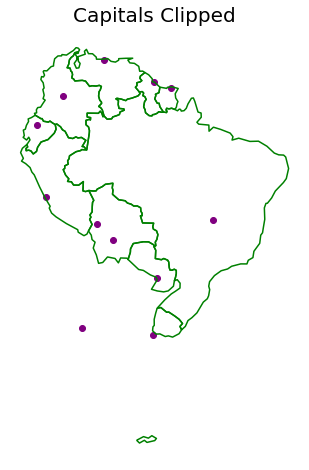

In [5]:
capitals_clipped = geopandas.clip(capitals, south_america)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the capital cities
fig, ax = plt.subplots(figsize=(12, 8))
capitals_clipped.plot(ax=ax, color="purple")
south_america.boundary.plot(ax=ax, color="green")
ax.set_title("Capitals Clipped", fontsize=20)
ax.set_axis_off()
plt.show()